Analisis oleh Dinmar Pratama

- Github : https://github.com/dinmar9212
- LinkedIn : https://www.linkedin.com/in/dinmar-pratama-2516b8224/
- Medium : https://medium.com/@dinmarpratama

# Dampak Durasi Sewa dan Strategi Penetapan Harga Dinamis terhadap Peningkatan Pendapatan Airbnb di Bangkok

# Latar Belakang

Airbnb sebagai platform penyewaan penginapan mengalami pertumbuhan pesat di berbagai kota besar, termasuk Bangkok. Dalam upaya meningkatkan revenue, pemilik properti (host) memanfaatkan berbagai strategi, termasuk penyesuaian harga (dynamic pricing) dan penawaran durasi sewa yang fleksibel. Dynamic pricing memungkinkan host mengatur harga berdasarkan permintaan pasar, musim, dan faktor eksternal lainnya. Sementara itu, durasi sewa yang ditawarkan (jangka pendek vs. jangka panjang) juga menjadi faktor penentu utama dalam memaksimalkan pendapatan.

Memahami bagaimana kombinasi durasi sewa dan strategi dynamic pricing memengaruhi revenue menjadi penting bagi host untuk mengoptimalkan listing mereka. Dengan menganalisis data listing Airbnb di Bangkok, penelitian ini bertujuan untuk mengidentifikasi faktor utama yang berkontribusi terhadap peningkatan revenue dan memberikan rekomendasi strategis bagi host dan pihak Airbnb.

# Referensi

Data dihimpun dari listing Airbnb Bangkok, kalian dapat mengaksesnya dari link ini: https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF

# Pernyataan Masalah dan Tujuan Analisis

Bagaimana durasi sewa dan strategi dynamic pricing memengaruhi peningkatan revenue di Airbnb Bangkok? Analisis ini bertujuan untuk memahami karakteristik listing yang menghasilkan revenue tertinggi dan memberikan rekomendasi berbasis data untuk meningkatkan pendapatan melalui optimasi durasi sewa dan harga dinamis.

# Data Understanding

## Library Yang Digunakan

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import spearmanr
from datetime import datetime
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors

## Load Dataset

In [4]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

Unnamed: 0                  id  \
0               0               27934   
1               1               27979   
2               2               28745   
3               3               35780   
4               4              941865   
...           ...                 ...   
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                    name    host_id  \
0                        Nice room with superb city view     120437   
1                         Easy going landlord,easy place     120541   
2                      modern-style apartment in Bangkok     123784   
3         Spacious one bedroom at The Kris Condo Bldg. 3     153730   
4                             Suite Room 3 at MetroPoint     610315   
...                                                  ...        ...   
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

        host_name neighbourhood   latitude   longitude        room_type  \
0          Nuttee   Ratchathewi  13.759830  100.541340  Entire home/apt   
1             Emy       Bang Na  13.668180  100.616740     Private room   
2      Familyroom     Bang Kapi  13.752320  100.624020     Private room   
3         Sirilak     Din Daeng  13.788230  100.572560     Private room   
4           Kasem     Bang Kapi  13.768720  100.633380     Private room   
...           ...           ...        ...         ...              ...   
15849       Renee       Pra Wet  13.715132  100.653458     Private room   
15850   Phakhamon   Ratchathewi  13.753052  100.538738     Private room   
15851   Phakhamon   Ratchathewi  13.753169  100.538700     Private room   
15852   Phakhamon   Ratchathewi  13.754789  100.538757     Private room   
15853   Phakhamon   Ratchathewi  13.752960  100.540820     Private room   

       price  minimum_nights  number_of_reviews last_review  \
0       1905               3                 65  2020-01-06   
1       1316               1                  0         NaN   
2        800              60                  0         NaN   
3       1286               7                  2  2022-04-01   
4       1905               1                  0         NaN   
...      ...             ...                ...         ...   
15849   2298              28                  0         NaN   
15850   1429               1                  0         NaN   
15851   1214               1                  0         NaN   
15852   1214               1                  0         NaN   
15853   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1   

## Tipe Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

## Missing Values

In [7]:
missing = df.isna().sum().rename('jumlah')
missing = pd.DataFrame(missing)
missing['presentase'] = (df.isna().sum() / len(df) * 100).rename('presentase')
missing

jumlah  presentase
Unnamed: 0                           0    0.000000
id                                   0    0.000000
name                                 8    0.050460
host_id                              0    0.000000
host_name                            1    0.006308
neighbourhood                        0    0.000000
latitude                             0    0.000000
longitude                            0    0.000000
room_type                            0    0.000000
price                                0    0.000000
minimum_nights                       0    0.000000
number_of_reviews                    0    0.000000
last_review                       5790   36.520752
reviews_per_month                 5790   36.520752
calculated_host_listings_count       0    0.000000
availability_365                     0    0.000000
number_of_reviews_ltm                0    0.000000

<Axes: >

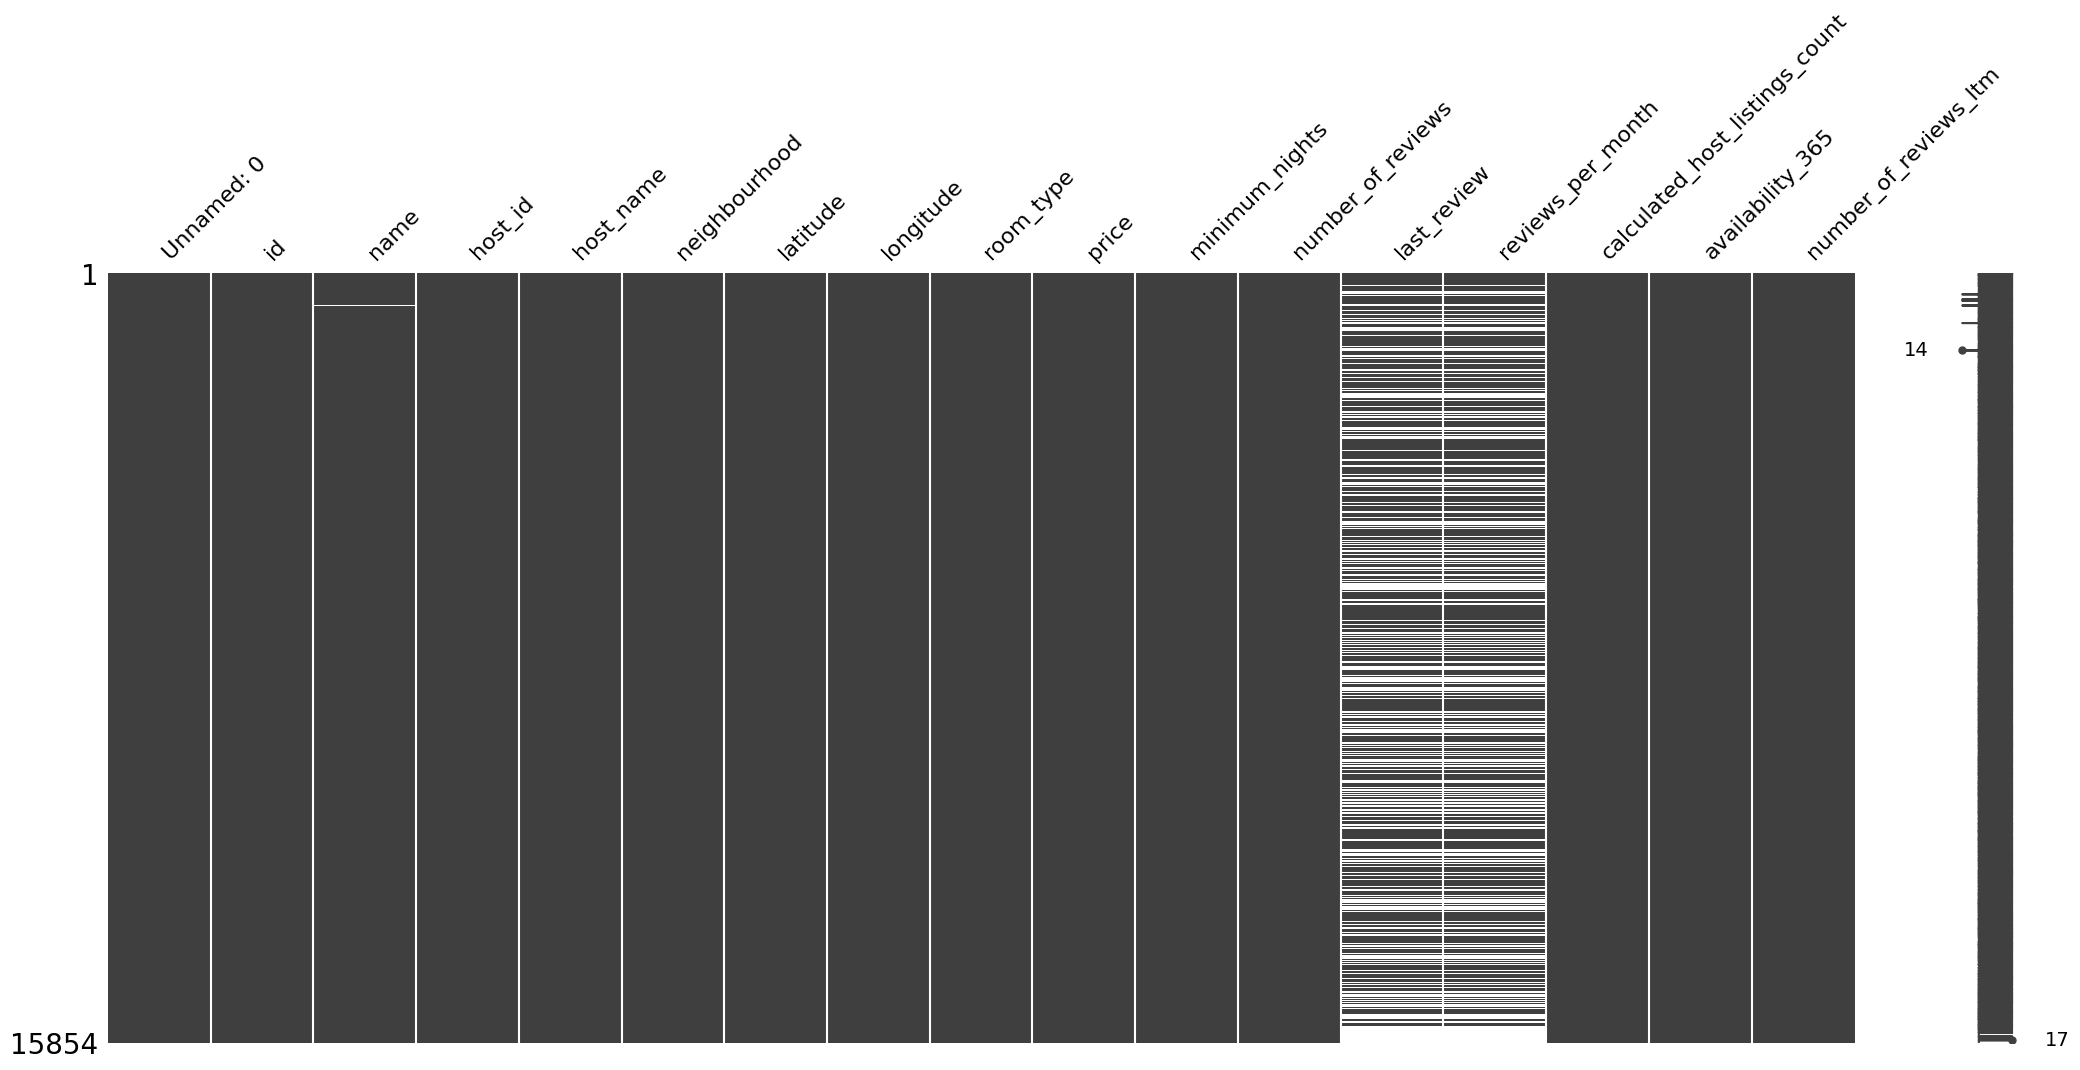

In [8]:
msno.matrix(df)

In [9]:
df[df.isna().any(axis=1)]

Unnamed: 0                  id  \
1               1               27979   
2               2               28745   
4               4              941865   
7               7             1738669   
14             14              959254   
...           ...                 ...   
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                    name    host_id  \
1                         Easy going landlord,easy place     120541   
2                      modern-style apartment in Bangkok     123784   
4                             Suite Room 3 at MetroPoint     610315   
7                        1 chic bedroom apartment in BKK    7045870   
14                    Deluxe Condo, Nana, Pool/GYM/Sauna    5153476   
...                                                  ...        ...   
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

        host_name neighbourhood   latitude   longitude        room_type  \
1             Emy       Bang Na  13.668180  100.616740     Private room   
2      Familyroom     Bang Kapi  13.752320  100.624020     Private room   
4           Kasem     Bang Kapi  13.768720  100.633380     Private room   
7        Jiraporn    Chatu Chak  13.829250  100.567370  Entire home/apt   
14         Natcha   Khlong Toei  13.715160  100.568060  Entire home/apt   
...           ...           ...        ...         ...              ...   
15849       Renee       Pra Wet  13.715132  100.653458     Private room   
15850   Phakhamon   Ratchathewi  13.753052  100.538738     Private room   
15851   Phakhamon   Ratchathewi  13.753169  100.538700     Private room   
15852   Phakhamon   Ratchathewi  13.754789  100.538757     Private room   
15853   Phakhamon   Ratchathewi  13.752960  100.540820     Private room   

       price  minimum_nights  number_of_reviews last_review  \
1       1316               1                  0         NaN   
2        800              60                  0         NaN   
4       1905               1                  0         NaN   
7       1461               1                  0         NaN   
14      1400              30                  0         NaN   
...      ...             ...                ...         ...   
15849   2298              28                  0         NaN   
15850   1429               1                  0         NaN   
15851   1214               1                  0         NaN   
15852   1214               1                  0         NaN   
15853   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2   

## Data Duplikat

In [10]:
df.duplicated().sum()

np.int64(0)

## Variabel Numerik

In [11]:
numerik = df.select_dtypes(include='number')
numerik

Unnamed: 0                  id    host_id   latitude   longitude  \
0               0               27934     120437  13.759830  100.541340   
1               1               27979     120541  13.668180  100.616740   
2               2               28745     123784  13.752320  100.624020   
3               3               35780     153730  13.788230  100.572560   
4               4              941865     610315  13.768720  100.633380   
...           ...                 ...        ...        ...         ...   
15849       15849  790465040741092826   94899359  13.715132  100.653458   
15850       15850  790474503157243541  491526222  13.753052  100.538738   
15851       15851  790475335086864240  491526222  13.753169  100.538700   
15852       15852  790475546213717328  491526222  13.754789  100.538757   
15853       15853  790476492384199044  491526222  13.752960  100.540820   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
0       1905               3                 65               0.50   
1       1316               1                  0                NaN   
2        800              60                  0                NaN   
3       1286               7                  2               0.03   
4       1905               1                  0                NaN   
...      ...             ...                ...                ...   
15849   2298              28                  0                NaN   
15850   1429               1                  0                NaN   
15851   1214               1                  0                NaN   
15852   1214               1                  0                NaN   
15853   1214               1                  0                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                                   2               353                      0  
1                                   2               358                      0  
2                                   1               365                      0  
3                                   1               323                      1  
4                                   3               365                      0  
...                               ...               ...                    ...  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0  

[15854 rows x 12 columns]

### Statistik Deskriptif

In [12]:
numerik.describe()

Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

### Distribusi Data

#### Grafik Histogram

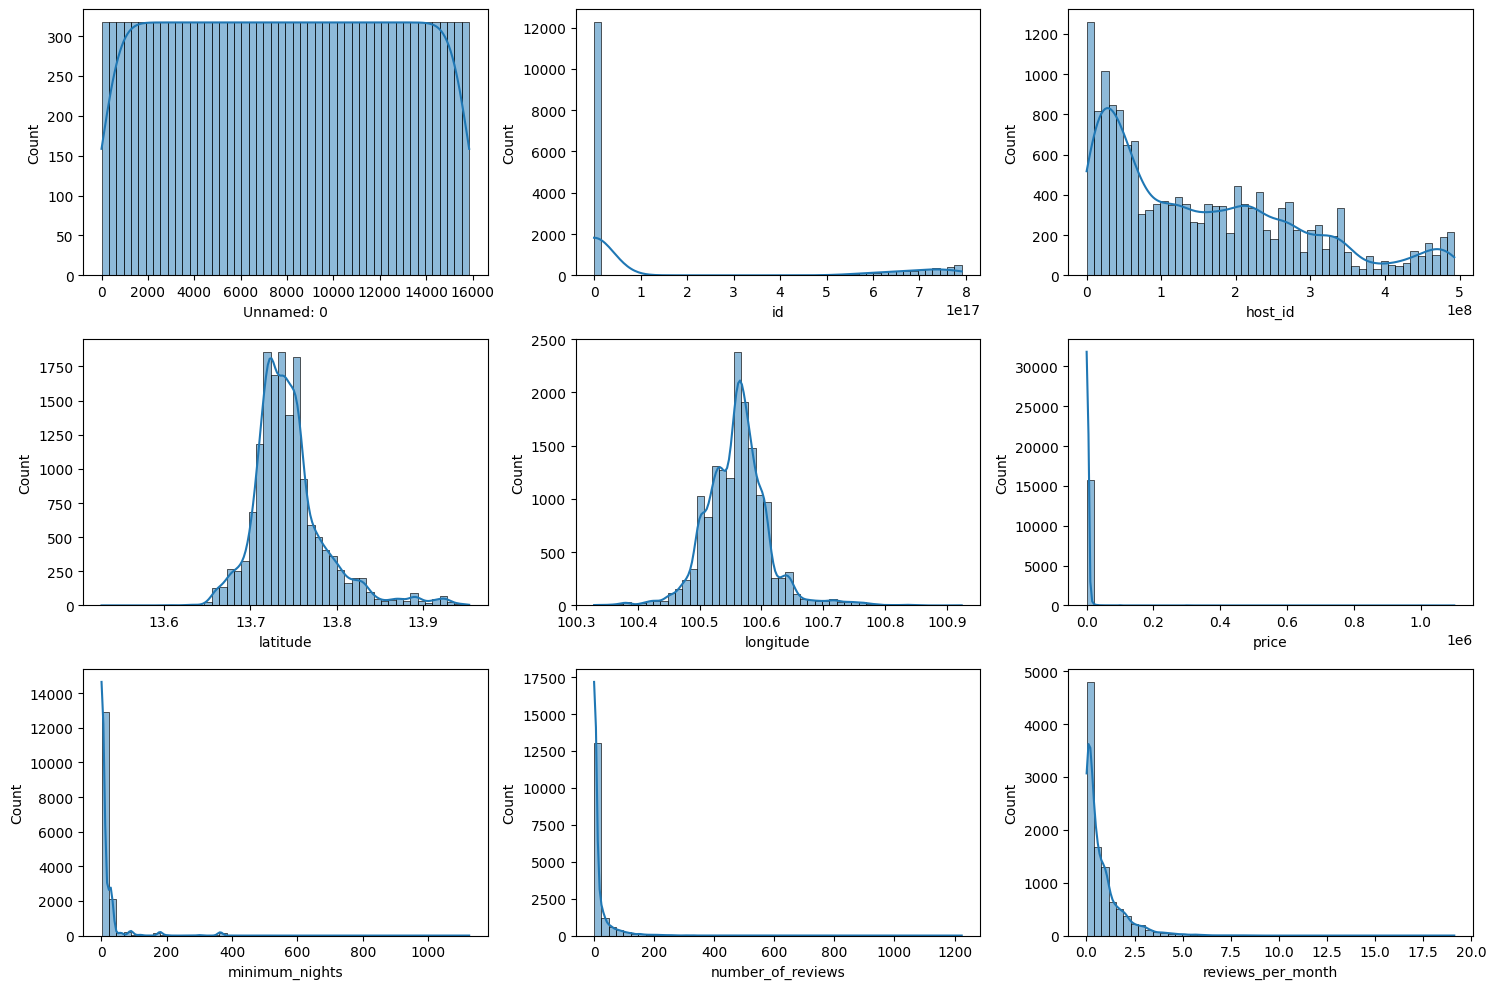

In [13]:
plt.figure(figsize=(15, 10))
for posisi, nama_kolom in zip(range(1, 10), numerik.columns):
    plt.subplot(3, 3, posisi)
    sns.histplot(df[nama_kolom], bins=50, kde=True)  # Kurangi bin, matikan kde

plt.tight_layout()
plt.show()

#### Uji Statistika Distribusi Normal

In [14]:
# karena tidak boleh ada missing valuesnya, jadi sementara pakai ini dulu
df_copy = df.copy()
df_copy.dropna(inplace=True)

##### Kolmogorov-Smirnov

In [15]:
for nama_kolom in numerik.columns:
    stat, pval = kstest(df_copy[nama_kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {nama_kolom} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom}Distribusi normal (Terima H0)')

Kolom Unnamed: 0 Distribusi tidak normal (Tolak H0)
Kolom id Distribusi tidak normal (Tolak H0)
Kolom host_id Distribusi tidak normal (Tolak H0)
Kolom latitude Distribusi tidak normal (Tolak H0)
Kolom longitude Distribusi tidak normal (Tolak H0)
Kolom price Distribusi tidak normal (Tolak H0)
Kolom minimum_nights Distribusi tidak normal (Tolak H0)
Kolom number_of_reviews Distribusi tidak normal (Tolak H0)
Kolom reviews_per_month Distribusi tidak normal (Tolak H0)
Kolom calculated_host_listings_count Distribusi tidak normal (Tolak H0)
Kolom availability_365 Distribusi tidak normal (Tolak H0)
Kolom number_of_reviews_ltm Distribusi tidak normal (Tolak H0)


##### Liliefors

In [16]:
for kolom in numerik.columns:
    stat, pval = lilliefors(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi Unnamed: 0 tidak normal (Tolak H0)
Distribusi id tidak normal (Tolak H0)
Distribusi host_id tidak normal (Tolak H0)
Distribusi latitude tidak normal (Tolak H0)
Distribusi longitude tidak normal (Tolak H0)
Distribusi price tidak normal (Tolak H0)
Distribusi minimum_nights tidak normal (Tolak H0)
Distribusi number_of_reviews tidak normal (Tolak H0)
Distribusi reviews_per_month tidak normal (Tolak H0)
Distribusi calculated_host_listings_count tidak normal (Tolak H0)
Distribusi availability_365 tidak normal (Tolak H0)
Distribusi number_of_reviews_ltm tidak normal (Tolak H0)


### Outliers

#### Boxplot

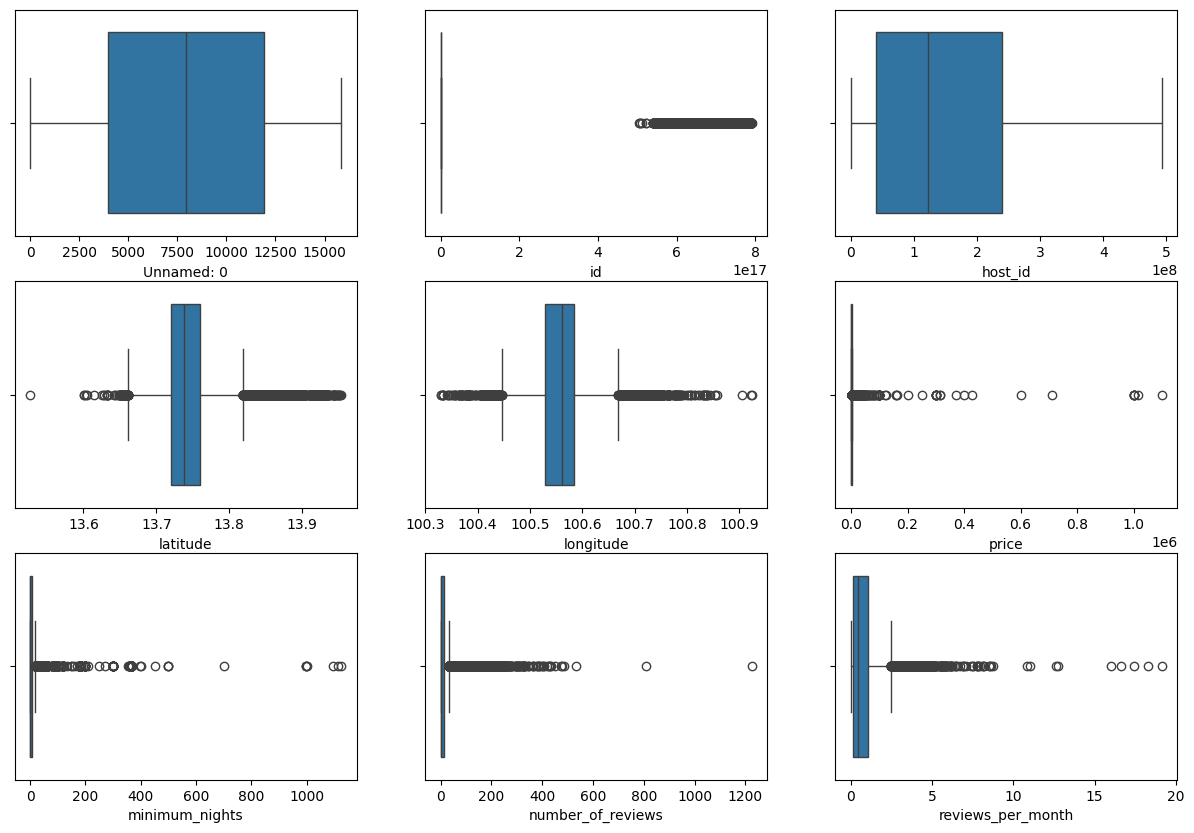

In [17]:
# atur size dari figure
plt.figure(figsize = (15,10)) # kolom, baris

for posisi, nama_kolom in zip(range(1,10), numerik.columns): # posisi 1 sampai 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x = df[nama_kolom])

plt.show()

#### IQR * 1.5

In [18]:
for nama_kolom in numerik.columns:
    q3 = df[nama_kolom].quantile(0.75)
    q1 = df[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > batas_atas) | (df[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers Unnamed: 0: 0
Jumlah Outliers id: 3571
Jumlah Outliers host_id: 0
Jumlah Outliers latitude: 1095
Jumlah Outliers longitude: 602
Jumlah Outliers price: 1403
Jumlah Outliers minimum_nights: 3168
Jumlah Outliers number_of_reviews: 2240
Jumlah Outliers reviews_per_month: 693
Jumlah Outliers calculated_host_listings_count: 1832
Jumlah Outliers availability_365: 0
Jumlah Outliers number_of_reviews_ltm: 2219


In [19]:
df[df['minimum_nights'] > 365]

Unnamed: 0        id  \
61             61   1041976   
324           324   2489610   
1134         1134   7625178   
1200         1200   8801560   
1592         1592  10709131   
1833         1833  12046101   
3694         3694  19893829   
4194         4194  22059876   
7986         7986  35165443   
8608         8608  37270784   
10153       10153  41623113   
10644       10644  42685153   
11243       11243  45051929   
11416       11416  48046291   
11524       11524  49032568   

                                                    name    host_id  \
61     Long-stay special rate spacious entire floor Siam    5735895   
324    NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium   12743033   
1134                                        วิวล่า สิขลา   39999413   
1200                  30th floor, 10 min to BTS, Seaview    4517723   
1592                 34Fl 2, M Ladprao Condo,MRT & Malls   32398198   
1833                    Near BTS Onnut Convenience house   22676472   
3694                  2 Bedroom Suite@Kirthana Residence   64131143   
4194                                                   C  160989331   
7986         Wonderful apartment for you holiday in Thai   86991723   
8608                    นพกรณ์ แมนชั่น Noppakorn Mansion  271222372   
10153  blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasa...  162537040   
10644               The Prime Sukhumvit 11 - Room 29/150  337709866   
11243   Bellevue Boutique Bangkok | Airport Link HUA-MAK  165329146   
11416                                โฮมสเตย์บ้านมิตรภาพ  387329237   
11524         Freehold  Condo near Bangsue Grand Station    4661237   

       host_name neighbourhood  latitude  longitude        room_type   price  \
61        Pariya   Parthum Wan  13.74814  100.52016  Entire home/apt    2900   
324       Thanan   Khlong Toei  13.72699  100.56988  Entire home/apt    2043   
1134      อัครพล       Vadhana  13.74159  100.57977     Private room   65000   
1200    Kannicha       Bang Na  13.66417  100.64955  Entire home/apt   35000   
1592   Touchapon    Chatu Chak  13.81699  100.56292  Entire home/apt     760   
1833        Kuan     Suanluang  13.71161  100.60344  Entire home/apt    1300   
3694      Chetna       Vadhana  13.73917  100.56616  Entire home/apt    7286   
4194   Annchalee     Thon buri  13.71693  100.48330     Private room  161516   
7986        Yang       Bang Na  13.67260  100.60352  Entire home/apt    2000   
8608   Noppakorn     Lat Phrao  13.81852  100.59248  Entire home/apt     450   
10153    Songnya        Sathon  13.71195  100.52055  Entire home/apt     650   
10644     Vatiaz       Vadhana  13.74426  100.55758     Private room   15143   
11243   Sataporn     Suanluang  13.73633  100.63836     Private room    1314   
11416      ไตรทศ         Dusit  13.78270  100.51733     Private room     400   
11524   Chayanid      Bang Sue  13.80697  100.52362  Entire home/apt     554   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
61               1125                295  2021-08-21               2.61   
324               370                 23  2017-10-21               0.23   
1134              399                  0         NaN                NaN   
1200              998                 20  2022-10-30               0.26   
1592              700                 61  2019-08-25               0.73   
1833              500                  2  2016-07-30               0.02   
3694              500                  0         NaN                NaN   
4194              500                  3  2018-07-31               0.05   
7986             1115                  0         NaN                NaN   
8608              450                  0         NaN                NaN   
10153            1000                  2  2020-03-08               0.06   
10644             999                  0         NaN                NaN   
11243             999                  0         NaN                NaN   
11416             400                  0  

### Korelasi

In [20]:
numerik.corr()

Unnamed: 0        id   host_id  latitude  \
Unnamed: 0                        1.000000  0.730475  0.542168 -0.006432   
id                                0.730475  1.000000  0.342115 -0.019112   
host_id                           0.542168  0.342115  1.000000  0.052303   
latitude                         -0.006432 -0.019112  0.052303  1.000000   
longitude                         0.005771 -0.005326  0.002082  0.066314   
price                            -0.003401  0.000249 -0.008940 -0.008007   
minimum_nights                   -0.056473 -0.051638 -0.052760 -0.032981   
number_of_reviews                -0.297773 -0.179251 -0.218287 -0.020985   
reviews_per_month                 0.289055  0.397639  0.075731 -0.035798   
calculated_host_listings_count    0.151529  0.081070  0.020603 -0.044074   
availability_365                  0.014941  0.123134  0.033200  0.008887   
number_of_reviews_ltm             0.040168 -0.024465 -0.051474 -0.043814   

                                longitude     price  minimum_nights  \
Unnamed: 0                       0.005771 -0.003401       -0.056473   
id                              -0.005326  0.000249       -0.051638   
host_id                          0.002082 -0.008940       -0.052760   
latitude                         0.066314 -0.008007       -0.032981   
longitude                        1.000000 -0.004595        0.018291   
price                           -0.004595  1.000000        0.020155   
minimum_nights                   0.018291  0.020155        1.000000   
number_of_reviews               -0.028402 -0.004368       -0.034211   
reviews_per_month               -0.010723 -0.011497       -0.089948   
calculated_host_listings_count  -0.043822 -0.013299       -0.053596   
availability_365                -0.017956  0.000789        0.053174   
number_of_reviews_ltm           -0.021086 -0.014163       -0.079015   

                                number_of_reviews  reviews_per_month  \
Unnamed: 0                              -0.297773           0.289055   
id                                      -0.179251           0.397639   
host_id                                 -0.218287           0.075731   
latitude                                -0.020985          -0.035798   
longitude                               -0.028402          -0.010723   
price                                   -0.004368          -0.011497   
minimum_nights                          -0.034211          -0.089948   
number_of_reviews                        1.000000           0.512523   
reviews_per_month                        0.512523           1.000000   
calculated_host_listings_count           0.036338           0.069057   
availability_365                        -0.077229          -0.019477   
number_of_reviews_ltm                    0.499417           0.598638   

                                calculated_host_listings_count  \
Unnamed: 0                                            0.151529   
id                                                    0.081070   
host_id                                               0.020603   
latitude                                             -0.044074   
longitude                                            -0.043822   
price                                                -0.013299   
minimum_nights                                       -0.053596   
number_of_reviews                                     0.036338   
reviews_per_month                                     0.069057   
calculated_host_listings_count                        1.000000   
availability_365                                      0.008542   
number_of_reviews_ltm                                 0.111925   

                                availability_365  number_of_reviews_ltm  
Unnamed: 0                              0.014941               0.040168  
id                                      0.123134              -0.024465  
host_id                                 0.033200              -0.051474  
latitude                   

<Axes: >

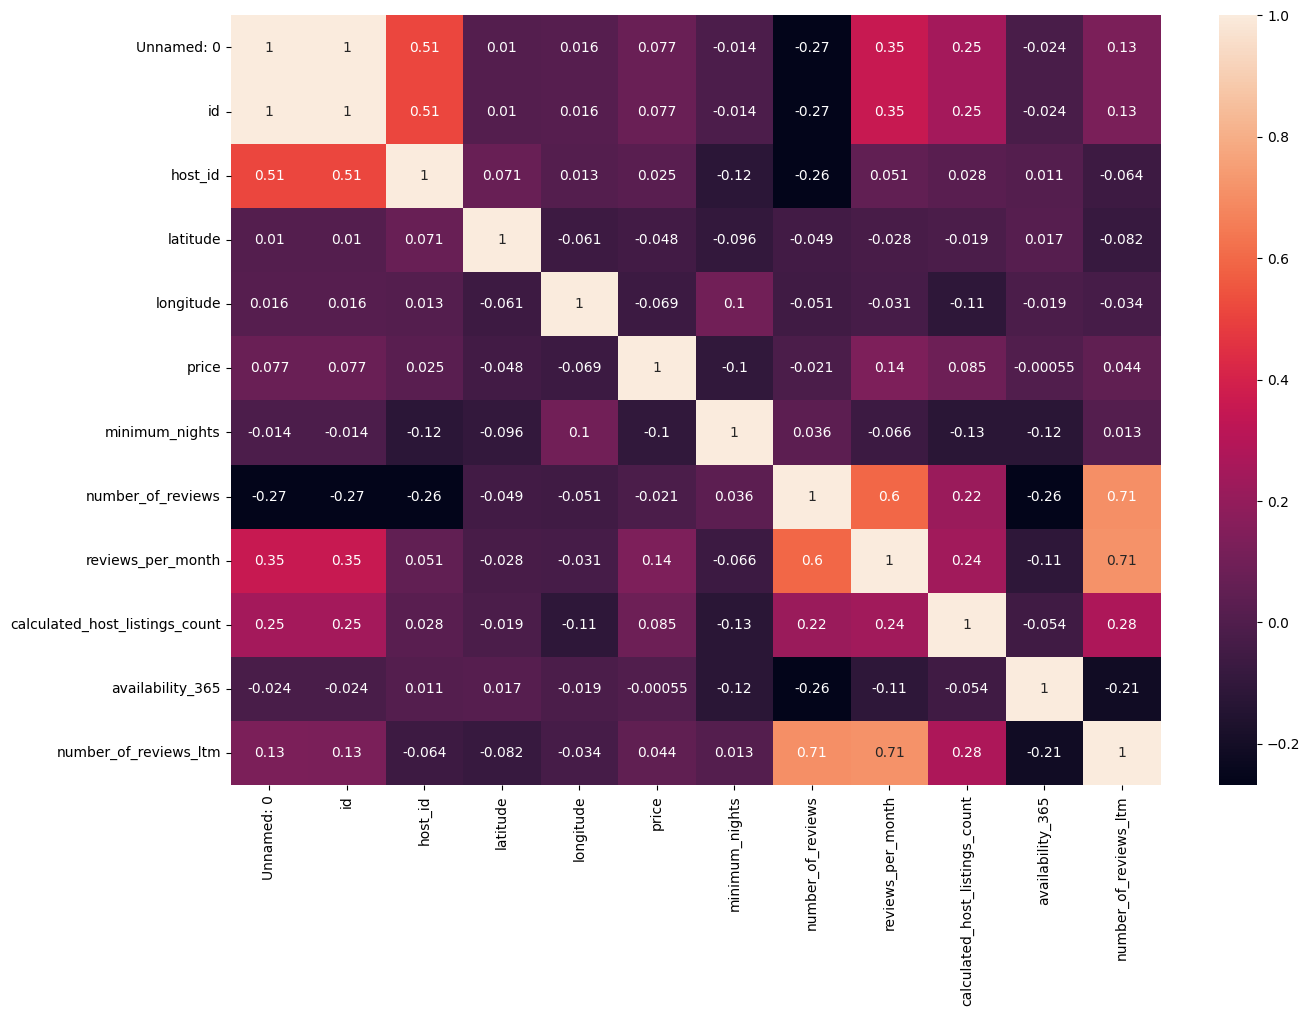

In [21]:
figure = plt.figure(figsize = (15,10))

# data dengan distribusi tidak normal
sns.heatmap(numerik.corr(method='spearman'), annot=True)

## Variabel Kategorik

In [22]:
# ambil yang kategorik saja
kategorik = df.select_dtypes(exclude = 'number') # sama saja
kategorik = df.select_dtypes(include = 'object') # sama saja
kategorik

name   host_name  \
0                        Nice room with superb city view      Nuttee   
1                         Easy going landlord,easy place         Emy   
2                      modern-style apartment in Bangkok  Familyroom   
3         Spacious one bedroom at The Kris Condo Bldg. 3     Sirilak   
4                             Suite Room 3 at MetroPoint       Kasem   
...                                                  ...         ...   
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街       Renee   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   Phakhamon   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   Phakhamon   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   Phakhamon   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   Phakhamon   

      neighbourhood        room_type last_review  
0       Ratchathewi  Entire home/apt  2020-01-06  
1           Bang Na     Private room         NaN  
2         Bang Kapi     Private room         NaN  
3         Din Daeng     Private room  2022-04-01  
4         Bang Kapi     Private room         NaN  
...             ...              ...         ...  
15849       Pra Wet     Private room         NaN  
15850   Ratchathewi     Private room         NaN  
15851   Ratchathewi     Private room         NaN  
15852   Ratchathewi     Private room         NaN  
15853   Ratchathewi     Private room         NaN  

[15854 rows x 5 columns]

### Statistik Deskriptif

In [23]:
kategorik.describe()

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

### Unique Values

In [24]:
kategorik.nunique()

name             14794
host_name         5312
neighbourhood       50
room_type            4
last_review       1669
dtype: int64

<Axes: >

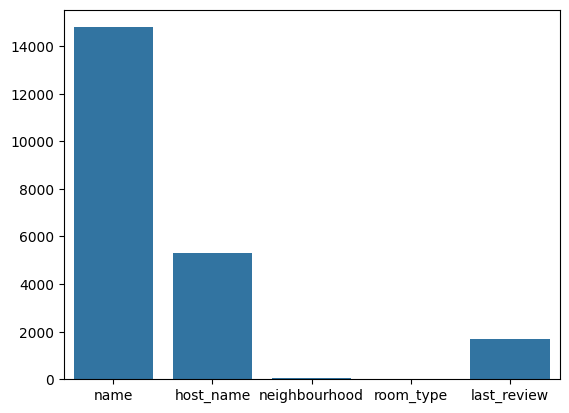

In [25]:
# bar plot
sns.barplot(kategorik.nunique())

### Value Counts

In [26]:
# menghitung berapa count untuk setiap value
df['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


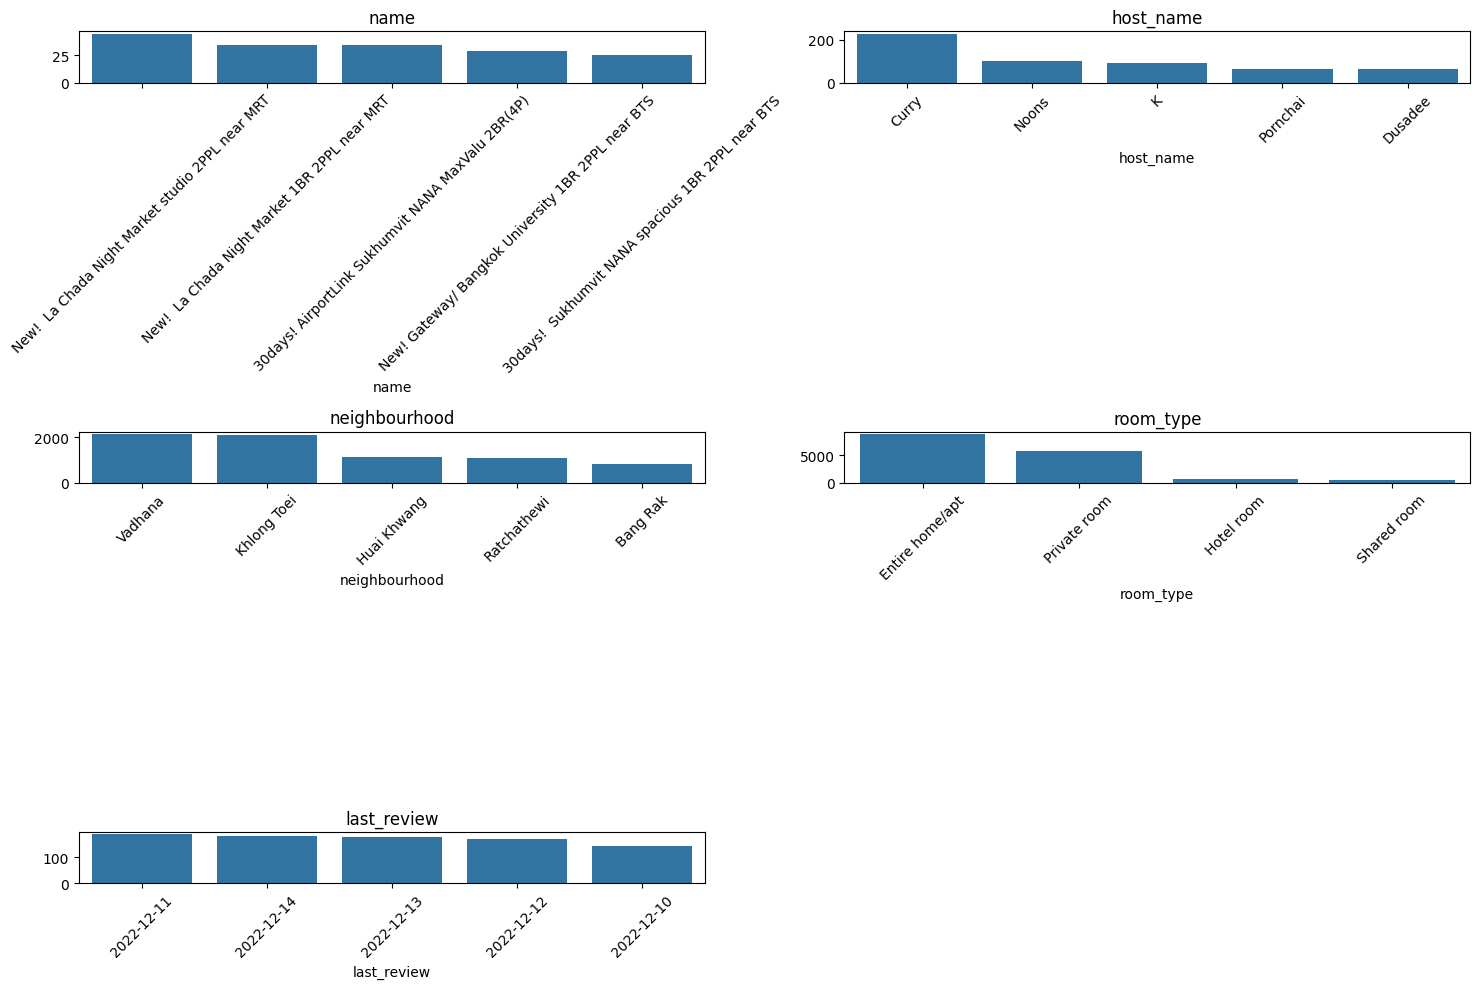

In [27]:
# Ambil semua kolom kategorik
kategorik = df.select_dtypes(include='object')

plt.figure(figsize=(15, 10))  # (lebar, tinggi)
posisi = 1
baris = (len(kategorik.columns) // 2) + 1  # Hitung jumlah baris yang cukup

for kolom in kategorik.columns:
    plt.subplot(baris, 2, posisi)  # (jumlah baris, jumlah kolom, posisi)
    sns.barplot(x=kategorik[kolom].value_counts().sort_values(ascending=False).head(5).index,  
                y=kategorik[kolom].value_counts().sort_values(ascending=False).head(5).values)
    plt.xticks(rotation=45)  # Putar label biar lebih rapi
    plt.title(kolom)  # Tambahkan judul per kategori
    posisi += 1

plt.tight_layout()
plt.show()

# Data Cleaning

## Handle Missing Values

In [28]:
missing = df.isna().sum().rename('jumlah')
missing = pd.DataFrame(missing)
missing['presentase'] = (df.isna().sum() / len(df) * 100).rename('presentase')
missing

jumlah  presentase
Unnamed: 0                           0    0.000000
id                                   0    0.000000
name                                 8    0.050460
host_id                              0    0.000000
host_name                            1    0.006308
neighbourhood                        0    0.000000
latitude                             0    0.000000
longitude                            0    0.000000
room_type                            0    0.000000
price                                0    0.000000
minimum_nights                       0    0.000000
number_of_reviews                    0    0.000000
last_review                       5790   36.520752
reviews_per_month                 5790   36.520752
calculated_host_listings_count       0    0.000000
availability_365                     0    0.000000
number_of_reviews_ltm                0    0.000000

In [29]:
# Hapus kolom yang tidak digunakan (drop kolom di luar kolom analisis)
kolom_analisis = [
    "id", "host_id", "neighbourhood", "room_type", "price", "minimum_nights",
    "availability_365", "last_review", "reviews_per_month", "number_of_reviews",
    "number_of_reviews_ltm", "calculated_host_listings_count", "latitude", "longitude"
]

# Drop kolom yang tidak termasuk dalam kolom analisis + "Unnamed: 0" jika ada
df.drop(columns=[col for col in df.columns if col not in kolom_analisis], inplace=True, errors='ignore')
df

id    host_id neighbourhood   latitude   longitude  \
0                   27934     120437   Ratchathewi  13.759830  100.541340   
1                   27979     120541       Bang Na  13.668180  100.616740   
2                   28745     123784     Bang Kapi  13.752320  100.624020   
3                   35780     153730     Din Daeng  13.788230  100.572560   
4                  941865     610315     Bang Kapi  13.768720  100.633380   
...                   ...        ...           ...        ...         ...   
15849  790465040741092826   94899359       Pra Wet  13.715132  100.653458   
15850  790474503157243541  491526222   Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222   Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222   Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaN   
2         Private room    800              60                  0         NaN   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaN   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaN   
15850     Private room   1429               1                  0         NaN   
15851     Private room   1214               1                  0         NaN   
15852     Private room   1214               1                  0         NaN   
15853     Private room   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                      0  
15853                      0  

[15854 rows x 14 columns]

In [30]:
# Hapus baris dengan latitude atau longitude kosong
df.dropna(subset=['latitude', 'longitude'], inplace=True)
df

id    host_id neighbourhood   latitude   longitude  \
0                   27934     120437   Ratchathewi  13.759830  100.541340   
1                   27979     120541       Bang Na  13.668180  100.616740   
2                   28745     123784     Bang Kapi  13.752320  100.624020   
3                   35780     153730     Din Daeng  13.788230  100.572560   
4                  941865     610315     Bang Kapi  13.768720  100.633380   
...                   ...        ...           ...        ...         ...   
15849  790465040741092826   94899359       Pra Wet  13.715132  100.653458   
15850  790474503157243541  491526222   Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222   Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222   Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaN   
2         Private room    800              60                  0         NaN   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaN   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaN   
15850     Private room   1429               1                  0         NaN   
15851     Private room   1214               1                  0         NaN   
15852     Private room   1214               1                  0         NaN   
15853     Private room   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                      0  
15853                      0  

[15854 rows x 14 columns]

In [31]:
# Ubah kolom 'last_review' ke format datetime (non-valid diubah jadi NaT)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df

id    host_id neighbourhood   latitude   longitude  \
0                   27934     120437   Ratchathewi  13.759830  100.541340   
1                   27979     120541       Bang Na  13.668180  100.616740   
2                   28745     123784     Bang Kapi  13.752320  100.624020   
3                   35780     153730     Din Daeng  13.788230  100.572560   
4                  941865     610315     Bang Kapi  13.768720  100.633380   
...                   ...        ...           ...        ...         ...   
15849  790465040741092826   94899359       Pra Wet  13.715132  100.653458   
15850  790474503157243541  491526222   Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222   Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222   Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                      0  
15853                      0  

[15854 rows x 14 columns]

In [32]:
# Membuat kolom biner: 1 untuk yang memberikan review, 0 untuk yang tidak (NaT)
df['has_review'] = df['last_review'].notna().astype(int)

# Tampilkan hasil
df[['last_review', 'has_review']]

last_review  has_review
0      2020-01-06           1
1             NaT           0
2             NaT           0
3      2022-04-01           1
4             NaT           0
...           ...         ...
15849         NaT           0
15850         NaT           0
15851         NaT           0
15852         NaT           0
15853         NaT           0

[15854 rows x 2 columns]

In [33]:
df[['last_review', 'has_review']].info(), df['has_review'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   last_review  10064 non-null  datetime64[ns]
 1   has_review   15854 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 247.8 KB


(None,
 count    15854.000000
 mean         0.634792
 std          0.481503
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: has_review, dtype: float64)

In [34]:
# Mengisi kolom 'reviews_per_month' yang kosong dengan 0
df['reviews_per_month'].fillna(0, inplace=True)
df

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\2913752064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


id    host_id neighbourhood   latitude   longitude  \
0                   27934     120437   Ratchathewi  13.759830  100.541340   
1                   27979     120541       Bang Na  13.668180  100.616740   
2                   28745     123784     Bang Kapi  13.752320  100.624020   
3                   35780     153730     Din Daeng  13.788230  100.572560   
4                  941865     610315     Bang Kapi  13.768720  100.633380   
...                   ...        ...           ...        ...         ...   
15849  790465040741092826   94899359       Pra Wet  13.715132  100.653458   
15850  790474503157243541  491526222   Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222   Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222   Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                   0.00                               2               358   
2                   0.00                               1               365   
3                   0.03                               1               323   
4                   0.00                               3               365   
...                  ...                             ...               ...   
15849               0.00                               1               362   
15850               0.00                              14               365   
15851               0.00                              14               365   
15852               0.00                              14               365   
15853               0.00                              14               365   

       number_of_reviews_ltm  has_review  
0                          0           1  
1                          0           0  
2                          0           0  
3                          1           1  
4                          0           0  
...                      ...         ...  
15849                      0           0  
15850                      0           0  
15851                      0           0  
15852                      0           0  
15853                      0           0  

[15854 rows x 15 columns]

In [35]:
# Cek kembali jumlah missing values di seluruh kolom
missing_values = df.isna().sum()
missing_values

id                                   0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
has_review                           0
dtype: int64

last_review masih memiliki 5.790 missing values → tidak masalah karena kita sudah menangani dengan membuat kolom has_review

## Variabel Numerik

In [36]:
numerik = df.select_dtypes(include='number')
numerik

id    host_id   latitude   longitude  price  \
0                   27934     120437  13.759830  100.541340   1905   
1                   27979     120541  13.668180  100.616740   1316   
2                   28745     123784  13.752320  100.624020    800   
3                   35780     153730  13.788230  100.572560   1286   
4                  941865     610315  13.768720  100.633380   1905   
...                   ...        ...        ...         ...    ...   
15849  790465040741092826   94899359  13.715132  100.653458   2298   
15850  790474503157243541  491526222  13.753052  100.538738   1429   
15851  790475335086864240  491526222  13.753169  100.538700   1214   
15852  790475546213717328  491526222  13.754789  100.538757   1214   
15853  790476492384199044  491526222  13.752960  100.540820   1214   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                   3                 65               0.50   
1                   1                  0               0.00   
2                  60                  0               0.00   
3                   7                  2               0.03   
4                   1                  0               0.00   
...               ...                ...                ...   
15849              28                  0               0.00   
15850               1                  0               0.00   
15851               1                  0               0.00   
15852               1                  0               0.00   
15853               1                  0               0.00   

       calculated_host_listings_count  availability_365  \
0                                   2               353   
1                                   2               358   
2                                   1               365   
3                                   1               323   
4                                   3               365   
...                               ...               ...   
15849                               1               362   
15850                              14               365   
15851                              14               365   
15852                              14               365   
15853                              14               365   

       number_of_reviews_ltm  has_review  
0                          0           1  
1                          0           0  
2                          0           0  
3                          1           1  
4                          0           0  
...                      ...         ...  
15849                      0           0  
15850                      0           0  
15851                      0           0  
15852                      0           0  
15853                      0           0  

[15854 rows x 12 columns]

### Statistik Deskriptif

In [37]:
numerik.describe(), kategorik.describe()

(                 id       host_id      latitude     longitude         price  \
 count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
 mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
 std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   
 min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
 25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
 50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
 75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
 max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   
 
        minimum_nights  number_of_reviews  reviews_per_month  \
 count    15854.000000       15854.000000       15854.000000   
 mean        15.292355          16.654157           0.516178   
 std         50.815020          40.613331           0.952753   
 min          1.000000

### Distribusi Data

#### Grafik Histogram

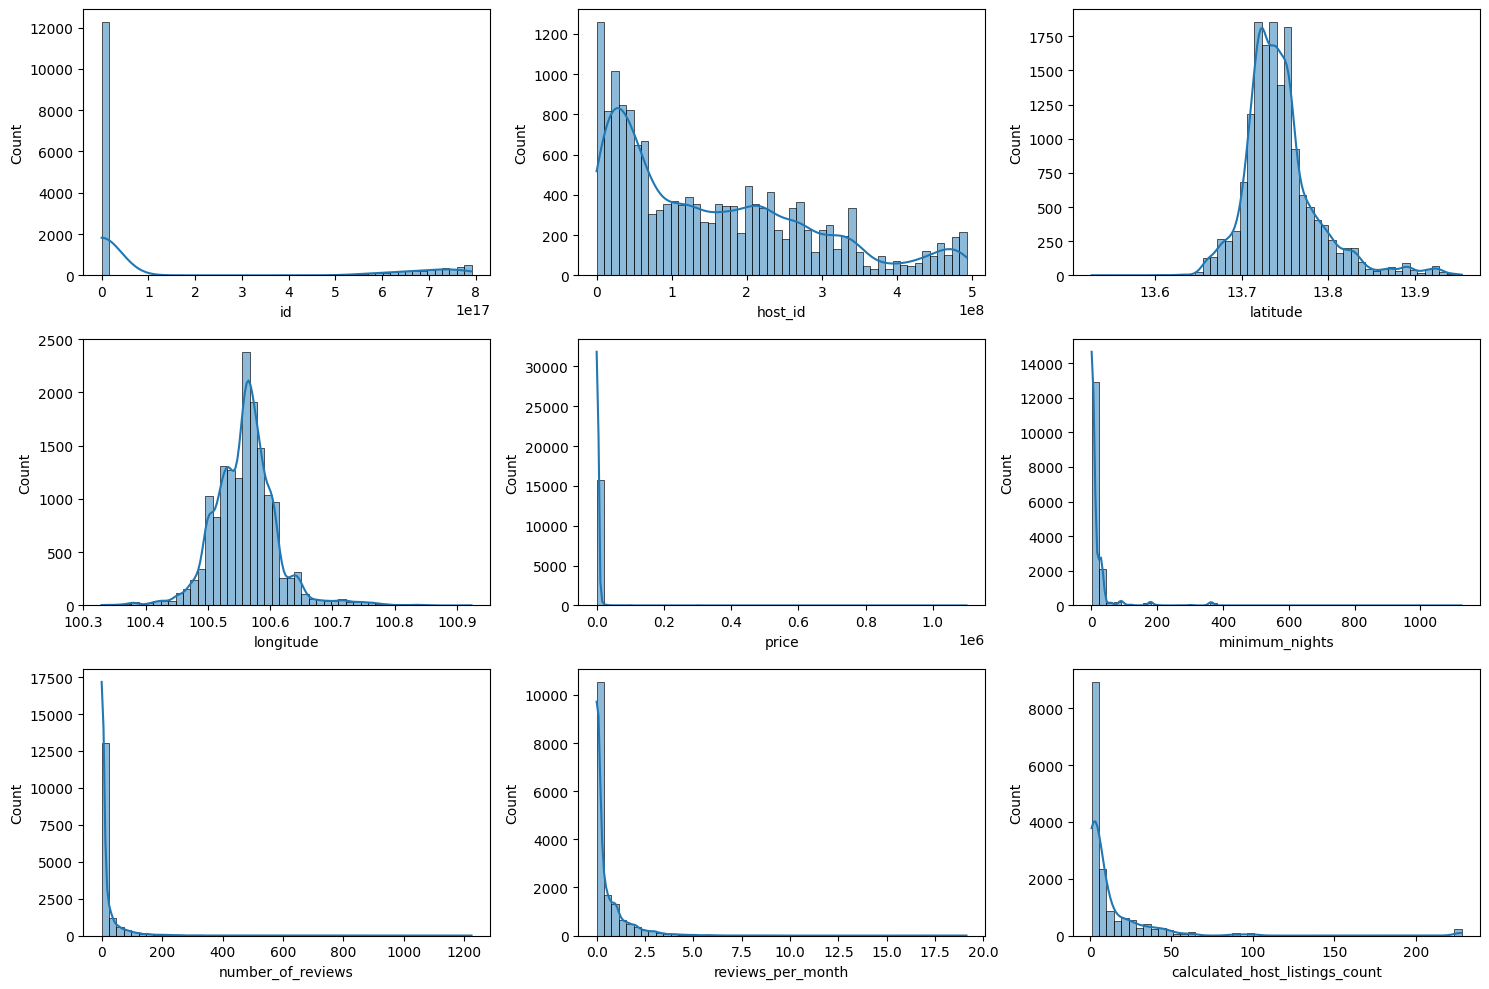

In [38]:
plt.figure(figsize=(15, 10))
for posisi, nama_kolom in zip(range(1, 10), numerik.columns):
    plt.subplot(3, 3, posisi)
    sns.histplot(df[nama_kolom], bins=50, kde=True)

plt.tight_layout()
plt.show()

#### Uji Distribusi Normal

##### Kolmogorov-Smirnov

In [39]:
for nama_kolom in numerik.columns:
    stat, pval = kstest(df[nama_kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {nama_kolom} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom}Distribusi normal (Terima H0)')

Kolom id Distribusi tidak normal (Tolak H0)
Kolom host_id Distribusi tidak normal (Tolak H0)
Kolom latitude Distribusi tidak normal (Tolak H0)
Kolom longitude Distribusi tidak normal (Tolak H0)
Kolom price Distribusi tidak normal (Tolak H0)
Kolom minimum_nights Distribusi tidak normal (Tolak H0)
Kolom number_of_reviews Distribusi tidak normal (Tolak H0)
Kolom reviews_per_month Distribusi tidak normal (Tolak H0)
Kolom calculated_host_listings_count Distribusi tidak normal (Tolak H0)
Kolom availability_365 Distribusi tidak normal (Tolak H0)
Kolom number_of_reviews_ltm Distribusi tidak normal (Tolak H0)
Kolom has_review Distribusi tidak normal (Tolak H0)


##### Liliefors

In [40]:
for kolom in numerik.columns:
    stat, pval = lilliefors(df[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi id tidak normal (Tolak H0)
Distribusi host_id tidak normal (Tolak H0)
Distribusi latitude tidak normal (Tolak H0)
Distribusi longitude tidak normal (Tolak H0)
Distribusi price tidak normal (Tolak H0)
Distribusi minimum_nights tidak normal (Tolak H0)
Distribusi number_of_reviews tidak normal (Tolak H0)
Distribusi reviews_per_month tidak normal (Tolak H0)
Distribusi calculated_host_listings_count tidak normal (Tolak H0)
Distribusi availability_365 tidak normal (Tolak H0)
Distribusi number_of_reviews_ltm tidak normal (Tolak H0)
Distribusi has_review tidak normal (Tolak H0)


## Handling Outliers

### IQR * 1.5 karena DATA TIDAK NORMAL

In [41]:
for nama_kolom in numerik.columns:
    q3 = df[nama_kolom].quantile(0.75)
    q1 = df[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > batas_atas) | (df[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')


Jumlah Outliers id: 3571
Jumlah Outliers host_id: 0
Jumlah Outliers latitude: 1095
Jumlah Outliers longitude: 602
Jumlah Outliers price: 1403
Jumlah Outliers minimum_nights: 3168
Jumlah Outliers number_of_reviews: 2240
Jumlah Outliers reviews_per_month: 1471
Jumlah Outliers calculated_host_listings_count: 1832
Jumlah Outliers availability_365: 0
Jumlah Outliers number_of_reviews_ltm: 2219
Jumlah Outliers has_review: 0


### Mendeteksi Outliers dengan Boxplot

Kolom numerik yang dianalisis: Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'has_review'],
      dtype='object')


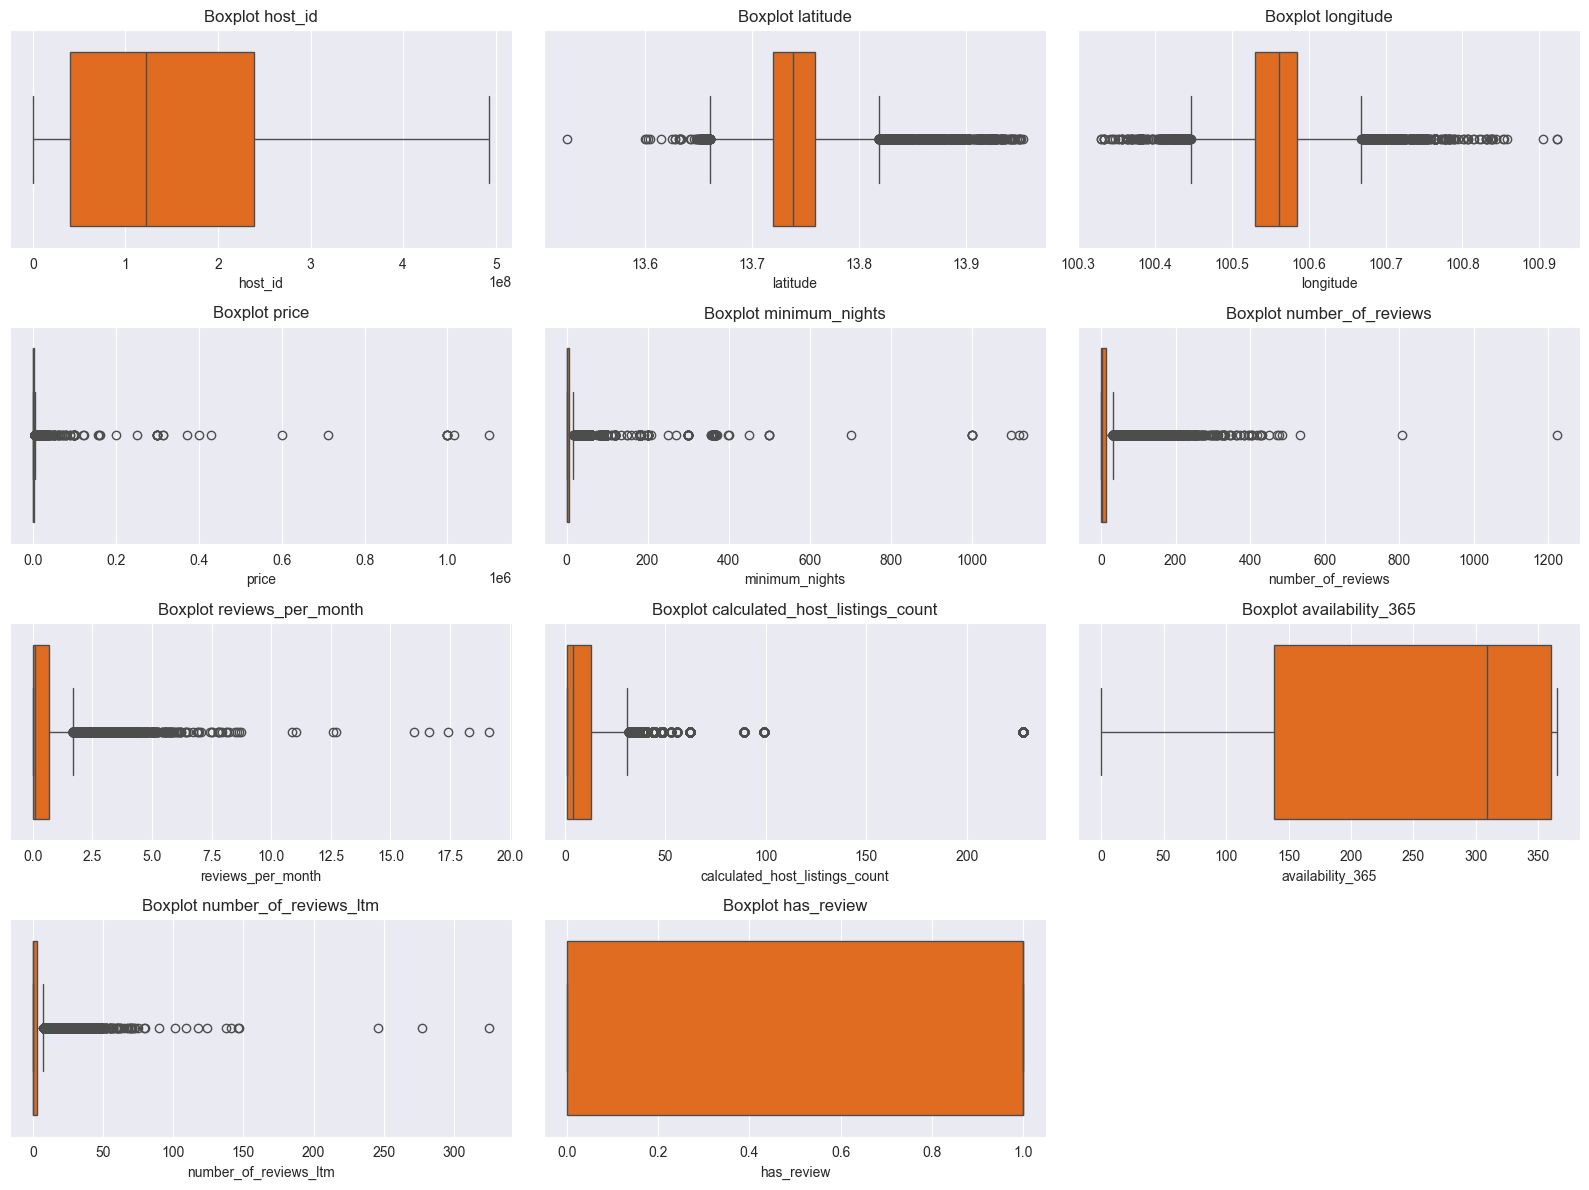

In [42]:
# Hitung jumlah listing per host
host_listings_count = df['host_id'].value_counts()

# Ambil semua kolom numerik kecuali 'id' (host_id tetap ada)
numerik = df.select_dtypes(include=['number']).drop(columns=['id'], errors='ignore')

# Pastikan host_id masuk dalam daftar analisis
print("Kolom numerik yang dianalisis:", numerik.columns)

# Tentukan jumlah baris dan kolom yang optimal untuk subplot
jumlah_kolom = len(numerik.columns)
baris = math.ceil(jumlah_kolom / 3)  # Hitung jumlah baris agar cukup

# Plot boxplot untuk semua kolom numerik
plt.figure(figsize=(16, 12)) # Sesuaikan tinggi figure
sns.set_style("darkgrid")
for i, kolom in enumerate(numerik.columns, 1):
    plt.subplot(baris, 3, i)  # Menyesuaikan jumlah subplot berdasarkan jumlah kolom
    sns.boxplot(x=df[kolom], color='#FF6600')
    plt.title(f"Boxplot {kolom}")

plt.tight_layout()
plt.show()

In [43]:
# Menentukan kolom yang memiliki outlier (kecuali host_id & availability_365 karena outlier = 0)
kolom_outlier = [
    'id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm',
    'has_review'
]

# Mengecek statistik deskriptif untuk memahami penyebaran data di kolom yang memiliki outlier
statistik_outlier = df[kolom_outlier].describe().T

# Menambahkan kolom IQR (Rentang Antar Kuartil) untuk mendeteksi batas outlier
statistik_outlier['IQR'] = statistik_outlier['75%'] - statistik_outlier['25%']
statistik_outlier['Batas Bawah'] = statistik_outlier['25%'] - 1.5 * statistik_outlier['IQR']
statistik_outlier['Batas Atas'] = statistik_outlier['75%'] + 1.5 * statistik_outlier['IQR']

# Menghitung jumlah outlier di bawah dan di atas batas
for kolom in kolom_outlier:
    statistik_outlier.loc[kolom, 'Outlier di Bawah'] = (df[kolom] < statistik_outlier.loc[kolom, 'Batas Bawah']).sum()
    statistik_outlier.loc[kolom, 'Outlier di Atas'] = (df[kolom] > statistik_outlier.loc[kolom, 'Batas Atas']).sum()

# Menampilkan hasil statistik utama dan jumlah outlier
round(statistik_outlier[['count', 'min', '25%', '50%', '75%', 'max', 'IQR', 'Batas Bawah', 'Batas Atas', 'Outlier di Bawah', 'Outlier di Atas']],2)


count       min          25%          50%  \
id                              15854.0  27934.00  21045091.50  35037340.00   
latitude                        15854.0     13.53        13.72        13.74   
longitude                       15854.0    100.33       100.53       100.56   
price                           15854.0      0.00       900.00      1429.00   
minimum_nights                  15854.0      1.00         1.00         1.00   
number_of_reviews               15854.0      0.00         0.00         2.00   
reviews_per_month               15854.0      0.00         0.00         0.09   
calculated_host_listings_count  15854.0      1.00         1.00         4.00   
number_of_reviews_ltm           15854.0      0.00         0.00         0.00   
has_review                      15854.0      0.00         0.00         1.00   

                                        75%           max          IQR  \
id                              52561542.25  7.908162e+17  31516450.75   
latitude                              13.76  1.395000e+01         0.04   
longitude                            100.59  1.009200e+02         0.06   
price                               2429.00  1.100000e+06      1529.00   
minimum_nights                         7.00  1.125000e+03         6.00   
number_of_reviews                     13.00  1.224000e+03        13.00   
reviews_per_month                      0.67  1.913000e+01         0.67   
calculated_host_listings_count        13.00  2.280000e+02        12.00   
number_of_reviews_ltm                  3.00  3.250000e+02         3.00   
has_review                             1.00  1.000000e+00         1.00   

                                Batas Bawah   Batas Atas  Outlier di Bawah  \
id                             -26229584.62  99836218.38               0.0   
latitude                              13.66        13.82             122.0   
longitude                            100.45       100.67             210.0   
price                              -1393.50      4722.50               0.0   
minimum_nights                        -8.00        16.00               0.0   
number_of_reviews                    -19.50        32.50               0.0   
reviews_per_month                     -1.01         1.68               0.0   
calculated_host_listings_count       -17.00        31.00               0.0   
number_of_reviews_ltm                 -4.50         7.50               0.0   
has_review                            -1.50         2.50               0.0   

                                Outlier di Atas  
id                                       3571.0  
latitude                                  973.0  
longitude                                 392.0  
price                                    1403.0  
minimum_nights                           3168.0  
number_of_reviews                        2240.0  
reviews_per_month                        1471.0  
calculated_host_listings_count           1832.0  
number_of_reviews_ltm                    2219.0  
has_review                                  0.0

### Outliers

#### minimum_nights

In [44]:
# Tampilkan statistik awal untuk minimum_nights
print("Statistik Awal untuk minimum_nights:")
print(df['minimum_nights'].describe())

# Hapus baris dengan minimum_nights > 365
df_cleaned = df[df['minimum_nights'] <= 365]

# Tampilkan statistik setelah penghapusan outlier
print("\nStatistik Setelah Menghapus minimum_nights > 365:")
print(df_cleaned['minimum_nights'].describe())

# Tampilkan jumlah baris sebelum dan sesudah
print(f"\nJumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal untuk minimum_nights:
count    15854.000000
mean        15.292355
std         50.815020
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max       1125.000000
Name: minimum_nights, dtype: float64

Statistik Setelah Menghapus minimum_nights > 365:
count    15839.000000
mean        14.602879
std         44.714711
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max        365.000000
Name: minimum_nights, dtype: float64

Jumlah baris sebelum penghapusan: 15854
Jumlah baris setelah penghapusan: 15839
Jumlah baris yang dihapus: 15


Penjelasan:
 - Penghapusan 15 baris (dari 15.854 menjadi 15.839) menghilangkan nilai-nilai ekstrem (>365 malam), sehingga nilai maksimum kini 365 malam (lebih masuk akal untuk properti sewa).
 - Rata-rata turun sedikit (dari 15,29 ke 14,60), menunjukkan bahwa nilai ekstrem sebelumnya memengaruhi rata-rata.
 - Standar deviasi juga turun (dari 50,82 ke 44,71), menunjukkan data kini lebih seragam karena outliers besar hilang.
 - Kuartil (25%, 50%, 75%) tetap sama, menunjukkan bahwa penghapusan hanya memengaruhi ekor distribusi (nilai sangat tinggi).

Jadi:
- Penghapusan 15 baris dengan minimum_nights > 365 menghilangkan nilai ekstrem (maksimum turun dari 1.125 ke 365 malam), membuat dataset lebih realistis untuk analisis properti sewa.
- Rata-rata dan standar deviasi menurun, tetapi kuartil tetap, menunjukkan bahwa perubahan hanya memengaruhi ekor distribusi.
- Dataset tetap memiliki variasi besar (std: 44,71) dan kemungkinan masih banyak outliers di bawah 365 malam, yang konsisten dengan sifat distribusi miring dan tidak normal.

<Axes: ylabel='minimum_nights'>

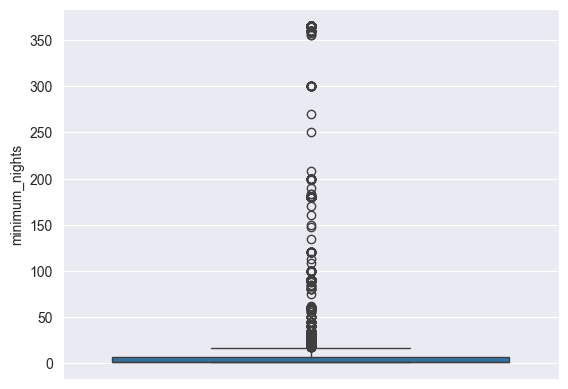

In [45]:
sns.boxplot(df_cleaned['minimum_nights'])

Analisis Boxplot

1. Distribusi Data:
 - Kotak sangat kecil (dari 1 hingga 7 malam), menunjukkan bahwa 50% data (dari Q1 hingga Q3) terkonsentrasi pada nilai yang sangat rendah.
 - Median (1 malam) sama dengan Q1, menunjukkan bahwa sebagian besar properti memiliki persyaratan malam minimum yang sangat rendah (1 malam).
 - Distribusi sangat miring ke kanan (right-skewed), karena ada banyak nilai besar di luar Q3.

2. Outliers:
- Banyak titik di atas batas atas (16 malam), yang menunjukkan adanya outliers. Nilai-nilai ini berkisar dari sekitar 30 malam hingga 365 malam (nilai maksimum setelah penghapusan).
- Outliers ini konsisten dengan informasi sebelumnya: setelah penghapusan minimum_nights > 365, masih ada banyak nilai tinggi (misalnya, 30, 60, 90, hingga 365 malam) yang dianggap outliers berdasarkan metode IQR.
- Sebelumnya, diketahui ada 3.168 outliers untuk minimum_nights. Penghapusan 15 baris (>365 malam) berarti masih ada sekitar 3.153 outliers, yang terlihat sebagai titik-titik pada boxplot ini.

3. Perbandingan dengan Statistik:
- Statistik setelah penghapusan:
     - Count: 15.839 entri.
     - Mean: 14,60 malam (jauh di atas median, menunjukkan pengaruh outliers).
     - Median: 1 malam (sesuai dengan garis median di boxplot).
     - Q1: 1 malam, Q3: 7 malam (sesuai dengan batas kotak).
     - Max: 365 malam (terlihat sebagai titik tertinggi pada boxplot).
- Boxplot ini mengonfirmasi distribusi miring: mayoritas data di bawah 7 malam, tetapi ada nilai ekstrem hingga 365 malam.

#### price

In [46]:
# Tampilkan statistik awal untuk price
print("Statistik Awal untuk price:")
print(df['price'].describe())

# Hapus baris dengan price > 10,000 THB
df_cleaned = df[df['price'] <= 10000]

# Tampilkan statistik setelah penghapusan outlier
print("\nStatistik Setelah Menghapus price > 10,000 THB:")
print(df_cleaned['price'].describe())

# Tampilkan jumlah baris sebelum dan sesudah
print(f"\nJumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal untuk price:
count    1.585400e+04
mean     3.217704e+03
std      2.497212e+04
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64

Statistik Setelah Menghapus price > 10,000 THB:
count    15479.000000
mean      1902.941340
std       1621.299266
min          0.000000
25%        900.000000
50%       1400.000000
75%       2273.000000
max      10000.000000
Name: price, dtype: float64

Jumlah baris sebelum penghapusan: 15854
Jumlah baris setelah penghapusan: 15479
Jumlah baris yang dihapus: 375


Penjelasan:
- Penghapusan 375 baris (dari 15.854 menjadi 15.479) menghilangkan nilai-nilai ekstrem (>10.000 THB), sehingga nilai maksimum kini 10.000 THB (lebih realistis untuk properti sewa).
- Rata-rata turun signifikan (dari 3.217,70 ke 1.902,94 THB), menunjukkan bahwa nilai ekstrem sebelumnya sangat memengaruhi rata-rata.
- Standar deviasi juga turun drastis (dari 24.972,12 ke 1.621,30 THB), menunjukkan data kini lebih seragam karena outliers besar hilang.
- Median (1.400 THB) dan kuartil lainnya sedikit berubah, menunjukkan bahwa penghapusan terutama memengaruhi ekor distribusi (nilai sangat tinggi).

<Axes: ylabel='price'>

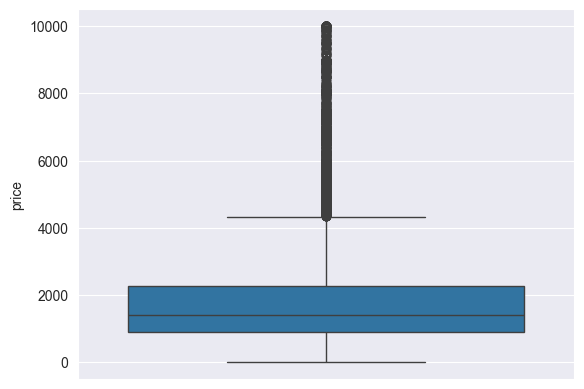

In [47]:
sns.boxplot(df_cleaned['price'])


Implikasi

1. Distribusi Tidak Normal:
 - Boxplot ini mendukung temuan sebelumnya bahwa distribusi price tidak normal (tolak H0). Distribusi sangat miring ke kanan, dengan ekor panjang di sisi nilai tinggi.
 - Mayoritas properti memiliki harga rendah hingga menengah (median 1.400 THB), tetapi ada properti dengan harga jauh lebih tinggi (outliers).

2. Outliers:
 - Outliers (nilai di atas 4.332,5 THB) cukup banyak, menunjukkan bahwa meskipun harga ekstrem (>10.000 THB) telah dihapus, masih ada variasi besar dalam harga.
 - Outliers ini mungkin mencerminkan properti yang lebih mewah atau di lokasi premium, yang wajar dalam dataset properti sewa seperti Airbnb.

3. Pembersihan Data:
 - Penghapusan price > 10.000 THB telah mengurangi nilai ekstrem, tetapi masih ada banyak outliers di bawah 10.000 THB. Jika tujuan analisis adalah fokus pada properti dengan harga terjangkau, Anda mungkin perlu mempertimbangkan untuk menghapus atau mentransformasi outliers lebih lanjut (misalnya, membatasi hingga 5.000 THB).
 - Nilai 0 THB (minimum) masih ada, yang mungkin perlu diperiksa lebih lanjut karena harga 0 THB tidak realistis untuk properti sewa.

4. Bisnis:
 - Properti dengan jumlah ulasan di atas 32,5 (outliers) kemungkinan sangat populer atau telah lama ada di platform, menarik bagi wisatawan yang mencari tempat terpercaya.
 - Mayoritas properti dengan ulasan rendah (0–13 ulasan) menunjukkan bahwa banyak properti mungkin baru atau kurang dikenal, yang bisa menjadi peluang untuk meningkatkan visibilitas.

#### number_of_reviews

In [48]:
# Tampilkan statistik awal
print("Statistik Awal number_of_reviews:")
print(df['number_of_reviews'].describe())

# Hapus baris dengan number_of_reviews > 500
df_cleaned = df[df['number_of_reviews'] <= 500]

# Tampilkan statistik setelah
print("\nStatistik Setelah Menghapus number_of_reviews > 500:")
print(df_cleaned['number_of_reviews'].describe())

# Tampilkan jumlah baris sebelum dan sesudah
print(f"\nJumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal number_of_reviews:
count    15854.000000
mean        16.654157
std         40.613331
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

Statistik Setelah Menghapus number_of_reviews > 500:
count    15851.000000
mean        16.495552
std         38.749599
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max        486.000000
Name: number_of_reviews, dtype: float64

Jumlah baris sebelum penghapusan: 15854
Jumlah baris setelah penghapusan: 15851
Jumlah baris yang dihapus: 3


Penjelasan:
- Penghapusan 3 baris (dari 15.854 menjadi 15.851) menghilangkan nilai-nilai ekstrem (>500 ulasan), sehingga nilai maksimum kini 486 ulasan (masih tinggi, tetapi lebih realistis).
- Rata-rata hanya turun sedikit (dari 16,65 ke 16,50), menunjukkan bahwa 3 baris yang dihapus tidak terlalu memengaruhi rata-rata secara keseluruhan.
- Standar deviasi juga turun sedikit (dari 40,61 ke 38,75), menunjukkan data kini sedikit lebih seragam karena outliers besar hilang.
Kuartil (25%, 50%, 75%) tetap sama, menunjukkan bahwa penghapusan hanya memengaruhi ekor distribusi (nilai sangat tinggi).
- Hanya 3 baris yang memiliki number_of_reviews > 500, yang merupakan persentase sangat kecil dari dataset. Baris-baris ini kemungkinan adalah properti yang sangat populer dengan jumlah ulasan ekstrem (misalnya, hingga 1.224 ulasan).

Implikasi

1. Pembersihan Data:
- Menghapus number_of_reviews > 500 menghilangkan nilai ekstrem, membuat dataset sedikit lebih seragam, meskipun dampaknya kecil karena hanya 3 baris yang dihapus.
- Penghapusan ini mengurangi kemiringan distribusi, tetapi distribusi tetap tidak normal (seperti disebutkan sebelumnya).

2. Dampak pada Analisis:
- Rata-rata dan standar deviasi hanya turun sedikit, menunjukkan bahwa nilai ekstrem yang dihapus tidak terlalu memengaruhi keseluruhan distribusi.
- Kuartil yang tidak berubah menunjukkan bahwa mayoritas data (properti dengan ulasan rendah hingga menengah) tidak terpengaruh.

3. Bisnis:
- Properti dengan lebih dari 500 ulasan (3 baris) kemungkinan sangat populer atau sudah lama ada di platform. Menghapusnya membantu fokus pada properti dengan popularitas lebih umum.
- Namun, nilai maksimum 486 ulasan masih cukup tinggi, menunjukkan bahwa masih ada properti dengan popularitas signifikan dalam dataset.

<Axes: ylabel='number_of_reviews'>

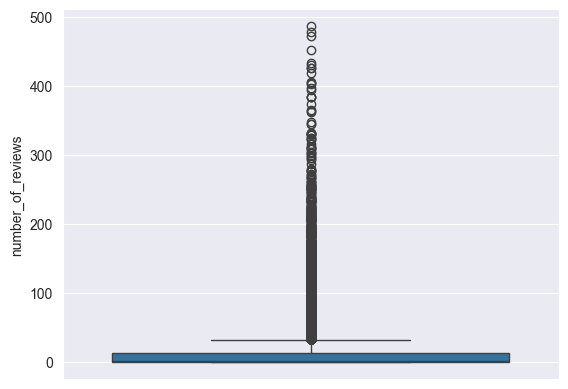

In [49]:
sns.boxplot(df_cleaned['number_of_reviews'])

Implikasi

1. Distribusi Tidak Normal:
- Boxplot ini mendukung temuan sebelumnya bahwa distribusi number_of_reviews tidak normal (tolak H0). Distribusi sangat miring ke kanan, dengan ekor panjang di sisi nilai tinggi.
- Mayoritas properti memiliki sedikit ulasan (median 2 ulasan, Q1 0 ulasan), tetapi ada properti dengan jumlah ulasan jauh lebih tinggi (outliers).

2. Outliers:
- Outliers (nilai di atas 32,5 ulasan) cukup banyak, menunjukkan bahwa meskipun ulasan ekstrem (>500) telah dihapus, masih ada variasi besar dalam popularitas properti.
- Outliers ini mungkin mencerminkan properti yang sangat populer atau telah lama ada di platform, yang wajar dalam dataset properti sewa seperti Airbnb.

3. Pembersihan Data:
- Penghapusan number_of_reviews > 500 telah mengurangi nilai ekstrem, tetapi dampaknya kecil (hanya 3 baris dihapus). Masih ada banyak outliers di bawah 500 ulasan.

Jadi:
 - Boxplot number_of_reviews menunjukkan distribusi yang sangat miring ke kanan, dengan mayoritas properti memiliki 0–13 ulasan (median 2 ulasan), tetapi ada banyak outliers hingga 486 ulasan.
 - Penghapusan number_of_reviews > 500 telah mengurangi nilai ekstrem, tetapi masih ada banyak outliers (di atas 32,5 ulasan), yang konsisten dengan sifat dataset properti sewa yang bervariasi.

#### reviews_per_month

In [50]:
# Tampilkan statistik awal
print("Statistik Awal untuk reviews_per_month:")
print(df['reviews_per_month'].describe())

# Hapus baris dengan reviews_per_month > 10
df_cleaned = df[df['reviews_per_month'] <= 10]

# Tampilkan statistik setelah
print("\nStatistik Setelah Menghapus reviews_per_month > 10:")
print(df_cleaned['reviews_per_month'].describe())

# Tampilkan jumlah baris sebelum dan sesudah
print(f"\nJumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal untuk reviews_per_month:
count    15854.000000
mean         0.516178
std          0.952753
min          0.000000
25%          0.000000
50%          0.090000
75%          0.670000
max         19.130000
Name: reviews_per_month, dtype: float64

Statistik Setelah Menghapus reviews_per_month > 10:
count    15845.000000
mean         0.507972
std          0.885706
min          0.000000
25%          0.000000
50%          0.090000
75%          0.670000
max          8.750000
Name: reviews_per_month, dtype: float64

Jumlah baris sebelum penghapusan: 15854
Jumlah baris setelah penghapusan: 15845
Jumlah baris yang dihapus: 9


Penjelasan:
- Penghapusan 9 baris (dari 15.854 menjadi 15.845) menghilangkan nilai-nilai ekstrem (>10 ulasan per bulan), sehingga nilai maksimum kini 8,75 ulasan per bulan (lebih realistis).
- Rata-rata hanya turun sedikit (dari 0,52 ke 0,51), menunjukkan bahwa 9 baris yang dihapus tidak terlalu memengaruhi rata-rata secara keseluruhan.
- Standar deviasi juga turun sedikit (dari 0,95 ke 0,89), menunjukkan data kini sedikit lebih seragam karena outliers besar hilang.
- Kuartil (25%, 50%, 75%) tetap sama, menunjukkan bahwa penghapusan hanya memengaruhi ekor distribusi (nilai sangat tinggi).
- Hanya 9 baris yang memiliki reviews_per_month > 10, yang merupakan persentase sangat kecil dari dataset. Baris-baris ini kemungkinan adalah properti yang sangat populer dengan tingkat ulasan per bulan yang ekstrem (misalnya, hingga 19,13 ulasan per bulan).

Implikasi

Pembersihan Data:
 - Menghapus reviews_per_month > 10 menghilangkan nilai ekstrem, membuat dataset sedikit lebih seragam, meskipun dampaknya kecil karena hanya 9 baris yang dihapus.
 - Penghapusan ini mengurangi kemiringan distribusi, tetapi distribusi tetap tidak normal (seperti disebutkan sebelumnya).

Dampak pada Analisis:
 - Rata-rata dan standar deviasi hanya turun sedikit, menunjukkan bahwa nilai ekstrem yang dihapus tidak terlalu memengaruhi keseluruhan distribusi.
 - Kuartil yang tidak berubah menunjukkan bahwa mayoritas data (properti dengan ulasan per bulan rendah) tidak terpengaruh.

Bisnis:
 - Properti dengan lebih dari 10 ulasan per bulan (9 baris) kemungkinan sangat populer atau sering disewa. Menghapusnya membantu fokus pada properti dengan tingkat ulasan lebih umum.
 - Namun, nilai maksimum 8,75 ulasan per bulan masih cukup tinggi, menunjukkan bahwa masih ada properti dengan popularitas signifikan dalam dataset.

<Axes: ylabel='reviews_per_month'>

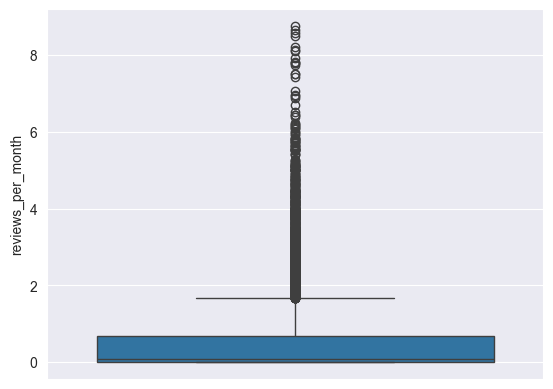

In [51]:
sns.boxplot(df_cleaned['reviews_per_month'])

Implikasi

Distribusi Tidak Normal:
 - Boxplot ini mendukung temuan sebelumnya bahwa distribusi reviews_per_month tidak normal (tolak H0). Distribusi sangat miring ke kanan, dengan ekor panjang di sisi nilai tinggi.
 - Mayoritas properti memiliki tingkat ulasan per bulan yang rendah (median 0,09 ulasan per bulan, Q1 0 ulasan per bulan), tetapi ada properti dengan tingkat ulasan jauh lebih tinggi (outliers).

Outliers:
 - Outliers (nilai di atas 1,675 ulasan per bulan) cukup banyak, menunjukkan bahwa meskipun ulasan ekstrem (>10) telah dihapus, masih ada variasi besar dalam tingkat ulasan per bulan.
 - Outliers ini mungkin mencerminkan properti yang sangat populer atau sering disewa, yang wajar dalam dataset properti sewa seperti Airbnb.

Pembersihan Data:
 - Penghapusan reviews_per_month > 10 telah mengurangi nilai ekstrem, tetapi dampaknya kecil (hanya 9 baris dihapus). Masih ada banyak outliers di bawah 10 ulasan per bulan.
 - Jika tujuan analisis adalah fokus pada properti dengan tingkat ulasan lebih umum, Anda mungkin perlu mempertimbangkan untuk menghapus atau mentransformasi outliers lebih lanjut (misalnya, membatasi hingga 2 ulasan per bulan).

Bisnis:
 - Properti dengan tingkat ulasan per bulan di atas 1,675 (outliers) kemungkinan sangat populer atau sering disewa, menarik bagi wisatawan yang mencari tempat terpercaya.
 - Mayoritas properti dengan ulasan rendah (0–0,67 ulasan per bulan) menunjukkan bahwa banyak properti mungkin baru atau kurang dikenal, yang bisa menjadi peluang untuk meningkatkan visibilitas.

#### calculated_host_listings_count

In [52]:
# Tampilkan statistik awal
print("Statistik Awal untuk calculated_host_listings_count:")
print(df['calculated_host_listings_count'].describe())

# Hapus baris dengan calc_host_listings > 100
df_cleaned = df[df['calculated_host_listings_count'] <= 100]

# Tampilkan statistik setelah
print("\nStatistik Setelah Menghapus calculated_host_listings_count > 100:")
print(df_cleaned['calculated_host_listings_count'].describe())

# Tampilkan jumlah baris sebelum dan sesudah
print(f"\nJumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal untuk calculated_host_listings_count:
count    15854.000000
mean        13.889618
std         30.269848
min          1.000000
25%          1.000000
50%          4.000000
75%         13.000000
max        228.000000
Name: calculated_host_listings_count, dtype: float64

Statistik Setelah Menghapus calculated_host_listings_count > 100:
count    15626.000000
mean        10.765519
std         15.840721
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max         99.000000
Name: calculated_host_listings_count, dtype: float64

Jumlah baris sebelum penghapusan: 15854
Jumlah baris setelah penghapusan: 15626
Jumlah baris yang dihapus: 228


Penjelasan:
 - Penghapusan 228 baris (dari 15.854 menjadi 15.626) menghilangkan nilai-nilai ekstrem (>100 listing), sehingga nilai maksimum kini 99 listing (lebih realistis).
 - Rata-rata turun (dari 13,89 ke 10,77), menunjukkan bahwa nilai ekstrem sebelumnya memengaruhi rata-rata secara signifikan.
 - Standar deviasi juga turun drastis (dari 30,27 ke 15,84), menunjukkan data kini lebih seragam karena outliers besar hilang.
 - Kuartil (25%, 50%) tetap sama, sedangkan Q3 turun sedikit (dari 13 ke 12), menunjukkan bahwa penghapusan terutama memengaruhi ekor distribusi (nilai sangat tinggi).
 - Sebanyak 228 baris memiliki calculated_host_listings_count > 100, yang merupakan persentase kecil dari dataset. Baris-baris ini kemungkinan adalah host yang memiliki jumlah listing sangat banyak (misalnya, hingga 228 listing), mungkin host profesional atau perusahaan.

Implikasi

Pembersihan Data:
 - Menghapus calculated_host_listings_count > 100 menghilangkan nilai ekstrem, membuat dataset lebih seragam dan realistis untuk analisis host individu atau kecil.
 - Penghapusan ini mengurangi kemiringan distribusi, meskipun distribusi tetap tidak normal (seperti disebutkan sebelumnya).

Dampak pada Analisis:
 - Rata-rata dan standar deviasi turun signifikan, menunjukkan data kini lebih representatif untuk host dengan jumlah listing yang lebih umum.
 - Kuartil yang hanya sedikit berubah menunjukkan bahwa mayoritas data (host dengan listing rendah hingga menengah) tidak terpengaruh.

Bisnis:
 - Host dengan lebih dari 100 listing (228 baris) kemungkinan adalah host profesional atau perusahaan besar yang mengelola banyak properti. Menghapusnya membantu fokus pada host individu atau kecil.
- Rata-rata kini 10,77 listing per host, yang lebih mencerminkan host tipikal dalam dataset ini.

<Axes: ylabel='calculated_host_listings_count'>

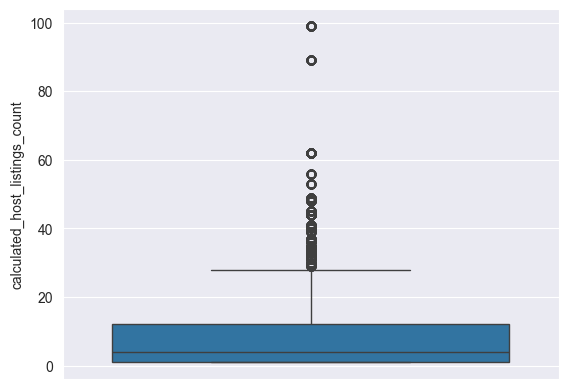

In [53]:
sns.boxplot(df_cleaned['calculated_host_listings_count'])

Implikasi

Distribusi Tidak Normal:
- Boxplot ini mendukung temuan sebelumnya bahwa distribusi calculated_host_listings_count tidak normal (tolak H0). Distribusi sangat miring ke kanan, dengan ekor panjang di sisi nilai tinggi.
- Mayoritas host memiliki sedikit listing (median 4 listing, Q1 1 listing), tetapi ada host dengan jumlah listing jauh lebih tinggi (outliers).

Outliers:
- Outliers (nilai di atas 28,5 listing) cukup banyak, menunjukkan bahwa meskipun listing di atas 100 telah dihapus, masih ada variasi besar dalam jumlah listing per host.
- Outliers ini mungkin mencerminkan host yang lebih besar atau profesional, yang mengelola banyak properti, yang wajar dalam dataset properti sewa seperti Airbnb.

Pembersihan Data:
- Penghapusan calculated_host_listings_count > 100 telah mengurangi nilai ekstrem, tetapi masih ada banyak outliers di bawah 100 listing.
- Jika tujuan analisis adalah fokus pada host individu atau kecil, Anda mungkin perlu mempertimbangkan untuk menghapus atau mentransformasi outliers lebih lanjut (misalnya, membatasi hingga 30 listing).

Bisnis:
- Host dengan jumlah listing di atas 28,5 (outliers) kemungkinan adalah host profesional atau perusahaan yang mengelola banyak properti, menarik bagi wisatawan yang mencari penyedia terpercaya.
- Mayoritas host dengan listing rendah (1–12 listing) menunjukkan bahwa dataset ini didominasi oleh host individu atau kecil, yang mungkin lebih fleksibel dalam pengelolaan.

#### latitude dan longitude

In [54]:
# Tampilkan statistik awal
print("Statistik Awal untuk latitude dan longitude:")
print(df[['latitude', 'longitude']].describe())

# Filter latitude dan longitude dalam rentang Bangkok pusat
df_cleaned = df[
    (df['latitude'] >= 13.5) & (df['latitude'] <= 13.9) &
    (df['longitude'] >= 100.4) & (df['longitude'] <= 100.8)
]

# Tampilkan statistik setelah
print("\nStatistik Setelah Menghapus Outlier latitude dan longitude:")
print(df_cleaned[['latitude', 'longitude']].describe())

print(f"\nJumlah baris sebelum: {len(df)}")
print(f"Jumlah baris setelah: {len(df_cleaned)}")
print(f"Baris dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal untuk latitude dan longitude:
           latitude     longitude
count  15854.000000  15854.000000
mean      13.745144    100.559903
std        0.043040      0.050911
min       13.527300    100.329550
25%       13.720090    100.529690
50%       13.738490    100.561415
75%       13.759497    100.585150
max       13.953540    100.923440

Statistik Setelah Menghapus Outlier latitude dan longitude:
           latitude     longitude
count  15571.000000  15571.000000
mean      13.743079    100.559847
std        0.038551      0.048171
min       13.527300    100.401070
25%       13.720015    100.529690
50%       13.738190    100.561010
75%       13.758295    100.584710
max       13.899790    100.794050

Jumlah baris sebelum: 15854
Jumlah baris setelah: 15571
Baris dihapus: 283


Penjelasan:
- Penghapusan 283 baris menghilangkan outliers, sehingga rentang latitude (13,5273–13,8998) dan longitude (100,4011–100,7941) menyempit.
- Rata-rata latitude dan longitude hanya sedikit berubah, menunjukkan bahwa outliers yang dihapus tidak terlalu memengaruhi pusat data.
- Standar deviasi menurun untuk kedua kolom, menunjukkan data kini lebih seragam dan terkonsentrasi.
- Kuartil (25%, 50%, 75%) hanya sedikit berubah, menunjukkan bahwa penghapusan terutama memengaruhi ekor distribusi (nilai ekstrem).
- Sebanyak 283 baris dihapus karena dianggap outliers. Sebelumnya, diketahui ada 1.095 outliers untuk latitude dan 602 outliers untuk longitude (berdasarkan IQR). Penghapusan ini kemungkinan mencakup baris yang merupakan outliers pada salah satu atau kedua kolom, dengan beberapa baris mungkin menjadi outliers pada keduanya (sehingga total baris yang dihapus lebih kecil dari 1.095 + 602).

Implikasi

Pembersihan Data:
- Menghapus outliers pada latitude dan longitude membuat dataset lebih seragam, dengan rentang geografis yang lebih kecil dan realistis untuk analisis.
- Penghapusan ini mengurangi kemiringan distribusi, meskipun distribusi tetap tidak normal (seperti disebutkan sebelumnya).

Dampak pada Analisis:
- Rata-rata dan standar deviasi yang lebih kecil menunjukkan data kini lebih terkonsentrasi di sekitar pusat geografis.
- Kuartil yang hanya sedikit berubah menunjukkan bahwa mayoritas data (properti di area utama) tidak terpengaruh.

Bisnis:
- Outliers yang dihapus (283 baris) kemungkinan adalah properti di lokasi yang lebih jauh atau terpencil dibandingkan mayoritas (misalnya, di pinggiran kota atau area yang kurang populer).
- Dataset kini lebih fokus pada properti di area utama (kemungkinan di pusat kota seperti Bangkok), yang mungkin lebih relevan untuk analisis pasar sewa.

Geografis:
- Rentang latitude (13,5273–13,8998) dan longitude (100,4011–100,7941) setelah penghapusan masih mencakup area yang luas, tetapi lebih terkonsentrasi, menunjukkan properti lebih dekat ke pusat geografis dataset.

<Axes: ylabel='latitude'>

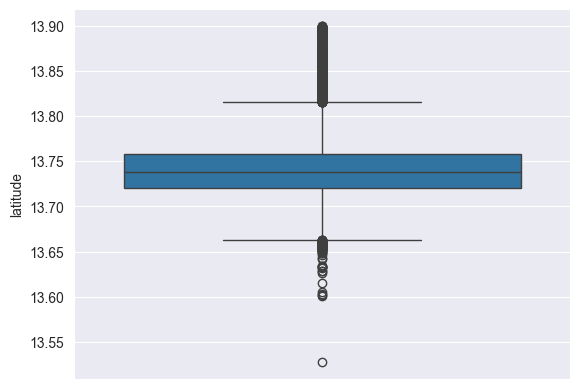

In [55]:
sns.boxplot(df_cleaned['latitude'])

Implikasi

Distribusi Tidak Normal:
- Boxplot ini mendukung temuan sebelumnya bahwa distribusi latitude tidak normal (tolak H0). Meskipun penghapusan outliers telah mengurangi kemiringan, masih ada nilai-nilai ekstrem yang menunjukkan distribusi tidak sepenuhnya simetris.
- Mayoritas properti berada dalam rentang lintang 13,7200–13,7583, yang sangat sempit, menunjukkan konsentrasi geografis (kemungkinan di area urban seperti Bangkok).

Outliers:
- Outliers yang tersisa (di bawah 13,6626 dan di atas 13,8158) menunjukkan adanya properti yang sedikit lebih jauh dari pusat geografis mayoritas.
- Outliers ini mungkin mencerminkan properti di pinggiran kota atau area yang kurang padat, yang masih relevan tetapi tidak berada di pusat dataset.

Pembersihan Data:
- Penghapusan 283 baris outliers telah membuat distribusi lebih seragam, tetapi boxplot ini menunjukkan masih ada beberapa outliers berdasarkan IQR baru.

Bisnis:
- Properti dengan lintang di luar rentang utama (outliers) mungkin berada di lokasi yang kurang populer atau lebih jauh dari pusat kota, yang bisa memengaruhi tingkat sewa atau popularitas.
- Mayoritas properti (dalam rentang 13,7200–13,7583) kemungkinan berada di area yang lebih strategis, menarik bagi wisatawan.

<Axes: ylabel='longitude'>

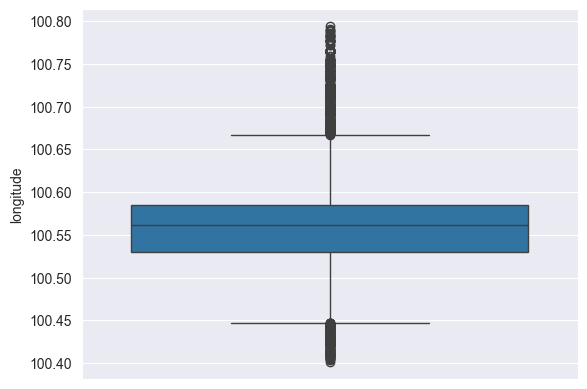

In [56]:
sns.boxplot(df_cleaned['longitude'])

Implikasi

Distribusi Tidak Normal:
- Boxplot ini mendukung temuan sebelumnya bahwa distribusi longitude tidak normal (tolak H0). Meskipun penghapusan outliers telah mengurangi kemiringan, masih ada nilai-nilai ekstrem yang menunjukkan distribusi tidak sepenuhnya simetris.
- Mayoritas properti berada dalam rentang bujur 100,5297–100,5847, yang sangat sempit, menunjukkan konsentrasi geografis (kemungkinan di area urban seperti Bangkok).

Outliers:
- Outliers yang tersisa (di bawah 100,4472 dan di atas 100,6672) menunjukkan adanya properti yang sedikit lebih jauh dari pusat geografis mayoritas.
- Outliers ini mungkin mencerminkan properti di pinggiran kota atau area yang kurang padat, yang masih relevan tetapi tidak berada di pusat dataset.

Pembersihan Data:
- Penghapusan 283 baris outliers (berdasarkan latitude dan longitude) telah membuat distribusi lebih seragam, tetapi boxplot ini menunjukkan masih ada beberapa outliers berdasarkan IQR baru.

Bisnis:
- Properti dengan bujur di luar rentang utama (outliers) mungkin berada di lokasi yang kurang populer atau lebih jauh dari pusat kota, yang bisa memengaruhi tingkat sewa atau popularitas.
- Mayoritas properti (dalam rentang 100,5297–100,5847) kemungkinan berada di area yang lebih strategis, menarik bagi wisatawan.

#### Menggabungkan semua outlier yang sudah dihandle

In [57]:
# Tampilkan statistik awal untuk semua kolom yang akan dihandle
print("Statistik Awal untuk Kolom yang Akan Dihandle:")
print(df[['minimum_nights', 'price', 'number_of_reviews', 'reviews_per_month', 
          'calculated_host_listings_count', 'latitude', 'longitude']].describe())

# 1. Handle outlier minimum_nights > 365
df_cleaned = df[df['minimum_nights'] <= 365]
print("\nSetelah Menghapus minimum_nights > 365:")
print(df_cleaned['minimum_nights'].describe())

# 2. Handle outlier price > 10,000 THB
df_cleaned = df_cleaned[df_cleaned['price'] <= 10000]
print("\nSetelah Menghapus price > 10,000 THB:")
print(df_cleaned['price'].describe())

# 3. Handle outlier number_of_reviews > 500
df_cleaned = df_cleaned[df_cleaned['number_of_reviews'] <= 500]
print("\nSetelah Menghapus number_of_reviews > 500:")
print(df_cleaned['number_of_reviews'].describe())

# 4. Handle outlier reviews_per_month > 10
df_cleaned = df_cleaned[df_cleaned['reviews_per_month'] <= 10]
print("\nSetelah Menghapus reviews_per_month > 10:")
print(df_cleaned['reviews_per_month'].describe())

# 5. Handle outlier calculated_host_listings_count > 100
df_cleaned = df_cleaned[df_cleaned['calculated_host_listings_count'] <= 100]
print("\nSetelah Menghapus calculated_host_listings > 100:")
print(df_cleaned['calculated_host_listings_count'].describe())

# 6. Handle outlier latitude dan longitude
df_cleaned = df_cleaned[
    (df_cleaned['latitude'] >= 13.5) & (df_cleaned['latitude'] <= 13.9) &
    (df_cleaned['longitude'] >= 100.4) & (df_cleaned['longitude'] <= 100.8)
]
print("\nSetelah Menghapus Outlier latitude dan longitude:")
print(df_cleaned[['latitude', 'longitude']].describe())

# Tampilkan jumlah baris sebelum dan sesudah semua penanganan
print(f"\nJumlah baris awal: {len(df)}")
print(f"Jumlah baris setelah semua penanganan: {len(df_cleaned)}")
print(f"Total baris dihapus: {len(df) - len(df_cleaned)}")

Statistik Awal untuk Kolom yang Akan Dihandle:
       minimum_nights         price  number_of_reviews  reviews_per_month  \
count    15854.000000  1.585400e+04       15854.000000       15854.000000   
mean        15.292355  3.217704e+03          16.654157           0.516178   
std         50.815020  2.497212e+04          40.613331           0.952753   
min          1.000000  0.000000e+00           0.000000           0.000000   
25%          1.000000  9.000000e+02           0.000000           0.000000   
50%          1.000000  1.429000e+03           2.000000           0.090000   
75%          7.000000  2.429000e+03          13.000000           0.670000   
max       1125.000000  1.100000e+06        1224.000000          19.130000   

       calculated_host_listings_count      latitude     longitude  
count                    15854.000000  15854.000000  15854.000000  
mean                        13.889618     13.745144    100.559903  
std                         30.269848      0.043040    

Implikasi Keseluruhan

Pembersihan Data:
 - Penghapusan 907 baris (5,72%) menghilangkan nilai-nilai ekstrem pada semua kolom, membuat dataset lebih seragam dan realistis untuk analisis.
 - Standar deviasi menurun di semua kolom, menunjukkan data kini lebih terkonsentrasi di sekitar rata-rata.
 - Kuartil (Q1, Q2, Q3) hanya sedikit berubah di sebagian besar kolom, menunjukkan bahwa mayoritas data tidak terpengaruh, tetapi ekor distribusi (nilai ekstrem) telah dikurangi.

Dampak pada Analisis:
 - Dataset kini lebih cocok untuk analisis statistik atau pemodelan, karena nilai ekstrem yang dapat membiasakan hasil (misalnya, rata-rata) telah dihapus.
 - Distribusi tetap tidak normal (seperti disebutkan sebelumnya), tetapi kemiringan telah berkurang, terutama pada kolom seperti price dan calculated_host_listings_count.

Bisnis:
 - minimum_nights: Fokus pada properti dengan malam minimum hingga 365 hari, cocok untuk sewa jangka pendek hingga menengah.
 - price: Harga kini lebih realistis (maksimum 10.000 THB), mencerminkan properti dengan harga terjangkau hingga menengah.
 - number_of_reviews dan reviews_per_month: Fokus pada properti dengan popularitas lebih umum, menghapus properti yang sangat populer (outliers).
 - calculated_host_listings_count: Fokus pada host individu atau kecil (maksimum 99 listing), menghapus host besar atau profesional.
 - latitude dan longitude: Fokus pada area geografis utama (kemungkinan pusat kota seperti Bangkok), menghapus properti di lokasi terpencil.

Proses pembersihan data menghapus 907 baris (5,72%) dari dataset awal, mengurangi nilai ekstrem pada semua kolom yang dihandle.
Statistik setelah penghapusan menunjukkan distribusi yang lebih seragam (standar deviasi menurun), tetapi tetap tidak normal, dengan fokus pada properti sewa yang lebih umum (harga terjangkau, malam minimum rendah, host kecil, dan lokasi di area utama).

In [58]:
# Menentukan kolom yang memiliki outlier (kecuali host_id & availability_365 karena outlier = 0)
kolom_outlier = [
    'id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm',
    'has_review'
]

# Mengecek statistik deskriptif untuk memahami penyebaran data di kolom yang memiliki outlier
statistik_outlier = df_cleaned[kolom_outlier].describe().T

# Menambahkan kolom IQR (Rentang Antar Kuartil) untuk mendeteksi batas outlier
statistik_outlier['IQR'] = statistik_outlier['75%'] - statistik_outlier['25%']
statistik_outlier['Batas Bawah'] = statistik_outlier['25%'] - 1.5 * statistik_outlier['IQR']
statistik_outlier['Batas Atas'] = statistik_outlier['75%'] + 1.5 * statistik_outlier['IQR']

# Menghitung jumlah outlier di bawah dan di atas batas
for kolom in kolom_outlier:
    statistik_outlier.loc[kolom, 'Outlier di Bawah'] = (df_cleaned[kolom] < statistik_outlier.loc[kolom, 'Batas Bawah']).sum()
    statistik_outlier.loc[kolom, 'Outlier di Atas'] = (df_cleaned[kolom] > statistik_outlier.loc[kolom, 'Batas Atas']).sum()

# Menampilkan hasil statistik utama dan jumlah outlier
round(statistik_outlier[['count', 'min', '25%', '50%', '75%', 'max', 'IQR', 'Batas Bawah', 'Batas Atas', 'Outlier di Bawah', 'Outlier di Atas']],2)


count       min          25%          50%  \
id                              14947.0  27934.00  20877905.00  34860209.00   
latitude                        14947.0     13.53        13.72        13.74   
longitude                       14947.0    100.40       100.53       100.56   
price                           14947.0      0.00       900.00      1400.00   
minimum_nights                  14947.0      1.00         1.00         1.00   
number_of_reviews               14947.0      0.00         0.00         2.00   
reviews_per_month               14947.0      0.00         0.00         0.09   
calculated_host_listings_count  14947.0      1.00         1.00         4.00   
number_of_reviews_ltm           14947.0      0.00         0.00         0.00   
has_review                      14947.0      0.00         0.00         1.00   

                                        75%           max          IQR  \
id                              52962141.50  7.907510e+17  32084236.50   
latitude                              13.76  1.390000e+01         0.04   
longitude                            100.58  1.007900e+02         0.06   
price                               2286.00  1.000000e+04      1386.00   
minimum_nights                         7.00  3.650000e+02         6.00   
number_of_reviews                     13.00  4.860000e+02        13.00   
reviews_per_month                      0.68  8.750000e+00         0.68   
calculated_host_listings_count        13.00  9.900000e+01        12.00   
number_of_reviews_ltm                  3.00  3.250000e+02         3.00   
has_review                             1.00  1.000000e+00         1.00   

                                Batas Bawah    Batas Atas  Outlier di Bawah  \
id                             -27248449.75  1.010885e+08               0.0   
latitude                              13.66  1.382000e+01             137.0   
longitude                            100.45  1.006700e+02             134.0   
price                              -1179.00  4.365000e+03               0.0   
minimum_nights                        -8.00  1.600000e+01               0.0   
number_of_reviews                    -19.50  3.250000e+01               0.0   
reviews_per_month                     -1.02  1.700000e+00               0.0   
calculated_host_listings_count       -17.00  3.100000e+01               0.0   
number_of_reviews_ltm                 -4.50  7.500000e+00               0.0   
has_review                            -1.50  2.500000e+00               0.0   

                                Outlier di Atas  
id                                       3411.0  
latitude                                  827.0  
longitude                                 356.0  
price                                    1144.0  
minimum_nights                           3068.0  
number_of_reviews                        2119.0  
reviews_per_month                        1365.0  
calculated_host_listings_count           1579.0  
number_of_reviews_ltm                    2093.0  
has_review                                  0.0

Implikasi

Distribusi Tidak Normal:
 - Sebagian besar kolom (kecuali has_review) memiliki distribusi miring ke kanan, dengan banyak outliers di atas batas atas (tidak ada di bawah karena batas bawah sering tidak realistis, seperti negatif).
 - Ini konsisten dengan temuan sebelumnya bahwa distribusi tidak normal (tolak H0).

Outliers Tersisa:
- Meskipun banyak outliers telah dihapus (907 baris sebelumnya), masih ada banyak outliers berdasarkan IQR:
     - price: 1.144 outliers (di atas 4.365 THB).
     - minimum_nights: 3.068 outliers (di atas 16 malam).
     - number_of_reviews: 2.119 outliers (di atas 32,5 ulasan).
     - reviews_per_month: 1.365 outliers (di atas 1,70 ulasan per bulan).
     - calculated_host_listings_count: 1.579 outliers (di atas 31 listing).
     - latitude dan longitude: Masih ada outliers geografis.
- Outliers ini menunjukkan variasi alami dalam dataset properti sewa (misalnya, properti mewah, host besar, atau lokasi terpencil).

Pembersihan Data:
- Dataset telah dibersihkan secara signifikan (907 baris dihapus), tetapi masih ada outliers yang mungkin perlu ditangani lebih lanjut jika tujuan analisis adalah fokus pada properti "tipikal".

Bisnis:
- Outliers mencerminkan segmen pasar yang berbeda:
     - Harga tinggi (>4.365 THB): Properti mewah.
     - Malam minimum tinggi (>16 malam): Sewa jangka panjang.
     - Ulasan tinggi: Properti populer.
     - Listing tinggi per host (>31): Host profesional.
- Mayoritas data (berdasarkan Q1, Q2, Q3) menunjukkan properti dengan harga terjangkau, malam minimum rendah, dan ulasan sedikit, yang cocok untuk wisatawan biasa.

In [59]:
# Simpan dataset yang sudah dibersihkan
df_cleaned.to_csv('Airbnb Listings Bangkok Cleaned.csv', index=False)
print("Dataset yang sudah dibersihkan disimpan ke 'Airbnb Listings Bangkok Cleaned.csv'")

Dataset yang sudah dibersihkan disimpan ke 'Airbnb Listings Bangkok Cleaned.csv'


# Analisis

## 1. Analisis Hubungan Durasi Sewa Minimum dengan Pendapatan

In [60]:
# Tampilkan beberapa baris untuk memastikan data terbaca
df_cleaned

id    host_id neighbourhood   latitude   longitude  \
0                   27934     120437   Ratchathewi  13.759830  100.541340   
1                   27979     120541       Bang Na  13.668180  100.616740   
2                   28745     123784     Bang Kapi  13.752320  100.624020   
3                   35780     153730     Din Daeng  13.788230  100.572560   
4                  941865     610315     Bang Kapi  13.768720  100.633380   
...                   ...        ...           ...        ...         ...   
15849  790465040741092826   94899359       Pra Wet  13.715132  100.653458   
15850  790474503157243541  491526222   Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222   Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222   Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                   0.00                               2               358   
2                   0.00                               1               365   
3                   0.03                               1               323   
4                   0.00                               3               365   
...                  ...                             ...               ...   
15849               0.00                               1               362   
15850               0.00                              14               365   
15851               0.00                              14               365   
15852               0.00                              14               365   
15853               0.00                              14               365   

       number_of_reviews_ltm  has_review  
0                          0           1  
1                          0           0  
2                          0           0  
3                          1           1  
4                          0           0  
...                      ...         ...  
15849                      0           0  
15850                      0           0  
15851                      0           0  
15852                      0           0  
15853                      0           0  

[14947 rows x 15 columns]

In [61]:
# Hitung pendapatan estimasi: price * (365 - availability_365)
df_cleaned['estimated_revenue'] = df_cleaned['price'] * (365 - df_cleaned['availability_365'])

# Pastikan tidak ada nilai negatif (jika ada error dalam data)
df_cleaned['estimated_revenue'] = df_cleaned['estimated_revenue'].clip(lower=0)

# Tampilkan beberapa baris untuk memeriksa
df_cleaned[['id', 'price', 'availability_365', 'minimum_nights', 'estimated_revenue']]

id  price  availability_365  minimum_nights  \
0                   27934   1905               353               3   
1                   27979   1316               358               1   
2                   28745    800               365              60   
3                   35780   1286               323               7   
4                  941865   1905               365               1   
...                   ...    ...               ...             ...   
15849  790465040741092826   2298               362              28   
15850  790474503157243541   1429               365               1   
15851  790475335086864240   1214               365               1   
15852  790475546213717328   1214               365               1   
15853  790476492384199044   1214               365               1   

       estimated_revenue  
0                  22860  
1                   9212  
2                      0  
3                  54012  
4                      0  
...                  ...  
15849               6894  
15850                  0  
15851                  0  
15852                  0  
15853                  0  

[14947 rows x 5 columns]

Analisis Umum
- Ukuran Dataset: Dengan 14.947 baris, dataset ini cukup besar dan mungkin mencakup listing dari satu kota, wilayah, atau beberapa pasar.
- Variasi Data:
  - Harga bervariasi dari ratusan hingga ribuan, menunjukkan campuran properti dari kelas ekonomi hingga mewah.
  - Ketersediaan tinggi (banyak nilai mendekati 365) menunjukkan bahwa sebagian besar properti aktif di pasar.
  - minimum_nights yang bervariasi (dari 1 hingga 60) mencerminkan strategi berbeda: beberapa pemilik menargetkan penyewa jangka pendek, sementara yang lain fokus pada penyewa jangka panjang.
  - Banyaknya nilai 0 pada estimated_revenue menarik perhatian. Ini bisa mengindikasikan properti yang tidak laku, baru terdaftar, atau data yang tidak lengkap.

Potensi Masalah:
- Nilai price yang sangat besar (misalnya, 2298) perlu diverifikasi, karena harga per malam biasanya lebih rendah untuk sebagian besar listing.
- ID dengan format panjang (misalnya, 790465040741092826) mungkin menunjukkan perubahan sistem penomoran atau penggabungan dataset dari sumber berbeda.
- estimated_revenue bernilai 0 pada banyak kasus perlu diselidiki lebih lanjut untuk memahami apakah ini wajar atau ada kesalahan.

In [62]:
# Hitung korelasi Spearman antara minimum_nights dan estimated_revenue
correlation, p_value = spearmanr(df_cleaned['minimum_nights'], df_cleaned['estimated_revenue'])

print(f"Korelasi Spearman: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretasi
if p_value < 0.05:
    print("Hubungan signifikan secara statistik (p < 0.05)")
else:
    print("Hubungan tidak signifikan secara statistik (p >= 0.05)")

Korelasi Spearman: 0.099
P-value: 0.000
Hubungan signifikan secara statistik (p < 0.05)


In [63]:
# Buat kategori minimum_nights
bins = [0, 7, 30, float('inf')]  # Batas: 0-7, 8-30, >30
labels = ['Pendek (1-7 hari)', 'Sedang (8-30 hari)', 'Panjang (>30 hari)']
df_cleaned['minimum_nights_category'] = pd.cut(df_cleaned['minimum_nights'], bins=bins, labels=labels, right=True)

# Hitung statistik per kategori
summary = df_cleaned.groupby('minimum_nights_category', observed=True)['estimated_revenue'].agg(['mean', 'median', 'count'])
print(summary)

# Tampilkan dalam format yang rapi
print("\nStatistik Pendapatan Estimasi per Kategori Durasi Sewa:")
print(summary.round(2))

# Tampilkan beberapa baris untuk memeriksa
df_cleaned[['minimum_nights', 'estimated_revenue', 'minimum_nights_category']]

                                  mean    median  count
minimum_nights_category                                
Pendek (1-7 hari)        240274.103677   76771.5  11314
Sedang (8-30 hari)       224598.244413  126360.0   2819
Panjang (>30 hari)       128369.469287   10850.0    814

Statistik Pendapatan Estimasi per Kategori Durasi Sewa:
                              mean    median  count
minimum_nights_category                            
Pendek (1-7 hari)        240274.10   76771.5  11314
Sedang (8-30 hari)       224598.24  126360.0   2819
Panjang (>30 hari)       128369.47   10850.0    814


minimum_nights  estimated_revenue minimum_nights_category
0                   3              22860       Pendek (1-7 hari)
1                   1               9212       Pendek (1-7 hari)
2                  60                  0      Panjang (>30 hari)
3                   7              54012       Pendek (1-7 hari)
4                   1                  0       Pendek (1-7 hari)
...               ...                ...                     ...
15849              28               6894      Sedang (8-30 hari)
15850               1                  0       Pendek (1-7 hari)
15851               1                  0       Pendek (1-7 hari)
15852               1                  0       Pendek (1-7 hari)
15853               1                  0       Pendek (1-7 hari)

[14947 rows x 3 columns]

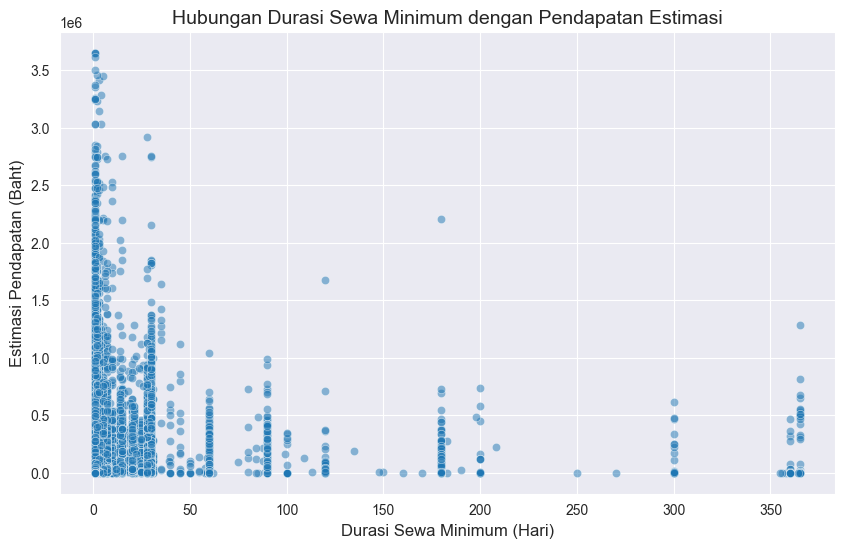

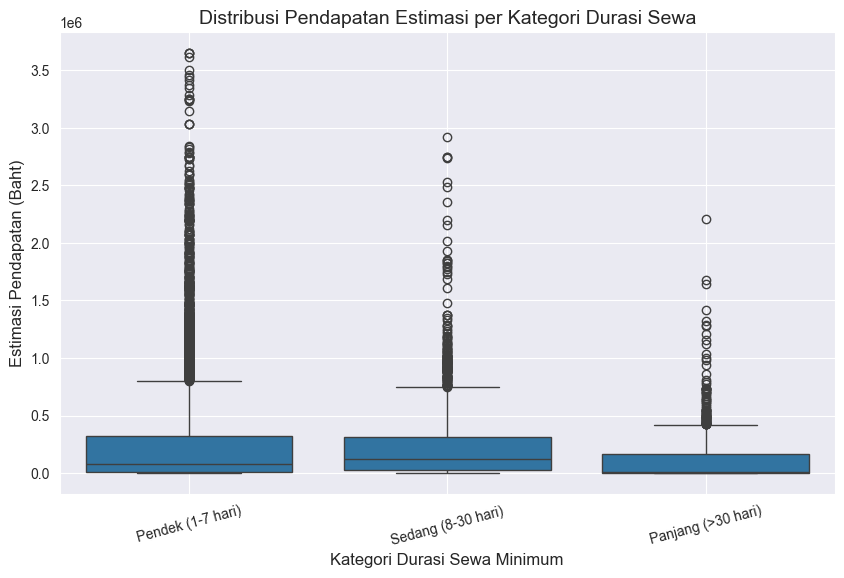

In [64]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='estimated_revenue', data=df_cleaned, alpha=0.5)
plt.title('Hubungan Durasi Sewa Minimum dengan Pendapatan Estimasi', fontsize=14)
plt.xlabel('Durasi Sewa Minimum (Hari)', fontsize=12)
plt.ylabel('Estimasi Pendapatan (Baht)', fontsize=12)
plt.grid(True)
plt.show()

# Boxplot per kategori
plt.figure(figsize=(10, 6))
sns.boxplot(x='minimum_nights_category', y='estimated_revenue', data=df_cleaned)
plt.title('Distribusi Pendapatan Estimasi per Kategori Durasi Sewa', fontsize=14)
plt.xlabel('Kategori Durasi Sewa Minimum', fontsize=12)
plt.ylabel('Estimasi Pendapatan (Baht)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

1. Ringkasan dari Scatter Plot: Hubungan Durasi Sewa Minimum dengan Pendapatan Estimasi

Scatter plot berjudul "Hubungan Durasi Sewa Minimum dengan Pendapatan Estimasi" menampilkan hubungan antara durasi sewa minimum (hari) dan estimasi pendapatan (Baht):
- Pola Umum:
    - Sebagian besar listing memiliki durasi sewa minimum di bawah 50 hari, dengan pendapatan bervariasi dari 0 hingga 1,5 juta Baht.
    - Listing dengan durasi lebih lama (misalnya, 300-365 hari) cenderung memiliki pendapatan rendah, terkonsentrasi di dekat 0 Baht.
    - Tidak ada korelasi linear yang jelas antara durasi sewa minimum dan pendapatan.
- Pendapatan Tinggi:
    - Listing dengan pendapatan di atas 1 juta Baht sebagian besar berada di durasi pendek (0-50 hari).
    - Ada beberapa outliers dengan pendapatan tinggi (hingga 3 juta Baht) pada durasi pendek, konsisten dengan box plot.

Insight:
- Durasi sewa pendek lebih sering dikaitkan dengan pendapatan tinggi, tetapi banyak listing di semua durasi memiliki pendapatan rendah, mungkin karena tingkat okupansi yang bervariasi.

2. Ringkasan dari Box Plot: Distribusi Pendapatan Estimasi per Kategori Durasi Sewa

Box plot berjudul "Distribusi Pendapatan Estimasi per Kategori Durasi Sewa" menunjukkan distribusi estimasi pendapatan (dalam Baht) untuk tiga kategori durasi sewa minimum:
- Pendek (1-7 hari):
    - Median pendapatan rendah, mendekati 0 Baht, menunjukkan sebagian besar listing menghasilkan pendapatan kecil.
    - Banyak outliers dengan pendapatan tinggi, mencapai hingga 3 juta Baht, mengindikasikan beberapa listing sangat sukses.
    - Interquartile range (IQR) sempit, menunjukkan variasi pendapatan yang kecil di antara sebagian besar listing, kecuali outliers.
- Sedang (8-30 hari):
    - Median juga rendah, mirip dengan kategori pendek.
    - Outliers lebih sedikit dibandingkan kategori pendek, dengan nilai maksimum sekitar 2,5 juta Baht.
    - Distribusi serupa dengan pendek, tetapi dengan potensi pendapatan ekstrem yang lebih terbatas.
- Panjang (>30 hari):
    - Median rendah, namun IQR lebih lebar, menunjukkan variasi pendapatan yang lebih besar.
    - Outliers lebih sedikit dan kurang ekstrem, dengan nilai maksimum sekitar 1,5 juta Baht.

Insight:
- Listing dengan durasi sewa pendek (1-7 hari) memiliki potensi pendapatan tertinggi, meskipun kebanyakan menghasilkan pendapatan rendah. Durasi panjang menawarkan pendapatan yang lebih konsisten tetapi jarang mencapai nilai ekstrem.

In [65]:
# Hitung Spearman per neighbourhood
spearman_by_neighbourhood = {}
for neighbourhood in df_cleaned['neighbourhood'].unique():
    subset = df_cleaned[df_cleaned['neighbourhood'] == neighbourhood]
    if len(subset) > 5:  # Minimal data untuk korelasi yang bermakna
        corr, p_val = spearmanr(subset['minimum_nights'], subset['estimated_revenue'])
        spearman_by_neighbourhood[neighbourhood] = {'Correlation': corr, 'P-value': p_val}

# Tampilkan hasil
spearman_df = pd.DataFrame(spearman_by_neighbourhood).T.round(3)
print("Korelasi Spearman per Neighbourhood:")
print(spearman_df)

# Filter yang signifikan (p < 0.05)
significant = spearman_df[spearman_df['P-value'] < 0.05]
print("\nNeighbourhood dengan hubungan signifikan (p < 0.05):")
print(significant)

Korelasi Spearman per Neighbourhood:
                      Correlation  P-value
Ratchathewi                 0.124    0.000
Bang Na                    -0.069    0.145
Bang Kapi                   0.059    0.345
Din Daeng                   0.092    0.055
Bang Kho laen              -0.006    0.947
Rat Burana                 -0.144    0.303
Chatu Chak                  0.032    0.460
Khlong San                  0.073    0.173
Bang Rak                    0.105    0.003
Phaya Thai                  0.049    0.318
Sathon                      0.252    0.000
Khlong Toei                 0.087    0.000
Vadhana                     0.132    0.000
Lat Krabang                 0.029    0.735
Bangkok Yai                 0.037    0.731
Wang Thong Lang             0.070    0.493
Huai Khwang                -0.116    0.000
Phasi Charoen               0.081    0.315
Bang Sue                   -0.260    0.000
Phra Khanong               -0.039    0.364
Pra Wet                    -0.033    0.680
Phra Nakhon      

1. Hubungan Positif Signifikan

Di neighbourhood ini, durasi sewa minimum yang lebih lama cenderung meningkatkan estimasi pendapatan.
- Korelasi Sedang (0.25 - 0.35):
    - Saphan Sung: 0.351 (p = 0.021)
    - Bangkok Noi: 0.315 (p = 0.000)
    - Bang Khen: 0.311 (p = 0.001)
    - Taling Chan: 0.295 (p = 0.040)
    - Sathon: 0.252 (p = 0.000)
- Korelasi Lemah (0.08 - 0.19):
    - Lak Si: 0.185 (p = 0.045)
    - Vadhana: 0.132 (p = 0.000)
    - Phra Nakhon: 0.129 (p = 0.001)
    - Ratchathewi: 0.124 (p = 0.000)
    - Suanluang: 0.111 (p = 0.033)
    - Bang Rak: 0.105 (p = 0.003)
    - Khlong Toei: 0.087 (p = 0.000)

Interpretasi:
 - Neighbourhood dengan korelasi sedang (misalnya, Saphan Sung, Bangkok Noi) menunjukkan bahwa menetapkan durasi sewa lebih lama (misalnya, bulanan) dapat secara nyata meningkatkan pendapatan. Ini mungkin cocok untuk penyewa jangka panjang seperti ekspatriat atau pekerja.
 - Neighbourhood dengan korelasi lemah (misalnya, Khlong Toei, Bang Rak) juga menunjukkan tren positif, tetapi pengaruhnya lebih kecil. Faktor lain seperti harga atau fasilitas mungkin lebih dominan.

2. Hubungan Negatif Signifikan

Di neighbourhood ini, durasi sewa minimum yang lebih lama cenderung menurunkan estimasi pendapatan.
- Korelasi Sedang (-0.26):
    - Bang Sue: -0.260 (p = 0.000)
    - Korelasi Lemah (-0.11 hingga -0.16):
    - Bang Phlat: -0.155 (p = 0.025)
    - Huai Khwang: -0.116 (p = 0.000)

Interpretasi:
 - Di Bang Sue, hubungan negatif yang cukup kuat menunjukkan bahwa sewa jangka pendek lebih menguntungkan. Ini mungkin karena daerah ini menarik wisatawan atau penyewa sementara.
 - Di Huai Khwang dan Bang Phlat, efeknya lebih lemah, tetapi tren tetap sama: durasi sewa pendek lebih baik untuk pendapatan.

3. Neighbourhood Tanpa Hubungan Signifikan

Banyak neighbourhood memiliki p-value > 0.05 (misalnya, Bang Na, Bang Kapi, Din Daeng), menunjukkan bahwa durasi sewa minimum tidak secara signifikan mempengaruhi pendapatan. Contoh:
 - Bang Na: -0.069 (p = 0.145)
 - Bang Kapi: 0.059 (p = 0.345)
 - Din Daeng: 0.092 (p = 0.055)

Interpretasi: Di daerah ini, host memiliki fleksibilitas untuk menetapkan durasi sewa tanpa dampak besar pada pendapatan. Faktor lain seperti lokasi atau tipe kamar mungkin lebih penting.

Jadi:
 - Positif Kuat: Saphan Sung, Bangkok Noi, Bang Khen, Taling Chan, Sathon → Sewa jangka panjang lebih baik.
 - Negatif Kuat: Bang Sue → Sewa jangka pendek lebih baik.
 - Lemah/Tidak Signifikan: Fokus pada faktor lain seperti harga dan fasilitas.

In [66]:
# Hitung statistik per neighbourhood dan kategori
summary_by_neighbourhood = df_cleaned.groupby(['neighbourhood', 'minimum_nights_category'], observed=True)['estimated_revenue'].agg(['mean', 'median', 'count']).round(2)

# Tampilkan hasil
print("Statistik Pendapatan Estimasi per Neighbourhood dan Kategori Durasi Sewa:")
print(summary_by_neighbourhood)

# Filter neighbourhood dengan data cukup (misalnya, count > 10)
significant_summary = summary_by_neighbourhood[summary_by_neighbourhood['count'] > 10]
print("\nNeighbourhood dengan jumlah listing cukup (count > 10):")
print(significant_summary)

Statistik Pendapatan Estimasi per Neighbourhood dan Kategori Durasi Sewa:
                                              mean    median  count
neighbourhood   minimum_nights_category                            
Bang Bon        Pendek (1-7 hari)             0.00       0.0      1
                Sedang (8-30 hari)            0.00       0.0      1
Bang Kapi       Pendek (1-7 hari)        114859.21   24500.0    199
                Sedang (8-30 hari)       115298.40   23400.0     45
                Panjang (>30 hari)        20738.42    1700.0     12
...                                            ...       ...    ...
Wang Thong Lang Sedang (8-30 hari)       131932.09  104310.0     11
                Panjang (>30 hari)       558405.00    1215.0      3
Yan na wa       Pendek (1-7 hari)        170076.96   54810.0    151
                Sedang (8-30 hari)       158562.67   47975.0     24
                Panjang (>30 hari)        37188.73   11900.0     15

[131 rows x 3 columns]

Neighbourhood den

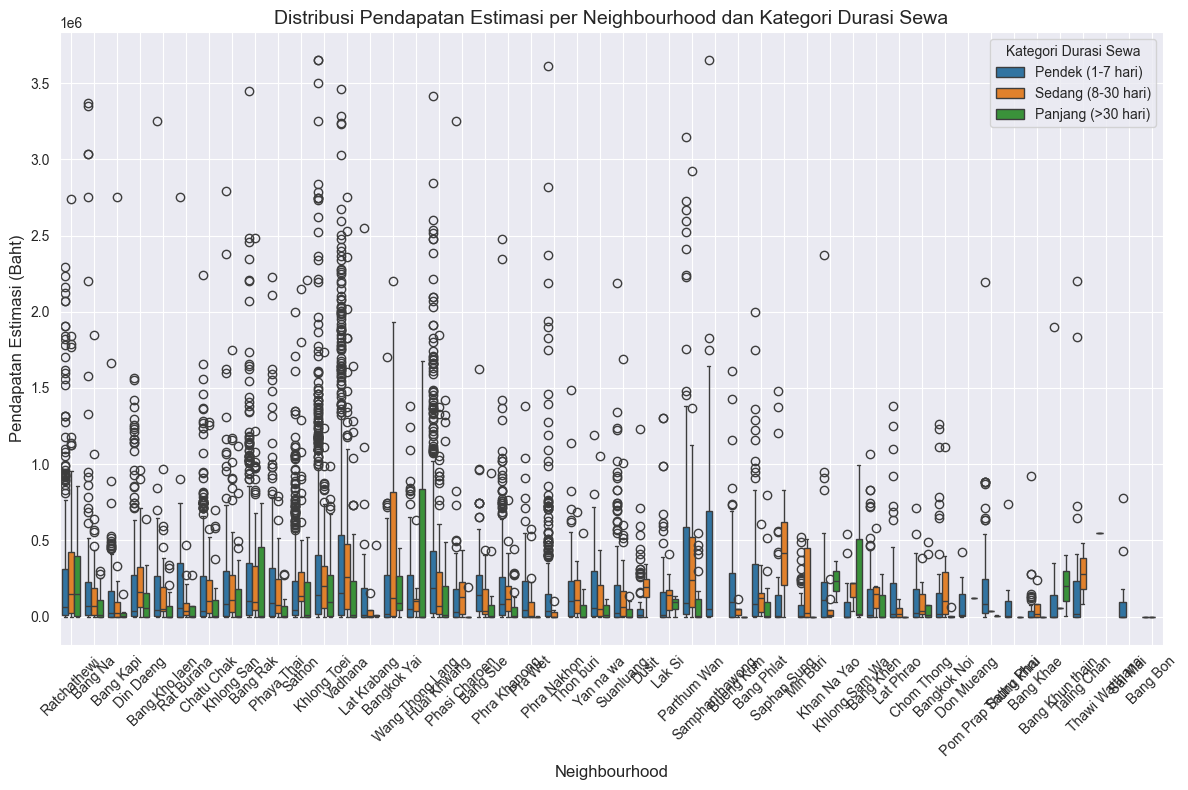

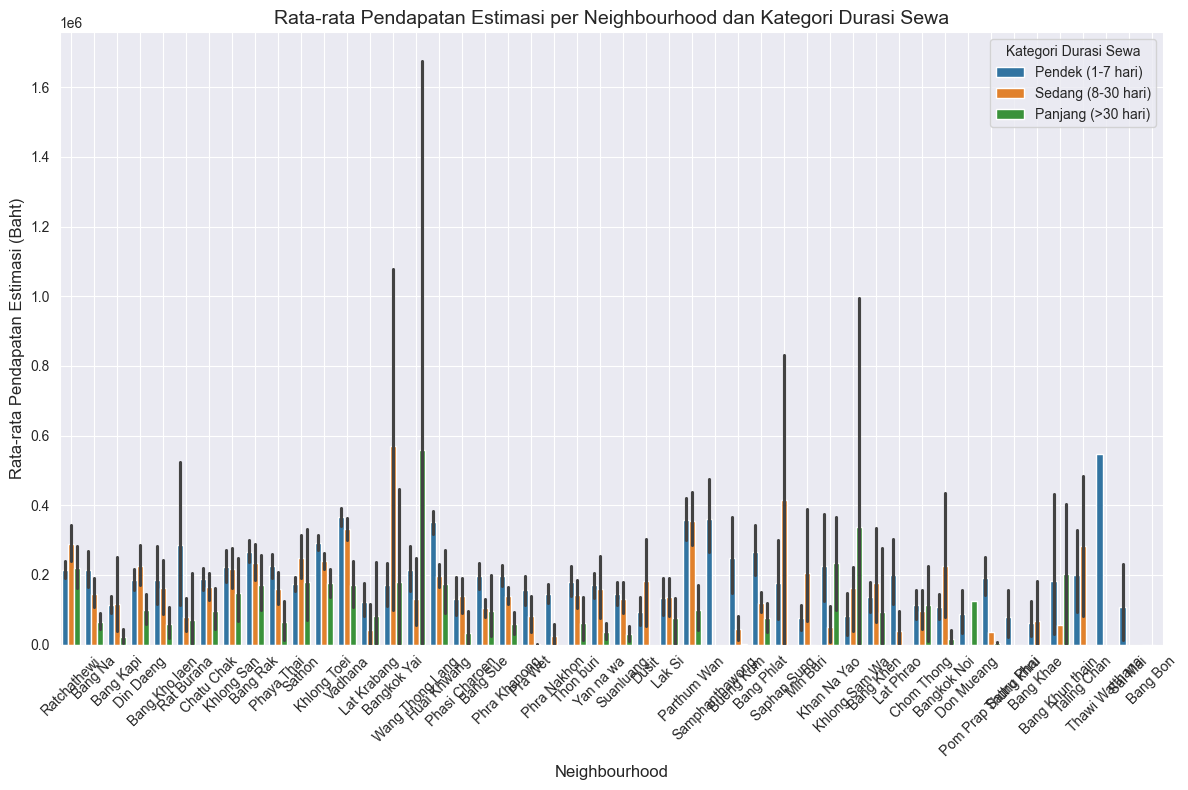

In [67]:
# Boxplot per neighbourhood dan kategori
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='estimated_revenue', hue='minimum_nights_category', data=df_cleaned)
plt.title('Distribusi Pendapatan Estimasi per Neighbourhood dan Kategori Durasi Sewa', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Pendapatan Estimasi (Baht)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori Durasi Sewa')
plt.tight_layout()
plt.grid(True)
plt.show()

# Bar plot rata-rata pendapatan
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='estimated_revenue', hue='minimum_nights_category', data=df_cleaned, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Neighbourhood dan Kategori Durasi Sewa', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori Durasi Sewa')
plt.tight_layout()
plt.grid(True)
plt.show()

1. Scatter Plot: Distribusi Pendapatan Estimasi per Neighbourhood dan Kategori Durasi Sewa

Grafik ini menampilkan distribusi pendapatan per neighbourhood dengan warna untuk kategori durasi sewa.
- Konsentrasi Pendapatan:
    - Sebagian besar pendapatan berada di kisaran 0,5-1,5 juta Baht.
    - Lat Krabang dan Wang Thonglang menonjol dengan pendapatan lebih tinggi, terutama untuk sewa jangka panjang (hijau), hingga 3 juta Baht.
- Kategori Durasi Sewa:
    - Sewa jangka panjang sering kali memiliki pendapatan lebih tinggi di beberapa neighbourhood.
    - Sewa jangka pendek lebih umum tetapi pendapatannya lebih rendah secara rata-rata.
- Wawasan:
    - Beberapa neighbourhood tertentu cocok untuk sewa jangka panjang dengan potensi pendapatan besar.
    -Variasi dalam satu neighbourhood menunjukkan faktor lain (misalnya, tipe properti) juga berpengaruh.

2. Bar Chart: Rata-rata Pendapatan Estimasi per Neighbourhood dan Kategori Durasi Sewa

Grafik ini menunjukkan rata-rata pendapatan estimasi per neighbourhood untuk tiga kategori durasi sewa.
- Neighbourhood dengan Pendapatan Tinggi:
    - Thawi Watthana, Khlong Luang, Bang Phlat, dan Phra Khanong memiliki pendapatan tertinggi, terutama dari sewa jangka panjang (hijau), mencapai hingga 1,6 juta Baht.
    - Ini menunjukkan keunggulan sewa jangka panjang di daerah-daerah ini.
- Neighbourhood dengan Pendapatan Rendah:
    - Chaiyaphum, Lat Krabang, dan beberapa lainnya konsisten rendah di semua kategori (<0,5 juta Baht).
- Dominasi Kategori:
    - Sewa jangka panjang dominan di neighbourhood dengan pendapatan tinggi.
    - Sewa jangka pendek dan menengah unggul di Pathum Wan dan Samphanthawong.
- Wawasan:
    - Di Thawi Watthana dan Khlong Luang, fokus pada sewa jangka panjang lebih menguntungkan.
    - Di Pathum Wan, sewa jangka pendek dan menengah lebih potensial.

Jadi:
- Sewa Jangka Pendek: Potensi pendapatan tinggi, kompetitif, dan bervariasi.
- Sewa Jangka Menengah: Stabilitas dengan potensi sedang.
- Sewa Jangka Panjang: Stabil, cocok untuk neighbourhood tertentu seperti Thawi Watthana.
- Lokasi sangat menentukan strategi sewa yang optimal. Dengan menyesuaikan pendekatan berdasarkan data ini, host dapat memaksimalkan pendapatan mereka di pasar Airbnb Bangkok.

In [68]:
# Hitung Spearman per tipe kamar
spearman_by_room_type = {}
for room_type in df_cleaned['room_type'].unique():
    subset = df_cleaned[df_cleaned['room_type'] == room_type]
    if len(subset) > 5:  # Minimal data untuk korelasi bermakna
        corr, p_val = spearmanr(subset['minimum_nights'], subset['estimated_revenue'])
        spearman_by_room_type[room_type] = {'Correlation': corr, 'P-value': p_val}

# Tampilkan hasil
spearman_room_df = pd.DataFrame(spearman_by_room_type).T.round(3)
print("Korelasi Spearman per Tipe Kamar:")
print(spearman_room_df)

# Filter yang signifikan (p < 0.05)
significant_room = spearman_room_df[spearman_room_df['P-value'] < 0.05]
print("\nTipe Kamar dengan hubungan signifikan (p < 0.05):")
print(significant_room)

Korelasi Spearman per Tipe Kamar:
                 Correlation  P-value
Entire home/apt       -0.059    0.000
Private room           0.026    0.053
Hotel room             0.045    0.261
Shared room            0.011    0.796

Tipe Kamar dengan hubungan signifikan (p < 0.05):
                 Correlation  P-value
Entire home/apt       -0.059      0.0


In [69]:
# Hitung statistik per tipe kamar dan kategori
summary_by_room_type = df_cleaned.groupby(['room_type', 'minimum_nights_category'], observed=True)['estimated_revenue'].agg(['mean', 'median', 'count']).round(2)

# Tampilkan hasil
print("Statistik Pendapatan Estimasi per Tipe Kamar dan Kategori Durasi Sewa:")
print(summary_by_room_type)

# Filter dengan jumlah listing cukup (count > 10)
significant_room_summary = summary_by_room_type[summary_by_room_type['count'] > 10]
print("\nTipe Kamar dengan jumlah listing cukup (count > 10):")
print(significant_room_summary)

Statistik Pendapatan Estimasi per Tipe Kamar dan Kategori Durasi Sewa:
                                              mean    median  count
room_type       minimum_nights_category                            
Entire home/apt Pendek (1-7 hari)        320635.93  184111.0   5474
                Sedang (8-30 hari)       245155.10  153300.0   2264
                Panjang (>30 hari)       147879.27   28274.5    640
Hotel room      Pendek (1-7 hari)        255020.04   43125.0    611
                Sedang (8-30 hari)       219575.33  147502.0     12
                Panjang (>30 hari)       258989.00  258989.0      2
Private room    Pendek (1-7 hari)        163554.59   24000.0   4728
                Sedang (8-30 hari)       140174.22   48896.0    538
                Panjang (>30 hari)        52881.31     430.0    168
Shared room     Pendek (1-7 hari)         68257.10    4018.0    501
                Sedang (8-30 hari)        12534.40     320.0      5
                Panjang (>30 hari)       1119

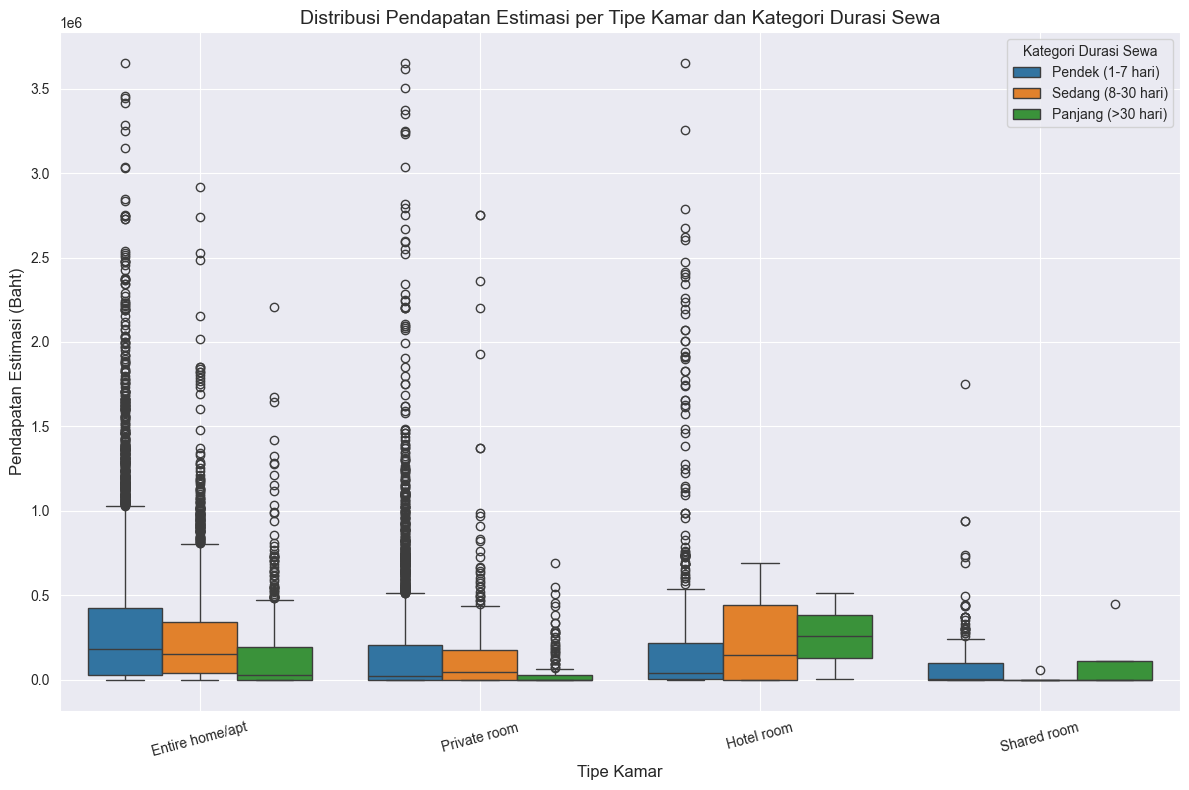

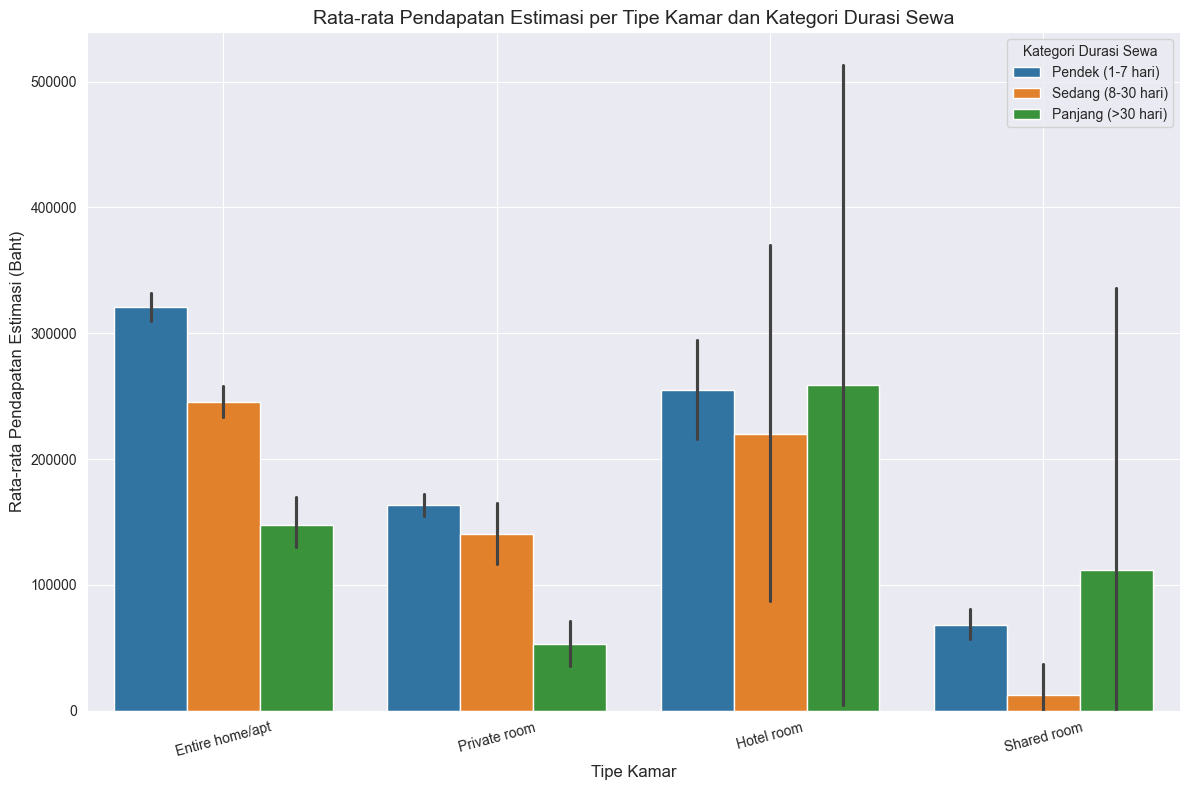

In [70]:
# Boxplot per tipe kamar dan kategori
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='estimated_revenue', hue='minimum_nights_category', data=df_cleaned)
plt.title('Distribusi Pendapatan Estimasi per Tipe Kamar dan Kategori Durasi Sewa', fontsize=14)
plt.xlabel('Tipe Kamar', fontsize=12)
plt.ylabel('Pendapatan Estimasi (Baht)', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Kategori Durasi Sewa')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot rata-rata pendapatan
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='estimated_revenue', hue='minimum_nights_category', data=df_cleaned, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Tipe Kamar dan Kategori Durasi Sewa', fontsize=14)
plt.xlabel('Tipe Kamar', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Kategori Durasi Sewa')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Box Plot - Distribusi Pendapatan Estimasi per Tipe Kamar dan Kategori Durasi Sewa

Kesimpulan:
- Entire home/apt paling menguntungkan, terutama untuk sewa pendek. Shared room kurang diminati.

2. Bar Chart - Rata-rata Pendapatan Estimasi per Tipe Kamar dan Kategori Durasi Sewa

Kesimpulan:
- Entire home/apt unggul untuk sewa pendek, sementara Hotel room optimal untuk sewa panjang.

Kesimpulan dan Saran untuk Host
- Sewa Jangka Pendek: Pilih Entire home/apt atau Hotel room di neighbourhood wisata (contoh: Samphanthawong).
- Sewa Jangka Panjang: Cocok untuk Hotel room di daerah seperti Thawi Watthana.
- Tipe Kamar: Entire home/apt paling menguntungkan, hindari Shared room.
- Strategi: Sesuaikan durasi sewa dan tipe kamar dengan lokasi untuk maksimalkan pendapatan.

## 2. Analisis Strategi Penetapan Harga Dinamis

In [71]:
# Korelasi Spearman keseluruhan
corr_price_revenue, p_val_price_revenue = spearmanr(df_cleaned['price'], df_cleaned['estimated_revenue'])
corr_price_avail, p_val_price_avail = spearmanr(df_cleaned['price'], df_cleaned['availability_365'])
print(f"Korelasi Spearman Price vs Estimated Revenue: {corr_price_revenue:.3f} (p={p_val_price_revenue:.3f})")
print(f"Korelasi Spearman Price vs Availability_365: {corr_price_avail:.3f} (p={p_val_price_avail:.3f})")

# Korelasi per neighbourhood
spearman_price_neighbourhood = {}
for neighbourhood in df_cleaned['neighbourhood'].unique():
    subset = df_cleaned[df_cleaned['neighbourhood'] == neighbourhood]
    if len(subset) > 5:
        corr, p_val = spearmanr(subset['price'], subset['estimated_revenue'])
        spearman_price_neighbourhood[neighbourhood] = {'Correlation': corr, 'P-value': p_val}
print("\nKorelasi Spearman Price vs Estimated Revenue per Neighbourhood:")
print(pd.DataFrame(spearman_price_neighbourhood).T.round(3))

# Korelasi per room_type
spearman_price_room = {}
for room_type in df_cleaned['room_type'].unique():
    subset = df_cleaned[df_cleaned['room_type'] == room_type]
    if len(subset) > 5:
        corr, p_val = spearmanr(subset['price'], subset['estimated_revenue'])
        spearman_price_room[room_type] = {'Correlation': corr, 'P-value': p_val}
print("\nKorelasi Spearman Price vs Estimated Revenue per Room Type:")
print(pd.DataFrame(spearman_price_room).T.round(3))

Korelasi Spearman Price vs Estimated Revenue: 0.296 (p=0.000)
Korelasi Spearman Price vs Availability_365: -0.015 (p=0.060)

Korelasi Spearman Price vs Estimated Revenue per Neighbourhood:
                      Correlation  P-value
Ratchathewi                 0.324    0.000
Bang Na                     0.136    0.004
Bang Kapi                   0.031    0.626
Din Daeng                   0.351    0.000
Bang Kho laen               0.082    0.351
Rat Burana                  0.122    0.383
Chatu Chak                  0.174    0.000
Khlong San                  0.315    0.000
Bang Rak                    0.283    0.000
Phaya Thai                  0.313    0.000
Sathon                      0.295    0.000
Khlong Toei                 0.258    0.000
Vadhana                     0.317    0.000
Lat Krabang                 0.292    0.001
Bangkok Yai                 0.346    0.001
Wang Thong Lang             0.292    0.003
Huai Khwang                 0.403    0.000
Phasi Charoen               0.166    

In [72]:
# Kategori harga berdasarkan kuartil
df_cleaned['price_category'] = pd.qcut(df_cleaned['price'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Kategori ketersediaan
bins_avail = [-1, 100, 300, 366]
labels_avail = ['Rendah (<100 hari)', 'Sedang (100-300 hari)', 'Tinggi (>300 hari)']
df_cleaned['availability_category'] = pd.cut(df_cleaned['availability_365'], bins=bins_avail, labels=labels_avail, right=True)

# Statistik per kategori harga dan ketersediaan
summary_price_avail = df_cleaned.groupby(['price_category', 'availability_category'], observed=True)['estimated_revenue'].agg(['mean', 'median', 'count']).round(2)
print("Statistik Pendapatan Estimasi per Kategori Harga dan Ketersediaan:")
print(summary_price_avail)

Statistik Pendapatan Estimasi per Kategori Harga dan Ketersediaan:
                                            mean    median  count
price_category availability_category                             
Rendah         Rendah (<100 hari)      230033.39  227217.5    972
               Sedang (100-300 hari)   127806.11  126260.0   1423
               Tinggi (>300 hari)       10380.59    3012.0   2588
Sedang         Rendah (<100 hari)      430694.81  423000.0   1008
               Sedang (100-300 hari)   254020.40  257686.0   1439
               Tinggi (>300 hari)       21226.36    9000.0   2534
Tinggi         Rendah (<100 hari)     1104901.57  908040.0   1169
               Sedang (100-300 hari)   612293.35  523600.0   1243
               Tinggi (>300 hari)       45739.80   16492.0   2571


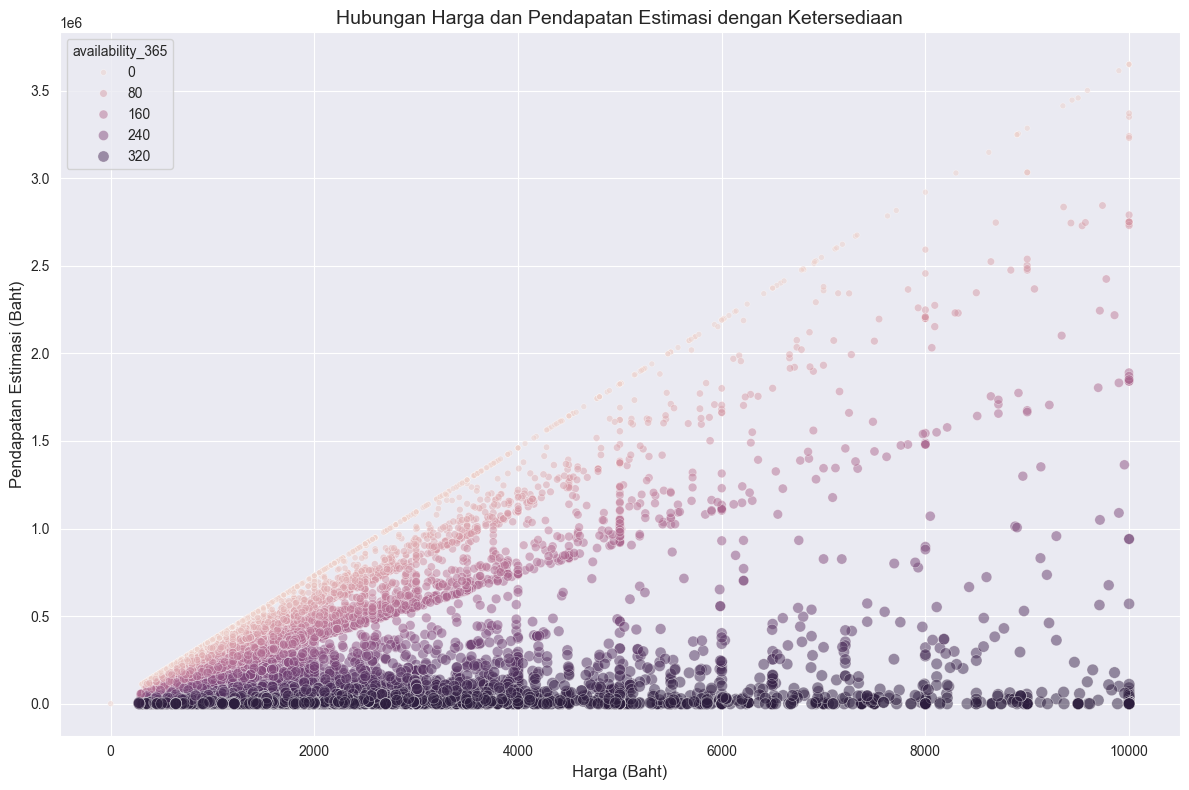

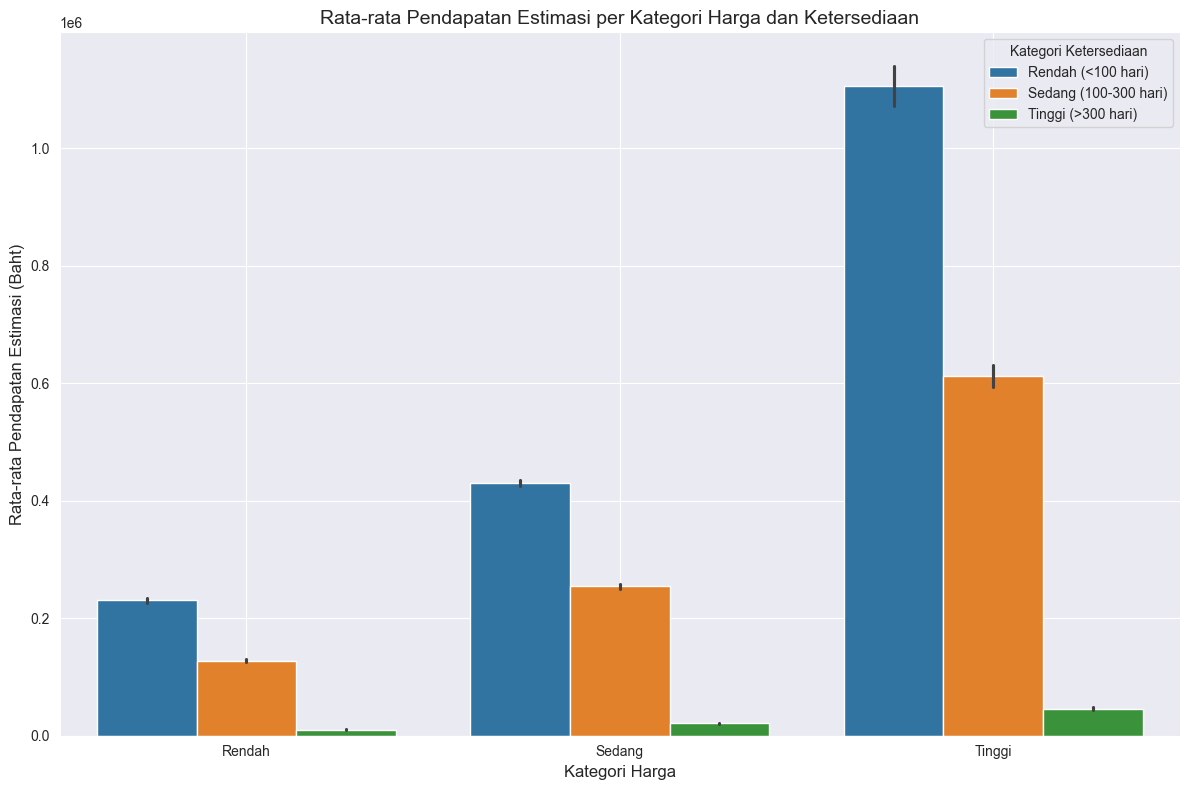

In [73]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='estimated_revenue', hue='availability_365', size='availability_365', data=df_cleaned, alpha=0.5)
plt.title('Hubungan Harga dan Pendapatan Estimasi dengan Ketersediaan', fontsize=14)
plt.xlabel('Harga (Baht)', fontsize=12)
plt.ylabel('Pendapatan Estimasi (Baht)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='price_category', y='estimated_revenue', hue='availability_category', data=df_cleaned, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Kategori Harga dan Ketersediaan', fontsize=14)
plt.xlabel('Kategori Harga', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Kategori Ketersediaan')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Scatter Plot - Hubungan Harga dan Pendapatan Estimasi dengan Ketersediaan

Kesimpulan:
- Harga yang lebih tinggi berkorelasi dengan pendapatan estimasi yang lebih besar, terutama pada listing dengan ketersediaan tinggi, meskipun ada variasi dalam data.

2. Bar Chart - Rata-rata Pendapatan Estimasi per Kategori Harga dan Ketersediaan

Kesimpulan:
- Pendapatan meningkat seiring kenaikan harga, terutama pada ketersediaan rendah, menunjukkan listing dengan permintaan tinggi (ketersediaan rendah) lebih menguntungkan.

Kesimpulan dan Saran
- Sewa Jangka Pendek: Pilih Entire home/apt atau Hotel room di neighbourhood wisata seperti Samphanthawong untuk pendapatan maksimum.
- Sewa Jangka Panjang: Cocok untuk Hotel room di daerah seperti Thawi Watthana.
- Tipe Kamar: Entire home/apt paling menguntungkan; hindari Shared room.
- Harga dan Ketersediaan: Listing dengan harga tinggi dan ketersediaan rendah cenderung paling menguntungkan.

In [74]:
# Statistik per neighbourhood
summary_neighbourhood = df_cleaned.groupby(['neighbourhood', 'price_category', 'availability_category'], observed=True)['estimated_revenue'].agg(['mean']).round(2)
print("\nStatistik Pendapatan per Neighbourhood, Harga, dan Ketersediaan:")
print(summary_neighbourhood)

# Statistik per room_type
summary_room = df_cleaned.groupby(['room_type', 'price_category', 'availability_category'], observed=True)['estimated_revenue'].agg(['mean']).round(2)
print("\nStatistik Pendapatan per Room Type, Harga, dan Ketersediaan:")
print(summary_room)


Statistik Pendapatan per Neighbourhood, Harga, dan Ketersediaan:
                                                         mean
neighbourhood price_category availability_category           
Bang Bon      Sedang         Tinggi (>300 hari)          0.00
              Tinggi         Tinggi (>300 hari)          0.00
Bang Kapi     Rendah         Rendah (<100 hari)     188252.38
                             Sedang (100-300 hari)  119104.73
                             Tinggi (>300 hari)      10056.52
...                                                       ...
Yan na wa     Sedang         Sedang (100-300 hari)  230316.84
                             Tinggi (>300 hari)      16765.51
              Tinggi         Rendah (<100 hari)     746906.33
                             Sedang (100-300 hari)  497990.92
                             Tinggi (>300 hari)      22198.48

[400 rows x 1 columns]

Statistik Pendapatan per Room Type, Harga, dan Ketersediaan:
                                          

## 3. Analisis Perbandingan Antar Neighbourhood

In [75]:
# Korelasi per neighbourhood
spearman_results = {}
for neighbourhood in df_cleaned['neighbourhood'].unique():
    subset = df_cleaned[df_cleaned['neighbourhood'] == neighbourhood]
    if len(subset) > 5:  # Minimal data untuk korelasi
        corr_min_nights, p_min_nights = spearmanr(subset['minimum_nights'], subset['estimated_revenue'])
        corr_price, p_price = spearmanr(subset['price'], subset['estimated_revenue'])
        spearman_results[neighbourhood] = {
            'Min Nights Corr': corr_min_nights, 'Min Nights P-value': p_min_nights,
            'Price Corr': corr_price, 'Price P-value': p_price
        }

# Tampilkan hasil
spearman_df = pd.DataFrame(spearman_results).T.round(3)
print("Korelasi Spearman per Neighbourhood:")
print(spearman_df)

# Filter signifikan (p < 0.05)
significant_df = spearman_df[(spearman_df['Min Nights P-value'] < 0.05) | (spearman_df['Price P-value'] < 0.05)]
print("\nNeighbourhood dengan hubungan signifikan (p < 0.05):")
print(significant_df)

Korelasi Spearman per Neighbourhood:
                      Min Nights Corr  Min Nights P-value  Price Corr  \
Ratchathewi                     0.124               0.000       0.324   
Bang Na                        -0.069               0.145       0.136   
Bang Kapi                       0.059               0.345       0.031   
Din Daeng                       0.092               0.055       0.351   
Bang Kho laen                  -0.006               0.947       0.082   
Rat Burana                     -0.144               0.303       0.122   
Chatu Chak                      0.032               0.460       0.174   
Khlong San                      0.073               0.173       0.315   
Bang Rak                        0.105               0.003       0.283   
Phaya Thai                      0.049               0.318       0.313   
Sathon                          0.252               0.000       0.295   
Khlong Toei                     0.087               0.000       0.258   
Vadhana       

In [76]:
# Statistik per neighbourhood
summary_neighbourhood = df_cleaned.groupby(['neighbourhood', 'minimum_nights_category', 'price_category'], observed=True)['estimated_revenue'].agg(['mean', 'median', 'count']).round(2)
print("Statistik Pendapatan Estimasi per Neighbourhood, Durasi Sewa, dan Harga:")
print(summary_neighbourhood)

# Filter dengan jumlah listing cukup (count > 10)
significant_summary = summary_neighbourhood[summary_neighbourhood['count'] > 10]
print("\nNeighbourhood dengan jumlah listing cukup (count > 10):")
print(significant_summary)

Statistik Pendapatan Estimasi per Neighbourhood, Durasi Sewa, dan Harga:
                                                           mean    median  \
neighbourhood minimum_nights_category price_category                        
Bang Bon      Pendek (1-7 hari)       Tinggi               0.00       0.0   
              Sedang (8-30 hari)      Sedang               0.00       0.0   
Bang Kapi     Pendek (1-7 hari)       Rendah           74938.33   27650.0   
                                      Sedang          157405.68   51520.0   
                                      Tinggi          164275.45    6529.5   
...                                                         ...       ...   
Yan na wa     Sedang (8-30 hari)      Sedang          249002.25  310500.0   
                                      Tinggi          207702.00   77000.0   
              Panjang (>30 hari)      Rendah           61741.38   74885.5   
                                      Sedang            4966.67    3000.0   
   

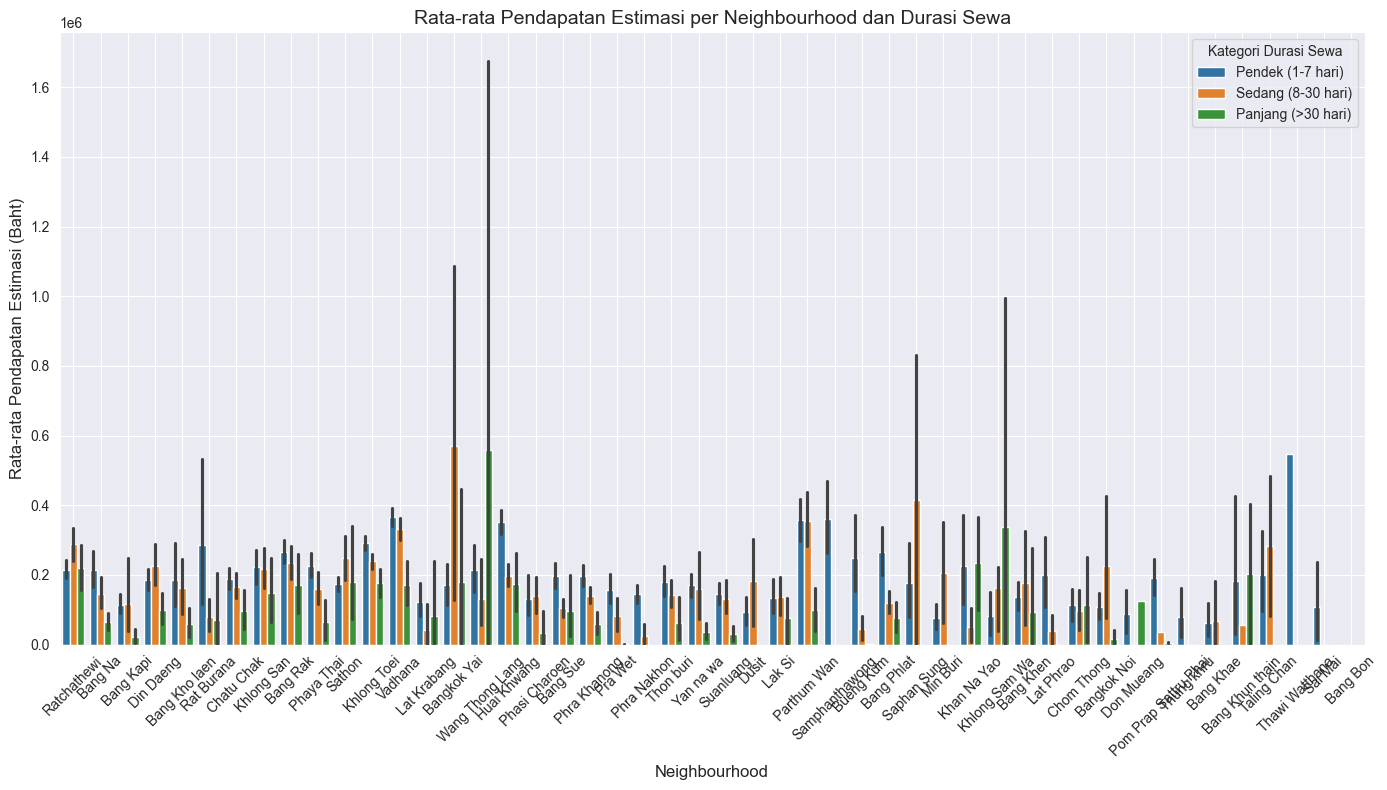

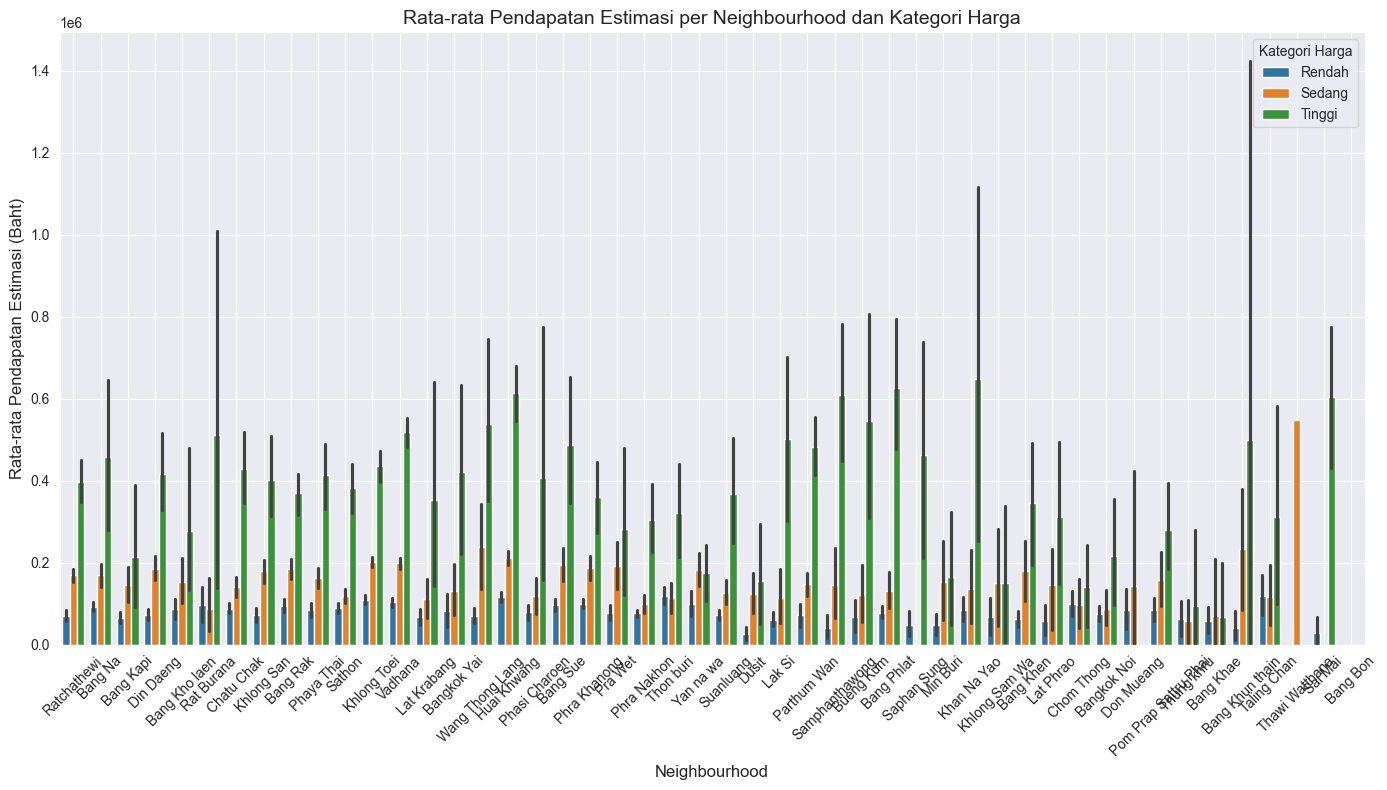

In [77]:
# Bar plot untuk minimum_nights
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='estimated_revenue', hue='minimum_nights_category', data=df_cleaned, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Neighbourhood dan Durasi Sewa', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori Durasi Sewa')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot untuk price_category
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='estimated_revenue', hue='price_category', data=df_cleaned, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Neighbourhood dan Kategori Harga', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori Harga')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Analisis Dampak Durasi dan Harga Berdasarkan Waktu (Proxy Musiman)

In [78]:
# Ekstrak bulan
df_cleaned['month'] = df_cleaned['last_review'].dt.month

# Kategorikan musim (berdasarkan Bangkok)
def categorize_season(month):
    if month in [11, 12, 1, 2]:  # Nov-Feb
        return 'High Season'
    elif month in [5, 6, 7, 8, 9, 10]:  # Mei-Okt
        return 'Low Season'
    elif month in [3, 4]:  # Mar-Apr
        return 'Mid Season'
    else:
        return 'Unknown'  # Untuk NaN atau data hilang

df_cleaned['season'] = df_cleaned['month'].apply(categorize_season)

# Tampilkan distribusi
print("Distribusi Listing per Musim:")
print(df_cleaned['season'].value_counts())

Distribusi Listing per Musim:
season
High Season    6286
Unknown        5415
Low Season     2469
Mid Season      777
Name: count, dtype: int64


Penjelasan:

Dalam konteks data Airbnb Bangkok, "season" kemungkinan besar merujuk pada periode permintaan pariwisata yang berbeda di kota tersebut. Berikut adalah interpretasi dari masing-masing kategori musim:
- High Season: Periode dengan permintaan tertinggi, biasanya bertepatan dengan cuaca yang lebih sejuk atau acara khusus seperti festival. Di Bangkok, ini biasanya jatuh pada bulan November hingga Februari, saat suhu lebih nyaman dan ada perayaan seperti Loy Krathong atau Tahun Baru.
- Low Season: Periode dengan permintaan rendah, sering kali selama musim hujan atau cuaca kurang ideal untuk wisata. Di Bangkok, ini biasanya dari Mei hingga Oktober, ketika hujan deras dan kelembapan tinggi.
- Mid Season: Periode transisi di antara High dan Low Season, dengan permintaan sedang. Ini bisa jadi bulan Maret-April atau September-Oktober.
- Unknown: Listing yang tidak memiliki informasi musim yang jelas, kemungkinan karena data yang hilang atau listing yang tersedia sepanjang tahun tanpa penyesuaian musiman.

Analisis Distribusi:
1. High Season (6,286 listing):
- Jumlah listing terbanyak berada di periode ini.
- Hal ini menunjukkan bahwa banyak host Airbnb di Bangkok memanfaatkan permintaan tinggi untuk menawarkan listing mereka, yang merupakan strategi logis untuk meningkatkan okupansi dan pendapatan.

2. Unknown (5,415 listing):
- Kategori ini memiliki jumlah yang sangat besar, hampir mendekati High Season.
- Ini bisa mengindikasikan bahwa banyak listing tidak dikategorikan ke musim tertentu, mungkin karena data yang hilang atau karena host tidak menyesuaikan listing berdasarkan musim (misalnya, tersedia sepanjang tahun).

3. Low Season (2,469 listing):
- Meskipun permintaan lebih rendah, masih ada cukup banyak listing yang tersedia.
- Ini mungkin menarik bagi wisatawan yang mencari harga lebih murah atau yang tidak terganggu oleh cuaca musim hujan.

4. Mid Season (777 listing):
- Jumlah listing paling sedikit ada di periode ini.
- Host tampaknya kurang fokus pada periode transisi ini, mungkin karena permintaan yang tidak terlalu tinggi dibandingkan High Season, tetapi juga tidak terlalu rendah seperti Low Season.

Insight:
- Fokus pada High Season: Sebagian besar host tampaknya mengoptimalkan listing mereka untuk periode permintaan tinggi, yang masuk akal dari perspektif bisnis.
- Banyaknya Unknown: Jumlah listing Unknown yang signifikan menunjukkan adanya peluang untuk perbaikan data atau strategi. Host yang tidak menyesuaikan listing berdasarkan musim mungkin kehilangan kesempatan untuk menarik tamu dengan penyesuaian harga atau promosi musiman.
- Low dan Mid Season: Listing di periode ini lebih sedikit, tetapi tetap ada, menunjukkan bahwa beberapa host mungkin menargetkan segmen pasar tertentu, seperti wisatawan hemat atau yang fleksibel dengan cuaca.

In [79]:
# Filter data dengan musim yang diketahui
df_season = df_cleaned[df_cleaned['season'] != 'Unknown']

# Korelasi per musim
spearman_season = {}
for season in df_season['season'].unique():
    subset = df_season[df_season['season'] == season]
    if len(subset) > 5:
        corr_min_nights, p_min_nights = spearmanr(subset['minimum_nights'], subset['estimated_revenue'])
        corr_price, p_price = spearmanr(subset['price'], subset['estimated_revenue'])
        spearman_season[season] = {
            'Min Nights Corr': corr_min_nights, 'Min Nights P-value': p_min_nights,
            'Price Corr': corr_price, 'Price P-value': p_price
        }

# Tampilkan hasil
spearman_season_df = pd.DataFrame(spearman_season).T.round(3)
print("Korelasi Spearman per Musim:")
print(spearman_season_df)

Korelasi Spearman per Musim:
             Min Nights Corr  Min Nights P-value  Price Corr  Price P-value
High Season            0.135               0.000       0.417            0.0
Mid Season             0.055               0.128       0.309            0.0
Low Season             0.135               0.000       0.369            0.0


In [80]:
# Kategori harga
df_season['price_category'] = pd.qcut(df_season['price'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Statistik per musim
summary_season = df_season.groupby(['season', 'minimum_nights_category', 'price_category'], observed=True)['estimated_revenue'].agg(['mean', 'median', 'count']).round(2)
print("Statistik Pendapatan Estimasi per Musim, Durasi Sewa, dan Harga:")
print(summary_season)

Statistik Pendapatan Estimasi per Musim, Durasi Sewa, dan Harga:
                                                         mean    median  count
season      minimum_nights_category price_category                            
High Season Pendek (1-7 hari)       Rendah           89060.96   41800.0   1495
                                    Sedang          172769.40   90432.0   1681
                                    Tinggi          494017.37  361860.0   1901
            Sedang (8-30 hari)      Rendah          120494.59  103020.0    381
                                    Sedang          219529.99  226644.0    413
                                    Tinggi          435811.56  440734.5    222
            Panjang (>30 hari)      Rendah           98914.80   72600.0     83
                                    Sedang          137930.01   55200.0     71
                                    Tinggi          529511.23  513428.0     39
Low Season  Pendek (1-7 hari)       Rendah           85756.05   34

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\3056693303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['price_category'] = pd.qcut(df_season['price'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])


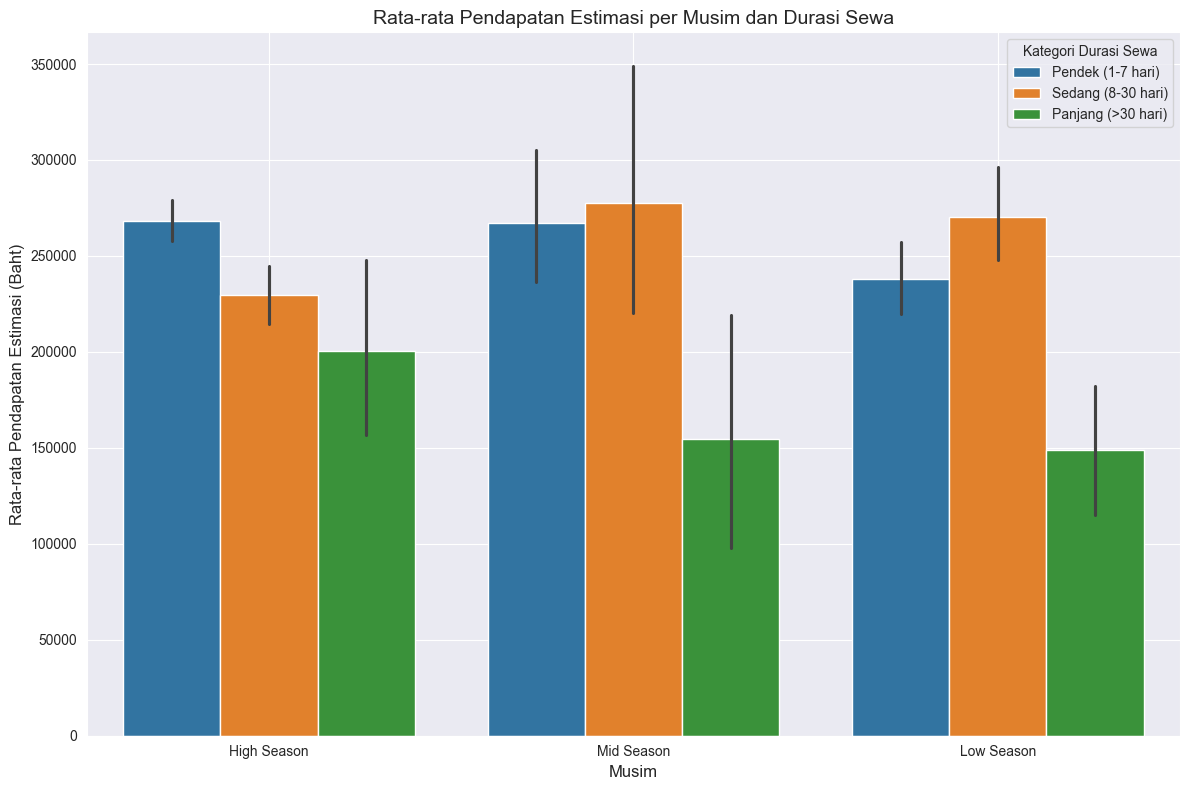

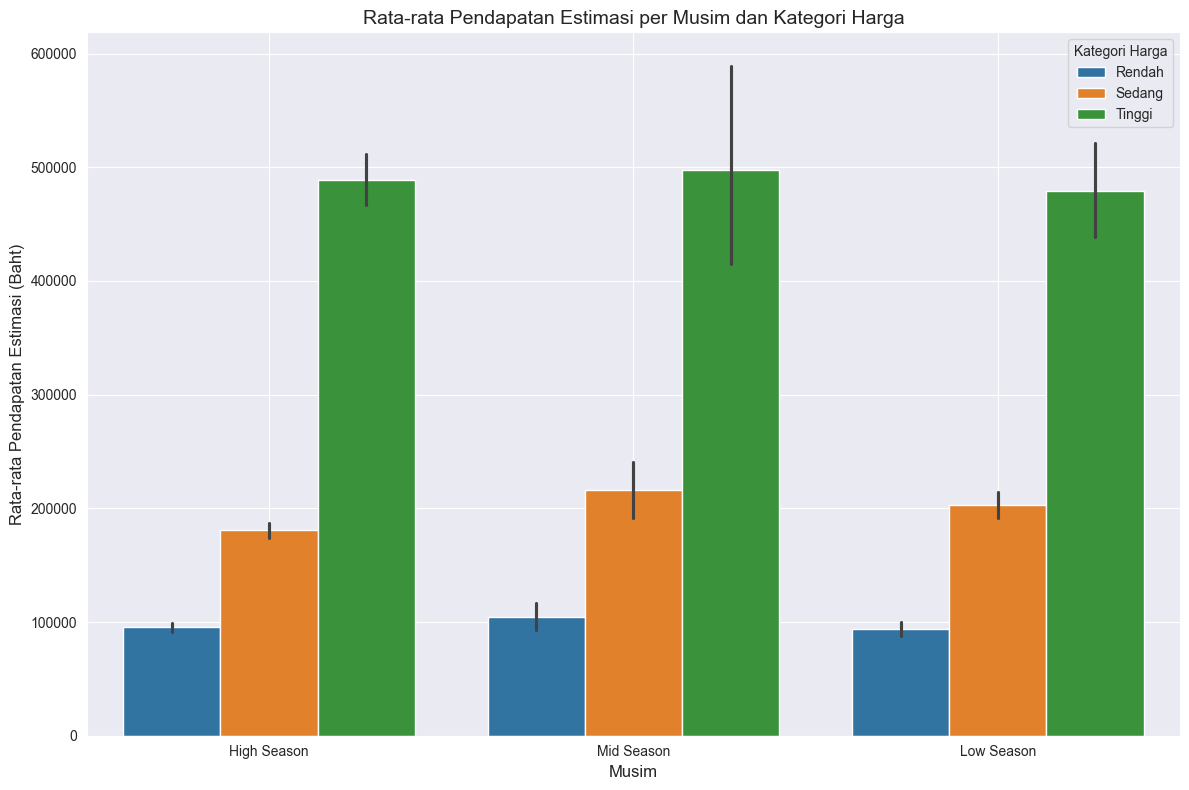

In [81]:
# Bar plot untuk minimum_nights per musim
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='estimated_revenue', hue='minimum_nights_category', data=df_season, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Musim dan Durasi Sewa', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Kategori Durasi Sewa')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot untuk price_category per musim
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='estimated_revenue', hue='price_category', data=df_season, estimator='mean')
plt.title('Rata-rata Pendapatan Estimasi per Musim dan Kategori Harga', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Kategori Harga')
plt.grid(True)
plt.tight_layout()
plt.show()

Rata-rata Pendapatan Estimasi per Musim dan Kategori Harga

Interpretasi: Pada High Season, listing dengan harga tinggi menghasilkan pendapatan rata-rata tertinggi, dua kali lipat dari kategori rendah. 

Interpretasi: Pola serupa terlihat di Mid Season, dengan kategori harga tinggi tetap menghasilkan pendapatan tertinggi. Namun, pendapatan untuk harga rendah dan sedang lebih rendah dibandingkan High Season, mencerminkan permintaan yang lebih moderat.

Interpretasi: Pendapatan rata-rata di Low Season sedikit lebih rendah dibandingkan Mid Season, tetapi kategori harga tinggi tetap unggul. Ini menunjukkan bahwa bahkan di musim sepi, listing dengan harga tinggi masih bisa menghasilkan pendapatan signifikan, mungkin karena menarik segmen pasar premium.

Wawasan:
- Listing dengan harga tinggi secara konsisten menghasilkan pendapatan rata-rata tertinggi di semua musim, dengan puncak pada High Season (~500,000 Baht).
- Host dapat mempertimbangkan untuk menaikkan harga selama High Season, terutama untuk listing premium, karena wisatawan cenderung bersedia membayar lebih.
- Pada Low Season, meskipun permintaan menurun, listing dengan harga tinggi tetap menguntungkan, sehingga strategi penetapan harga tidak perlu terlalu agresif diturunkan.

Rata-rata Pendapatan Estimasi per Musim dan Durasi Sewa

Interpretasi: Pada High Season, sewa jangka pendek menghasilkan pendapatan rata-rata tertinggi, diikuti oleh sewa jangka sedang. Sewa jangka panjang memiliki pendapatan terendah di musim ini, mungkin karena wisatawan lebih memilih tinggal singkat selama periode libur.

Interpretasi: Pendapatan untuk sewa jangka pendek dan sedang hampir sama, menunjukkan keseimbangan permintaan di Mid Season. Sewa jangka panjang tetap memiliki pendapatan terendah, mungkin karena penyewa lebih memilih fleksibilitas.

Interpretasi: Pada Low Season, pendapatan untuk sewa jangka pendek dan sedang turun sedikit dibandingkan musim lainnya, tetapi tetap lebih tinggi daripada sewa jangka panjang. Ini menunjukkan bahwa bahkan di musim sepi, penyewa lebih menyukai durasi sewa yang lebih pendek.

Wawasan:
- Sewa jangka pendek dan sedang secara konsisten menghasilkan pendapatan rata-rata yang lebih tinggi dibandingkan sewa jangka panjang di semua musim.
- High Season dan Mid Season menunjukkan potensi pendapatan tertinggi untuk sewa jangka pendek dan sedang, sementara sewa jangka panjang kurang menguntungkan.
- Host dapat mempertimbangkan untuk memprioritaskan sewa jangka pendek selama High Season untuk memaksimalkan pendapatan, sambil tetap menawarkan fleksibilitas sewa jangka sedang di Mid Season.

Kesimpulan dan Rekomendasi untuk Host:
1. Strategi Harga:
- Listing dengan harga tinggi menghasilkan pendapatan lebih besar di semua musim, terutama selama High Season. Host dapat mempertimbangkan untuk menaikkan harga selama High Season, terutama untuk listing premium.
- Pada Low Season, meskipun pendapatan turun, listing dengan harga tinggi tetap menguntungkan, sehingga host tidak perlu menurunkan harga secara drastis.
2. Strategi Durasi Sewa:
- Sewa jangka pendek dan sedang lebih menguntungkan di semua musim, dengan puncak pada High Season. Host sebaiknya memprioritaskan sewa jangka pendek selama High Season untuk memaksimalkan pendapatan.
- Sewa jangka panjang kurang menguntungkan secara rata-rata, tetapi bisa menjadi pilihan untuk menarik penyewa yang mencari stabilitas, terutama di Mid Season atau Low Season.
3. Optimalisasi Musiman:
- High Season adalah waktu terbaik untuk memaksimalkan pendapatan, baik dari segi harga maupun durasi sewa pendek.
- Pada Mid Season, host dapat menawarkan sewa jangka pendek dan sedang dengan harga kompetitif untuk menarik penyewa.
- Pada Low Season, meskipun permintaan turun, listing dengan harga tinggi dan sewa pendek tetap menghasilkan pendapatan yang layak.

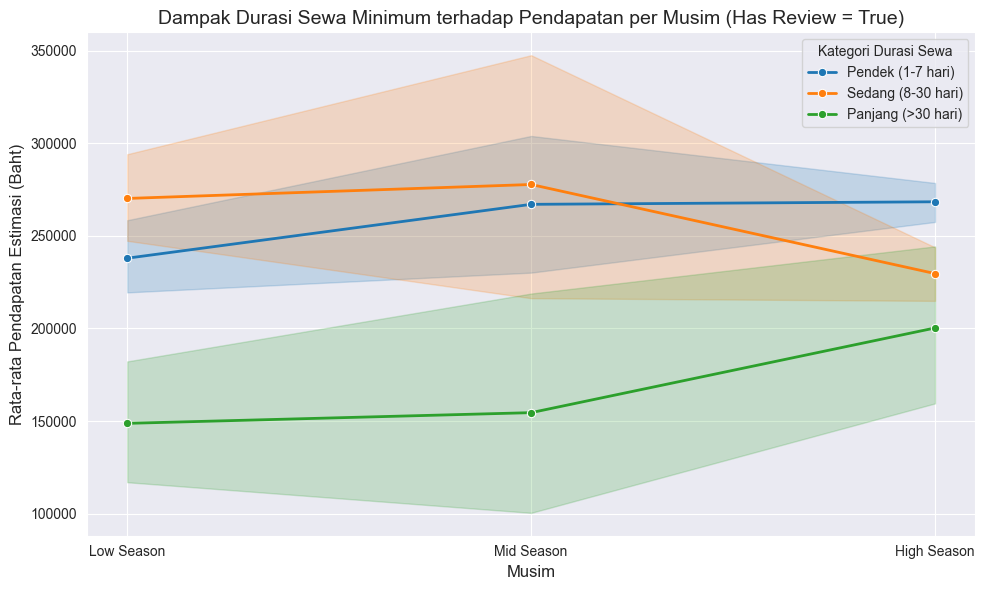

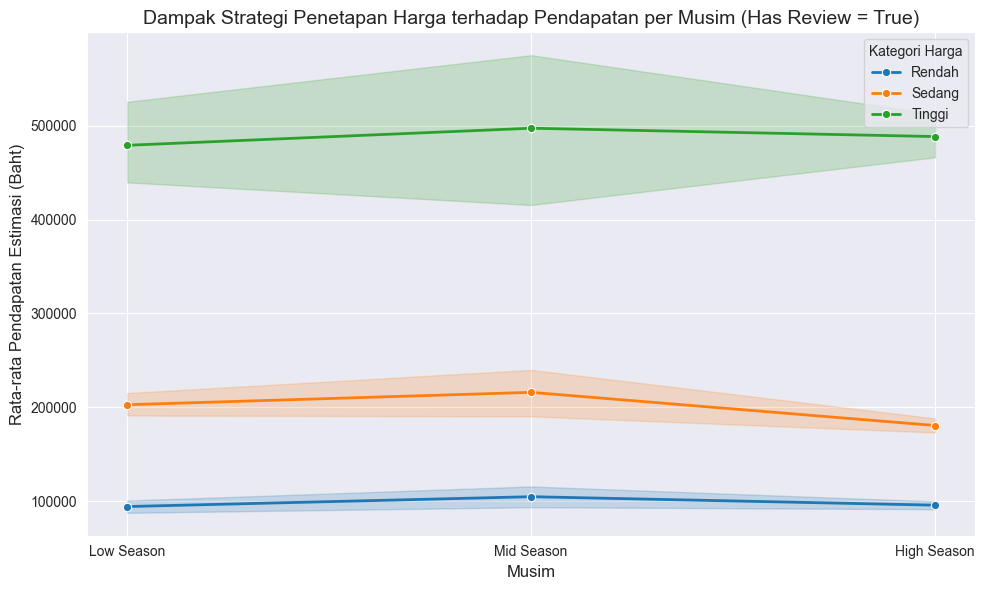

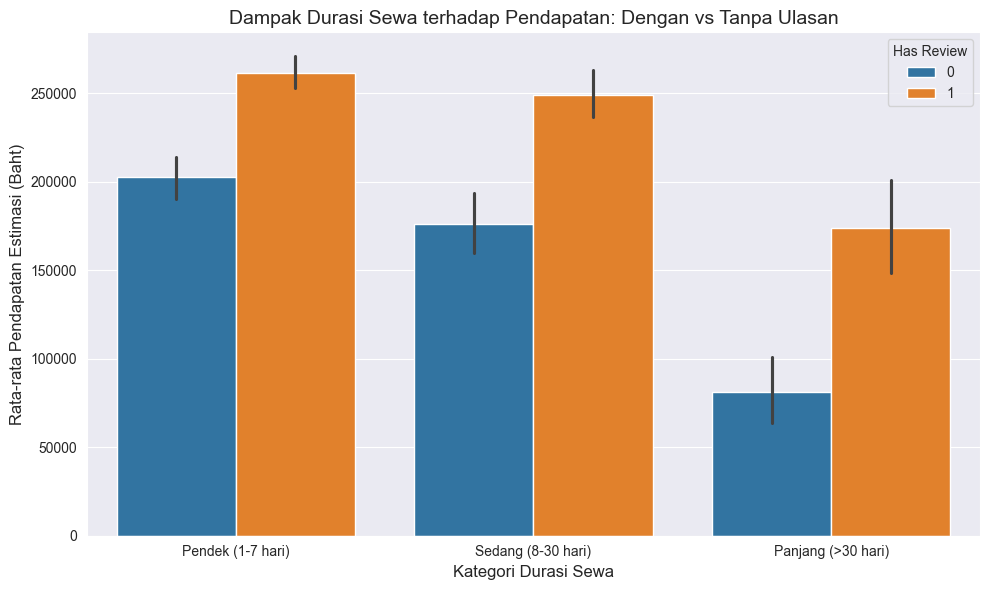

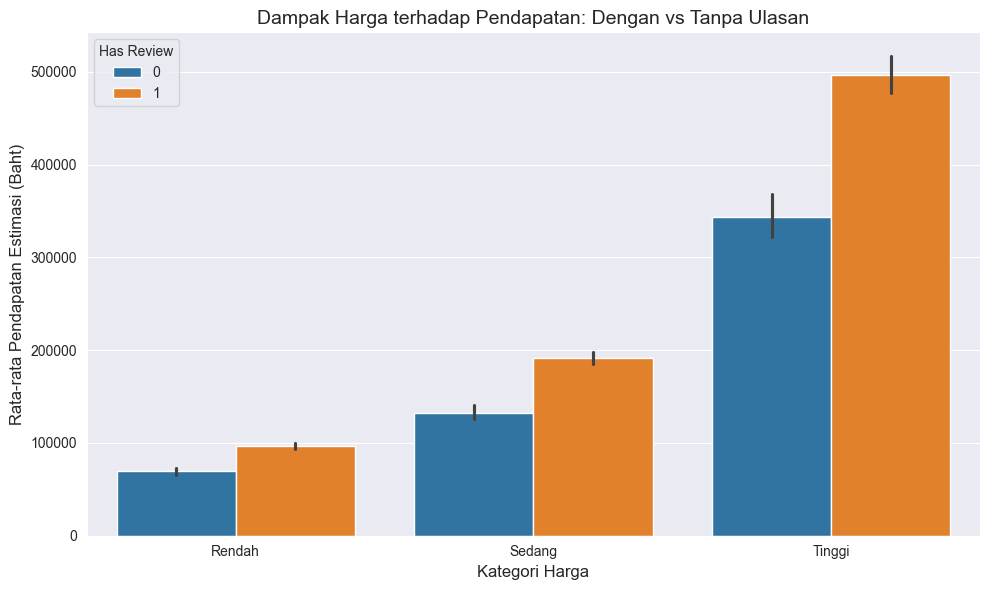

In [82]:
df['season'] = df_cleaned['month'].apply(categorize_season)
df_season = df_cleaned[df_cleaned['season'] != 'Unknown'].copy()  # Hanya has_review = True

# Kategorikan minimum_nights
bins_nights = [0, 7, 30, float('inf')]
labels_nights = ['Pendek (1-7 hari)', 'Sedang (8-30 hari)', 'Panjang (>30 hari)']
df_cleaned['minimum_nights_category'] = pd.cut(df_cleaned['minimum_nights'], bins=bins_nights, labels=labels_nights, right=True)
df_season['minimum_nights_category'] = pd.cut(df_season['minimum_nights'], bins=bins_nights, labels=labels_nights, right=True)

# Kategorikan harga
df_cleaned['price_category'] = pd.qcut(df_cleaned['price'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
df_season['price_category'] = pd.qcut(df_season['price'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Urutkan musim untuk plot
season_order = ['Low Season', 'Mid Season', 'High Season']
df_season['season'] = pd.Categorical(df_season['season'], categories=season_order, ordered=True)

# 1. Lineplot untuk dampak durasi sewa (has_review = True)
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='estimated_revenue', hue='minimum_nights_category', 
             data=df_season[df_season['has_review'] == True], estimator='mean', marker='o', linewidth=2)
plt.title('Dampak Durasi Sewa Minimum terhadap Pendapatan per Musim (Has Review = True)', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Kategori Durasi Sewa', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Lineplot untuk dampak harga (has_review = True)
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='estimated_revenue', hue='price_category', 
             data=df_season[df_season['has_review'] == True], estimator='mean', marker='o', linewidth=2)
plt.title('Dampak Strategi Penetapan Harga terhadap Pendapatan per Musim (Has Review = True)', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Kategori Harga', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Bar plot untuk perbandingan dengan has_review = False
plt.figure(figsize=(10, 6))
sns.barplot(x='minimum_nights_category', y='estimated_revenue', hue='has_review', 
            data=df_cleaned, estimator='mean')
plt.title('Dampak Durasi Sewa terhadap Pendapatan: Dengan vs Tanpa Ulasan', fontsize=14)
plt.xlabel('Kategori Durasi Sewa', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Has Review', loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='price_category', y='estimated_revenue', hue='has_review', 
            data=df_cleaned, estimator='mean')
plt.title('Dampak Harga terhadap Pendapatan: Dengan vs Tanpa Ulasan', fontsize=14)
plt.xlabel('Kategori Harga', fontsize=12)
plt.ylabel('Rata-rata Pendapatan Estimasi (Baht)', fontsize=12)
plt.legend(title='Has Review', loc='upper left')
plt.tight_layout()
plt.show()

Dampak Durasi Sewa terhadap Pendapatan: Dengan vs Tanpa Ulasan

Penjelasan Rinci
1. Pendek (1-7 hari)
- Tanpa Ulasan: Rata-rata pendapatan estimasi sekitar 200,000 Baht.
- Dengan Ulasan: Rata-rata pendapatan estimasi sekitar 250,000 Baht.
- Interpretasi: Listing dengan ulasan menghasilkan pendapatan rata-rata yang lebih tinggi (sekitar 25% lebih besar) dibandingkan listing tanpa ulasan untuk sewa jangka pendek. Ini menunjukkan bahwa ulasan memiliki dampak positif yang signifikan terhadap pendapatan, kemungkinan karena ulasan meningkatkan kepercayaan penyewa.
2. Sedang (8-30 hari)
- Tanpa Ulasan: Rata-rata pendapatan estimasi sekitar 175,000 Baht.
- Dengan Ulasan: Rata-rata pendapatan estimasi sekitar 250,000 Baht.
- Interpretasi: Pola serupa terlihat pada sewa jangka sedang, di mana listing dengan ulasan menghasilkan pendapatan rata-rata yang jauh lebih tinggi (sekitar 43% lebih besar) dibandingkan listing tanpa ulasan. Dampak ulasan bahkan lebih besar pada kategori ini dibandingkan sewa jangka pendek.
3. Panjang (>30 hari)
- Tanpa Ulasan: Rata-rata pendapatan estimasi sekitar 75,000 Baht.
- Dengan Ulasan: Rata-rata pendapatan estimasi sekitar 150,000 Baht.
- Interpretasi: Untuk sewa jangka panjang, listing dengan ulasan menghasilkan pendapatan rata-rata dua kali lipat dibandingkan listing tanpa ulasan (100% lebih besar). Ini menunjukkan bahwa ulasan sangat penting untuk menarik penyewa jangka panjang, yang mungkin lebih berhati-hati dalam memilih tempat menginap.

Analisis dan Wawasan
1. Dampak Ulasan terhadap Pendapatan:
- Secara keseluruhan, listing dengan ulasan (Has Review = 1) secara konsisten menghasilkan pendapatan rata-rata yang lebih tinggi di semua kategori durasi sewa.
- Dampak ulasan paling besar terlihat pada sewa jangka panjang, di mana pendapatan meningkat hingga 100%. Ini bisa jadi karena penyewa jangka panjang lebih mengandalkan ulasan untuk memastikan kualitas dan keandalan listing.
- Pada sewa jangka pendek dan sedang, ulasan juga meningkatkan pendapatan (masing-masing 25% dan 43%), menunjukkan bahwa ulasan adalah faktor penting dalam keputusan penyewa, bahkan untuk masa tinggal yang lebih singkat.
2. Pola Pendapatan Berdasarkan Durasi Sewa:
- Sewa jangka pendek dan sedang menghasilkan pendapatan rata-rata yang lebih tinggi dibandingkan sewa jangka panjang, baik untuk listing dengan maupun tanpa ulasan.
- Listing dengan ulasan pada sewa jangka pendek dan sedang mencapai puncak pendapatan rata-rata (250,000 Baht), sedangkan sewa jangka panjang tanpa ulasan hanya menghasilkan 75,000 Baht, menunjukkan bahwa sewa jangka panjang kurang menguntungkan secara rata-rata.
3. Implikasi untuk Host:
- Pentingnya Ulasan: Host harus berupaya mendapatkan ulasan positif dari tamu, karena ulasan dapat meningkatkan pendapatan secara signifikan. Memberikan pengalaman menginap yang baik, seperti fasilitas lengkap, kebersihan, dan komunikasi yang responsif, dapat mendorong tamu untuk meninggalkan ulasan.
- Strategi Durasi Sewa: Host dapat memprioritaskan sewa jangka pendek dan sedang untuk memaksimalkan pendapatan, terutama jika listing mereka memiliki ulasan. Namun, untuk sewa jangka panjang, ulasan menjadi lebih krusial, jadi host harus memastikan listing mereka memiliki ulasan sebelum menawarkan durasi sewa yang lebih lama.
- Meningkatkan Kepercayaan Penyewa: Ulasan berfungsi sebagai indikator kepercayaan. Host baru yang belum memiliki ulasan mungkin perlu menawarkan harga lebih kompetitif atau insentif (misalnya, diskon untuk tamu pertama) agar mendapat ulasan awal.

Dampak Harga terhadap Pendapatan: Dengan vs Tanpa Ulasan

Penjelasan Rinci
1. Rendah (<100 hari)
- Tanpa Ulasan: Rata-rata pendapatan estimasi sekitar 100,000 Baht.
- Dengan Ulasan: Rata-rata pendapatan estimasi sekitar 150,000 Baht.
- Interpretasi: Untuk listing dengan harga rendah, keberadaan ulasan meningkatkan pendapatan rata-rata sebesar 50% (dari 100,000 Baht menjadi 150,000 Baht). Ini menunjukkan bahwa ulasan memiliki dampak positif yang signifikan, bahkan pada listing dengan harga lebih terjangkau, kemungkinan karena ulasan meningkatkan kepercayaan penyewa terhadap listing yang lebih murah.
2. Sedang (100-300 hari)
- Tanpa Ulasan: Rata-rata pendapatan estimasi sekitar 150,000 Baht.
- Dengan Ulasan: Rata-rata pendapatan estimasi sekitar 200,000 Baht.
- Interpretasi: Pada kategori harga sedang, listing dengan ulasan menghasilkan pendapatan rata-rata yang lebih tinggi (sekitar 33% lebih besar) dibandingkan listing tanpa ulasan. Ulasan tetap memiliki dampak positif, meskipun persentase peningkatannya lebih kecil dibandingkan kategori harga rendah.
3. Tinggi (>300 hari)
- Tanpa Ulasan: Rata-rata pendapatan estimasi sekitar 350,000 Baht.
- Dengan Ulasan: Rata-rata pendapatan estimasi sekitar 500,000 Baht.
- Interpretasi: Untuk listing dengan harga tinggi, ulasan meningkatkan pendapatan rata-rata sebesar 43% (dari 350,000 Baht menjadi 500,000 Baht). Dampak ulasan pada kategori ini sangat besar dalam hal nominal, karena pendapatan dasarnya sudah tinggi, dan ulasan dapat memberikan kepercayaan tambahan kepada penyewa yang membayar lebih mahal.

Analisis dan Wawasan
1. Dampak Ulasan terhadap Pendapatan:
- Secara keseluruhan, listing dengan ulasan (Has Review = 1) secara konsisten menghasilkan pendapatan rata-rata yang lebih tinggi di semua kategori harga.
- Dampak ulasan paling signifikan dalam hal persentase peningkatan terlihat pada kategori harga rendah (50% lebih besar), menunjukkan bahwa ulasan sangat penting untuk listing dengan harga terjangkau, karena penyewa pada segmen ini mungkin lebih sensitif terhadap kepercayaan dan kualitas.
- Dalam hal nominal peningkatan, dampak ulasan terbesar terlihat pada kategori harga tinggi, di mana pendapatan meningkat sebesar 150,000 Baht (dari 350,000 Baht menjadi 500,000 Baht). Ini menunjukkan bahwa ulasan sangat berpengaruh untuk listing premium, yang mungkin menarik penyewa dengan ekspektasi lebih tinggi.
2. Pola Pendapatan Berdasarkan Kategori Harga:
- Listing dengan harga tinggi secara alami menghasilkan pendapatan rata-rata tertinggi, baik dengan maupun tanpa ulasan, karena tarif per malamnya lebih mahal.
- Listing dengan harga rendah memiliki pendapatan rata-rata terendah, tetapi ulasan memberikan dorongan yang signifikan dalam hal persentase, menunjukkan bahwa ulasan dapat menjadi pembeda kompetitif pada segmen harga ini.
- Listing dengan harga sedang berada di tengah-tengah, dengan pendapatan yang cukup baik tetapi tidak sebesar kategori tinggi, meskipun ulasan tetap membantu meningkatkan pendapatan.
3. Implikasi untuk Host:
- Pentingnya Ulasan: Host harus berusaha mendapatkan ulasan positif, terutama untuk listing dengan harga rendah dan tinggi. Pada listing harga rendah, ulasan membantu meningkatkan kepercayaan penyewa, sementara pada listing harga tinggi, ulasan memastikan penyewa merasa bahwa mereka mendapatkan nilai yang sesuai dengan harga premium yang mereka bayar.
- Strategi Harga Rendah: Untuk listing dengan harga rendah, ulasan dapat menjadi faktor kunci untuk bersaing di pasar yang kompetitif. Host dapat menawarkan diskon awal atau insentif untuk mendapatkan ulasan dari tamu pertama.
- Strategi Harga Tinggi: Untuk listing dengan harga tinggi, ulasan sangat penting karena penyewa pada segmen ini cenderung lebih selektif. Host harus memastikan pengalaman tamu berkualitas tinggi (misalnya, fasilitas lengkap, kebersihan, komunikasi responsif) agar mendapatkan ulasan positif.
- Optimalisasi Pendapatan: Host dengan listing harga tinggi dapat memanfaatkan ulasan untuk mendorong pendapatan lebih jauh, karena dampak nominal ulasan pada segmen ini sangat besar.

## Distribusi Pendapatan Berdasarkan Kategori Durasi Sewa

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\1493727304.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_category = df_cleaned.groupby('minimum_nights_category')['estimated_revenue'].sum()


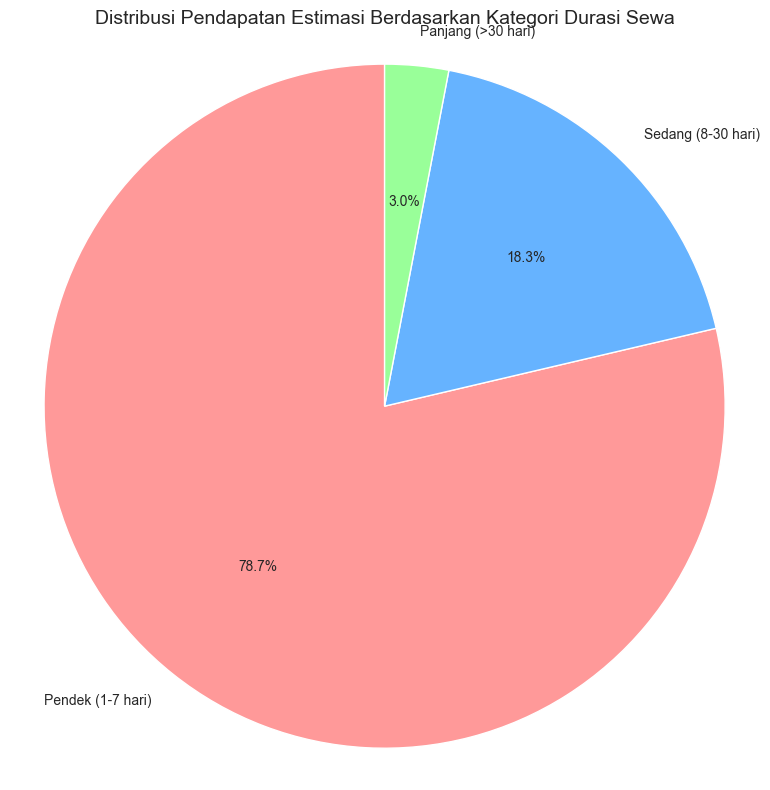


Total Pendapatan per Kategori Durasi Sewa:
minimum_nights_category
Pendek (1-7 hari)     2718461209
Sedang (8-30 hari)     633142451
Panjang (>30 hari)     104492748
Name: estimated_revenue, dtype: int64


In [83]:
# Hitung total pendapatan per kategori durasi sewa
revenue_by_category = df_cleaned.groupby('minimum_nights_category')['estimated_revenue'].sum()

# Pastikan tidak ada kategori kosong
revenue_by_category = revenue_by_category.dropna()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribusi Pendapatan Estimasi Berdasarkan Kategori Durasi Sewa', fontsize=14)
plt.axis('equal')  # Pastikan pie chart bulat
plt.tight_layout()
plt.show()

# Tampilkan total pendapatan per kategori untuk referensi
print("\nTotal Pendapatan per Kategori Durasi Sewa:")
print(revenue_by_category)

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\1438793795.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_category = subset.groupby('minimum_nights_category')['estimated_revenue'].sum().dropna()


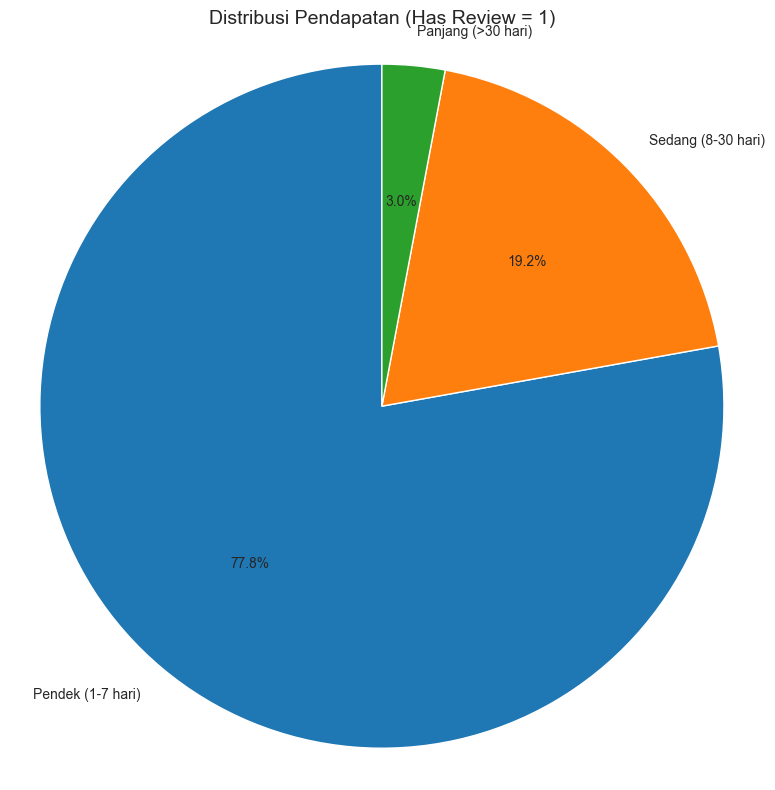

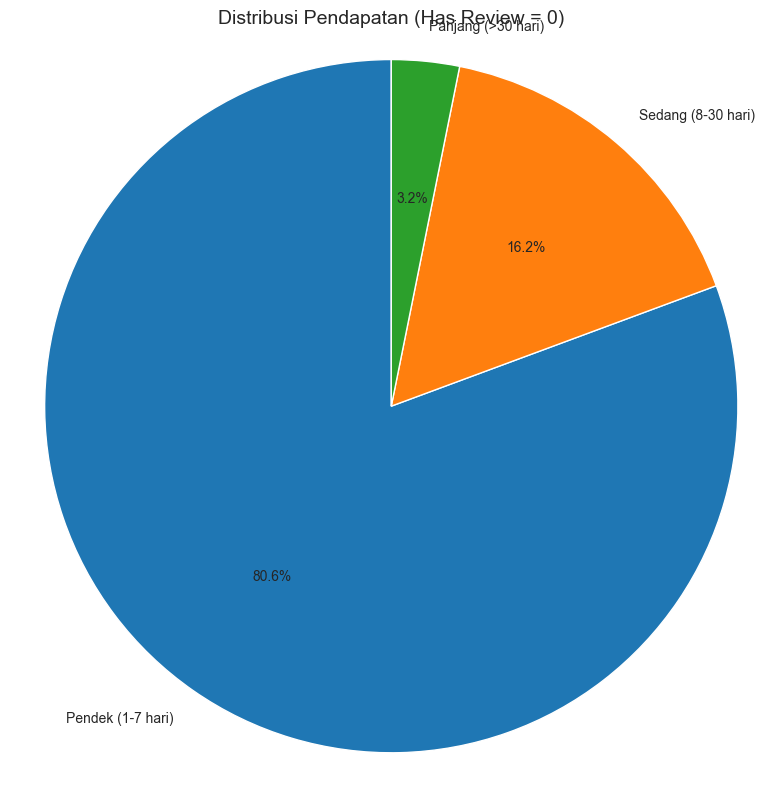

In [84]:
for has_review_val in df_cleaned['has_review'].unique():
    subset = df_cleaned[df_cleaned['has_review'] == has_review_val]
    revenue_by_category = subset.groupby('minimum_nights_category')['estimated_revenue'].sum().dropna()
    plt.figure(figsize=(8, 8))
    plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribusi Pendapatan (Has Review = {has_review_val})', fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Distribusi Pendapatan (Has Review = 1)

Penjelasan Rinci
1. Pendek (1-7 hari) - 77%:
- Kategori ini mendominasi distribusi pendapatan dengan porsi terbesar, yaitu 77%.
- Ini menunjukkan bahwa sebagian besar pendapatan dari listing Airbnb yang memiliki ulasan berasal dari sewa jangka pendek (1-7 hari).
- Interpretasi: Sewa jangka pendek sangat populer di kalangan penyewa yang meninggalkan ulasan, kemungkinan karena banyak wisatawan di Bangkok hanya tinggal untuk waktu singkat (libur singkat, perjalanan bisnis, dll.).
2. Sedang (8-30 hari) - 19.2%:
- Kategori ini menyumbang 19.2% dari total pendapatan listing yang memiliki ulasan.
- Meskipun jauh lebih kecil dibandingkan sewa jangka pendek, sewa jangka sedang tetap memiliki kontribusi yang signifikan.
- Interpretasi: Sewa jangka sedang mungkin menarik bagi penyewa seperti pelancong jangka menengah, pekerja sementara, atau ekspatriat yang tinggal sementara di Bangkok.
3. Panjang (>30 hari) - 3.0%:
- Kategori ini memiliki porsi terkecil, hanya 3.0% dari total pendapatan listing dengan ulasan.
- Interpretasi: Sewa jangka panjang kurang umum di kalangan listing yang memiliki ulasan. Hal ini bisa disebabkan karena penyewa jangka panjang lebih jarang memberikan ulasan, atau listing dengan durasi sewa panjang kurang populer di pasar Airbnb Bangkok.

Analisis dan Wawasan
1. Dominasi Sewa Jangka Pendek:
- Dengan 77% dari pendapatan berasal dari sewa jangka pendek, ini menegaskan bahwa pasar Airbnb di Bangkok sangat didorong oleh wisatawan atau penyewa yang tinggal dalam waktu singkat.
- Hal ini sejalan dengan sifat kota Bangkok sebagai destinasi wisata utama, di mana banyak pengunjung hanya tinggal selama beberapa hari untuk menikmati atraksi wisata, belanja, atau acara khusus.
2. Kontribusi Sewa Jangka Sedang:
- Sewa jangka sedang (19.2%) menunjukkan adanya segmen pasar yang tidak dapat diabaikan, mungkin terdiri dari penyewa yang membutuhkan akomodasi sementara untuk proyek kerja, libur panjang, atau relokasi sementara.
- Meskipun porsinya lebih kecil, ini tetap menunjukkan potensi untuk host yang menawarkan fleksibilitas sewa jangka menengah.
3. Minimnya Sewa Jangka Panjang:
- Hanya 3% dari pendapatan berasal dari sewa jangka panjang, yang menunjukkan bahwa segmen ini kurang populer di kalangan listing dengan ulasan.
- Ini bisa disebabkan oleh beberapa faktor: (1) penyewa jangka panjang cenderung memilih kontrak sewa langsung di luar platform Airbnb, (2) penyewa jangka panjang mungkin lebih jarang memberikan ulasan, atau (3) listing jangka panjang kurang kompetitif dibandingkan opsi sewa tradisional.
4. Hubungan dengan Ulasan:
- Grafik ini hanya mencakup listing yang memiliki ulasan (Has Review = 1). Dominasi sewa jangka pendek dalam distribusi pendapatan menunjukkan bahwa penyewa jangka pendek lebih cenderung meninggalkan ulasan dibandingkan penyewa jangka panjang.
- Hal ini juga sejalan dengan temuan sebelumnya (grafik "Dampak Durasi Sewa terhadap Pendapatan: Dengan vs Tanpa Ulasan"), di mana ulasan meningkatkan pendapatan secara signifikan, terutama untuk sewa jangka pendek.

Implikasi untuk Host
1. Fokus pada Sewa Jangka Pendek: Mengingat 77% pendapatan berasal dari sewa jangka pendek, host sebaiknya mengoptimalkan listing mereka untuk durasi sewa ini. Ini bisa dilakukan dengan menawarkan fasilitas yang menarik bagi wisatawan (misalnya, Wi-Fi cepat, panduan wisata lokal, lokasi strategis) dan menetapkan harga kompetitif.
2. Dorong Ulasan: Karena grafik ini hanya mencakup listing dengan ulasan, penting bagi host untuk mendorong tamu meninggalkan ulasan setelah menginap. Host dapat memberikan pengalaman menginap yang baik dan meminta ulasan secara sopan melalui pesan setelah check-out.
3. Eksplorasi Sewa Jangka Sedang: Meskipun porsinya lebih kecil, sewa jangka sedang menyumbang 19.2% dari pendapatan. Host dapat mempertimbangkan untuk menawarkan diskon untuk sewa jangka menengah (misalnya, diskon mingguan) untuk menarik segmen ini, terutama di neighbourhood yang populer untuk pekerja sementara atau ekspatriat.
4. Pertimbangan untuk Sewa Jangka Panjang: Sewa jangka panjang hanya menyumbang 3% dari pendapatan listing dengan ulasan. Host yang ingin menargetkan segmen ini perlu strategi khusus, seperti menawarkan fasilitas tambahan (misalnya, dapur lengkap, mesin cuci) dan memastikan listing mereka kompetitif dibandingkan opsi sewa tradisional. Selain itu, host perlu mendorong penyewa jangka panjang untuk meninggalkan ulasan.

## Distribusi Pendapatan Berdasarkan Kategori Harga

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\3628425186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_price = df_cleaned.groupby('price_category')['estimated_revenue'].sum()


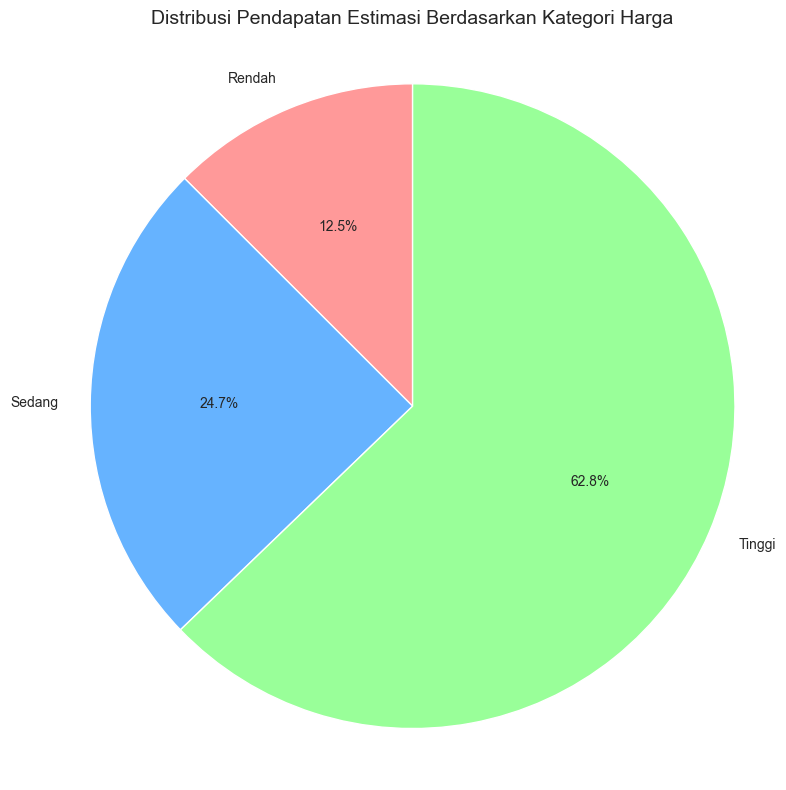


Total Pendapatan per Kategori Harga:
price_category
Rendah     432325515
Sedang     853463316
Tinggi    2170307577
Name: estimated_revenue, dtype: int64


In [85]:
# Hitung total pendapatan per kategori harga
revenue_by_price = df_cleaned.groupby('price_category')['estimated_revenue'].sum()

# Pastikan tidak ada kategori kosong
revenue_by_price = revenue_by_price.dropna()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_price, labels=revenue_by_price.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribusi Pendapatan Estimasi Berdasarkan Kategori Harga', fontsize=14)
plt.axis('equal')  # Pastikan pie chart bulat
plt.tight_layout()
plt.show()

# Tampilkan total pendapatan per kategori untuk referensi
print("\nTotal Pendapatan per Kategori Harga:")
print(revenue_by_price)

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\120993007.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_price = subset.groupby('price_category')['estimated_revenue'].sum().dropna()


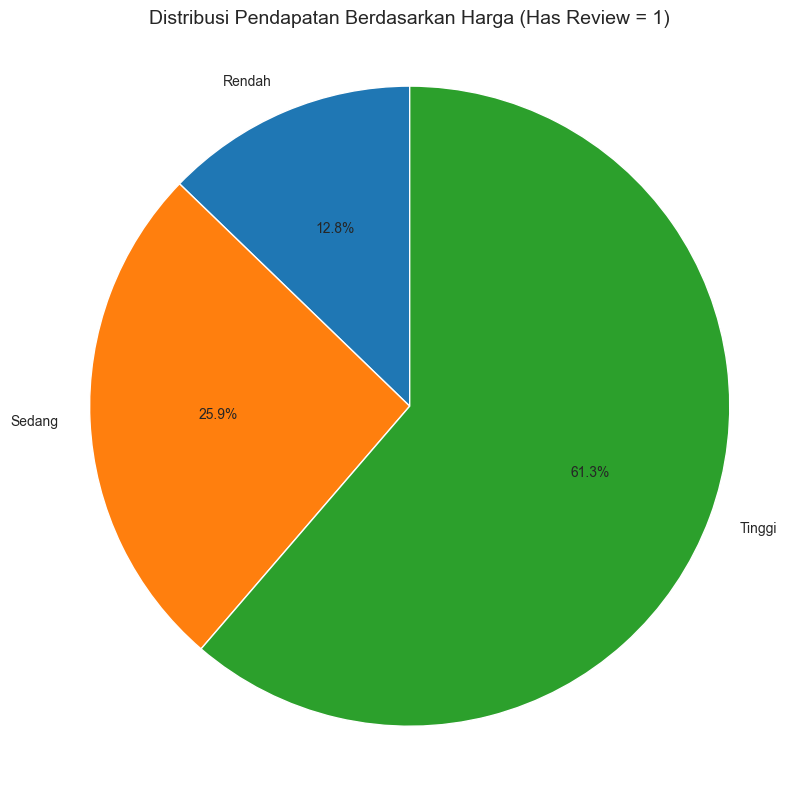

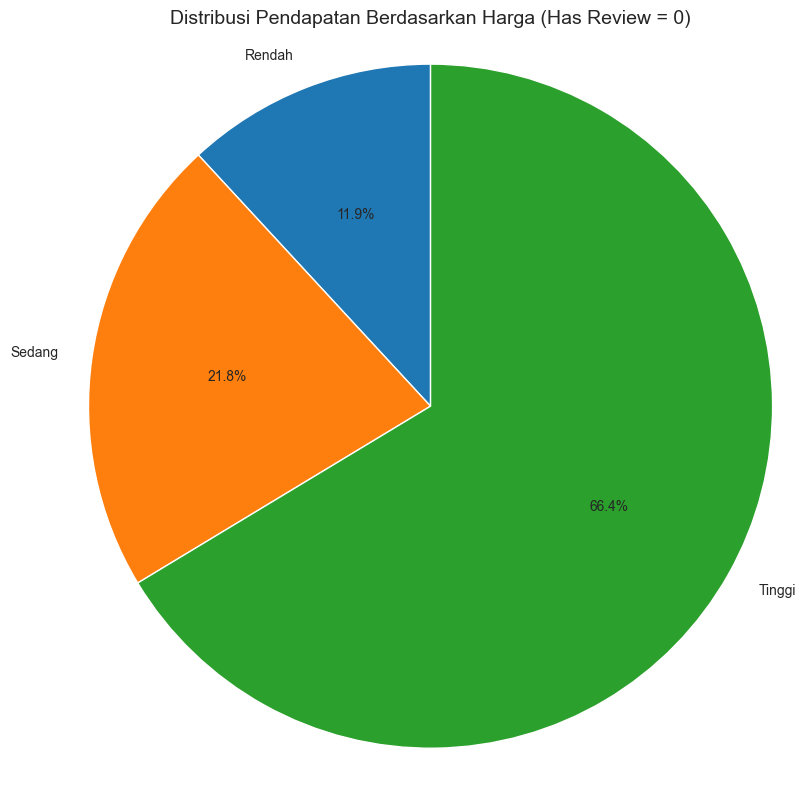

In [86]:
for has_review_val in df_cleaned['has_review'].unique():
    subset = df_cleaned[df_cleaned['has_review'] == has_review_val]
    revenue_by_price = subset.groupby('price_category')['estimated_revenue'].sum().dropna()
    plt.figure(figsize=(8, 8))
    plt.pie(revenue_by_price, labels=revenue_by_price.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribusi Pendapatan Berdasarkan Harga (Has Review = {has_review_val})', fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Distribusi Pendapatan Berdasarkan Harga (Has Review = 1)

Penjelasan Rinci
1. Tinggi (>300 hari) - 61.3%:
- Kategori ini mendominasi distribusi pendapatan dengan porsi terbesar, yaitu 61.3%.
- Ini menunjukkan bahwa lebih dari setengah pendapatan dari listing Airbnb yang memiliki ulasan berasal dari listing dengan harga tinggi (di atas 300 Baht per hari).
- Interpretasi: Listing dengan harga tinggi sangat menguntungkan di kalangan penyewa yang meninggalkan ulasan, kemungkinan karena listing ini menarik penyewa premium yang bersedia membayar lebih untuk fasilitas atau lokasi yang lebih baik, dan mereka cenderung meninggalkan ulasan setelah pengalaman menginap yang memuaskan.
2. Sedang (100-300 hari) - 25.9%:
- Kategori ini menyumbang 25.9% dari total pendapatan listing yang memiliki ulasan.
- Meskipun porsinya lebih kecil dibandingkan kategori tinggi, sewa dengan harga sedang tetap memiliki kontribusi yang signifikan.
- Interpretasi: Listing dengan harga sedang menarik segmen pasar yang lebih luas, seperti wisatawan dengan anggaran menengah atau penyewa jangka menengah, yang juga cenderung meninggalkan ulasan setelah menginap.
3. Rendah (<100 hari) - 12.8%:
- Kategori ini memiliki porsi terkecil, hanya 12.8% dari total pendapatan listing dengan ulasan.
- Interpretasi: Listing dengan harga rendah menghasilkan pendapatan yang lebih kecil dibandingkan kategori lainnya, meskipun mereka tetap memiliki ulasan. Ini bisa disebabkan oleh dua faktor: (1) tarif per malam yang lebih rendah sehingga total pendapatan lebih kecil, atau (2) penyewa pada segmen harga rendah mungkin lebih jarang memesan dibandingkan segmen harga yang lebih tinggi.

Analisis dan Wawasan
1. Dominasi Listing Harga Tinggi:
- Dengan 61.3% dari pendapatan berasal dari listing harga tinggi, ini menunjukkan bahwa pasar Airbnb di Bangkok, terutama untuk listing yang memiliki ulasan, didominasi oleh segmen premium.
- Hal ini sejalan dengan temuan sebelumnya (grafik "Dampak Harga terhadap Pendapatan: Dengan vs Tanpa Ulasan"), di mana listing dengan harga tinggi menghasilkan pendapatan rata-rata tertinggi (500,000 Baht dengan ulasan). Penyewa pada segmen ini kemungkinan mencari kualitas lebih tinggi (misalnya, lokasi strategis, fasilitas lengkap) dan lebih cenderung meninggalkan ulasan setelah pengalaman menginap.
2. Kontribusi Listing Harga Sedang:
- Listing dengan harga sedang menyumbang 25.9% dari pendapatan, menunjukkan adanya segmen pasar yang signifikan di tengah-tengah.
- Segmen ini mungkin terdiri dari wisatawan dengan anggaran menengah atau penyewa yang mencari keseimbangan antara harga dan kualitas, dan mereka juga cukup aktif memberikan ulasan.
3. Minimnya Kontribusi Listing Harga Rendah:
- Hanya 12.8% pendapatan berasal dari listing harga rendah, yang menunjukkan bahwa segmen ini kurang berkontribusi pada pendapatan keseluruhan listing dengan ulasan.
- Meskipun demikian, porsi ini tetap menunjukkan adanya permintaan untuk listing harga rendah, terutama dari penyewa yang lebih hemat, seperti backpacker atau pelancong dengan anggaran terbatas.
4. Hubungan dengan Ulasan:
- Grafik ini hanya mencakup listing yang memiliki ulasan (Has Review = 1). Dominasi listing harga tinggi dalam distribusi pendapatan menunjukkan bahwa penyewa pada segmen ini lebih cenderung meninggalkan ulasan, mungkin karena mereka memiliki ekspektasi yang tinggi dan merasa perlu memberikan masukan setelah pengalaman menginap.
- Sebaliknya, listing harga rendah mungkin lebih jarang mendapatkan ulasan, atau penyewa pada segmen ini lebih fokus pada penghematan dan kurang aktif memberikan ulasan.

Implikasi untuk Host
1. Fokus pada Listing Harga Tinggi:
- Mengingat 61.3% pendapatan berasal dari listing harga tinggi, host disarankan untuk mengoptimalkan listing mereka pada segmen ini. Ini bisa dilakukan dengan meningkatkan kualitas listing (misalnya, menawarkan fasilitas premium, desain interior menarik, lokasi strategis) dan menetapkan harga yang sesuai untuk menarik penyewa premium.
- Selain itu, host harus memastikan pengalaman tamu yang baik agar mendapatkan ulasan positif, karena penyewa pada segmen ini cenderung aktif memberikan ulasan.
2. Eksplorasi Listing Harga Sedang:
- Listing harga sedang menyumbang 25.9% dari pendapatan, menunjukkan potensi untuk menarik segmen pasar menengah. Host dapat menawarkan listing dengan harga sedang yang tetap memberikan nilai tambah, seperti fasilitas dasar yang lengkap (Wi-Fi, AC, kebersihan), untuk menarik penyewa pada segmen ini.
- Host juga dapat memberikan diskon mingguan untuk sewa jangka menengah guna meningkatkan daya tarik pada segmen ini.
3. Pertimbangan untuk Listing Harga Rendah:
- Meskipun hanya menyumbang 12.8% pendapatan, listing harga rendah tetap memiliki pasar, terutama untuk penyewa dengan anggaran terbatas. Host dapat menggunakan strategi ini untuk menarik tamu pertama dan mendapatkan ulasan awal, yang kemudian dapat membantu meningkatkan kepercayaan untuk menaikkan harga di masa depan.
- Untuk listing harga rendah, host harus tetap memastikan kebersihan dan kenyamanan dasar agar penyewa merasa puas dan bersedia meninggalkan ulasan positif.
4. Dorong Ulasan:
- Karena grafik ini hanya mencakup listing dengan ulasan, penting bagi host untuk mendorong tamu meninggalkan ulasan, terutama pada listing harga tinggi dan sedang yang menyumbang porsi besar pendapatan. Host dapat memberikan pengalaman menginap yang baik dan meminta ulasan secara sopan melalui pesan setelah check-out.

## Batas Map Bangkok untuk Harga dan Kategori Harga

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Membuat peta dasar yang berpusat di Bangkok
bangkok_center = [13.7563, 100.5018]  # Koordinat pusat Bangkok
bangkok_map = folium.Map(location=bangkok_center, zoom_start=12)

# Menambahkan MarkerCluster untuk mengelompokkan marker
marker_cluster = MarkerCluster().add_to(bangkok_map)

# Menentukan warna berdasarkan price_category
def get_color(price_category):
    if price_category == 'Tinggi':
        return 'red'
    elif price_category == 'Sedang':
        return 'blue'
    else:
        return 'green'

# Menambahkan marker untuk setiap listing
for idx, row in df_cleaned.iterrows():
    popup_text = f"""
    <b>ID:</b> {row['id']}<br>
    <b>Neighbourhood:</b> {row['neighbourhood']}<br>
    <b>Room Type:</b> {row['room_type']}<br>
    <b>Price:</b> {row['price']} THB<br>
    <b>Price Category:</b> {row['price_category']}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=get_color(row['price_category']), icon='home')
    ).add_to(marker_cluster)

# Menampilkan peta
bangkok_map

Hasil folium tidak saya tampilkan supaya bisa dipush ke github, karena hasil mapnya membuat ukuran file membesar

In [88]:
numerik.corr(method='spearman')

host_id  latitude  longitude     price  \
host_id                         1.000000  0.071296   0.013164  0.025219   
latitude                        0.071296  1.000000  -0.061282 -0.047724   
longitude                       0.013164 -0.061282   1.000000 -0.069085   
price                           0.025219 -0.047724  -0.069085  1.000000   
minimum_nights                 -0.120579 -0.096306   0.099712 -0.102200   
number_of_reviews              -0.264099 -0.048682  -0.051086 -0.020659   
reviews_per_month              -0.134841 -0.053585  -0.046139  0.017221   
calculated_host_listings_count  0.027658 -0.019436  -0.112823  0.084520   
availability_365                0.010728  0.016674  -0.018779 -0.000549   
number_of_reviews_ltm          -0.064100 -0.081968  -0.034402  0.043726   
has_review                     -0.184322 -0.048526  -0.038178 -0.043389   

                                minimum_nights  number_of_reviews  \
host_id                              -0.120579          -0.264099   
latitude                             -0.096306          -0.048682   
longitude                             0.099712          -0.051086   
price                                -0.102200          -0.020659   
minimum_nights                        1.000000           0.036323   
number_of_reviews                     0.036323           1.000000   
reviews_per_month                     0.019227           0.892007   
calculated_host_listings_count       -0.127058           0.221142   
availability_365                     -0.124878          -0.264044   
number_of_reviews_ltm                 0.012733           0.705412   
has_review                            0.051953           0.855807   

                                reviews_per_month  \
host_id                                 -0.134841   
latitude                                -0.053585   
longitude                               -0.046139   
price                                    0.017221   
minimum_nights                           0.019227   
number_of_reviews                        0.892007   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.284863   
availability_365                        -0.251946   
number_of_reviews_ltm                    0.813352   
has_review                               0.855084   

                                calculated_host_listings_count  \
host_id                                               0.027658   
latitude                                             -0.019436   
longitude                                            -0.112823   
price                                                 0.084520   
minimum_nights                                       -0.127058   
number_of_reviews                                     0.221142   
reviews_per_month                                     0.284863   
calculated_host_listings_count                        1.000000   
availability_365                                     -0.054202   
number_of_reviews_ltm                                 0.276462   
has_review                                            0.220192   

                                availability_365  number_of_reviews_ltm  \
host_id                                 0.010728              -0.064100   
latitude                                0.016674              -0.081968   
longitude                              -0.018779              -0.034402   
price                                  -0.000549               0.043726   
minimum_nights                         -0.124878               0.012733   
number_of_reviews                      -0.264044               0.705412   
reviews_per_month                      -0.251946               0.813352   
calculated_host_listings_count         -0.054202               0.276462   
availability_365                        1.000000              -0.212874   
number_of_reviews_ltm                  -0.212874               1.000000   
has_review                             -0.238408

<Axes: >

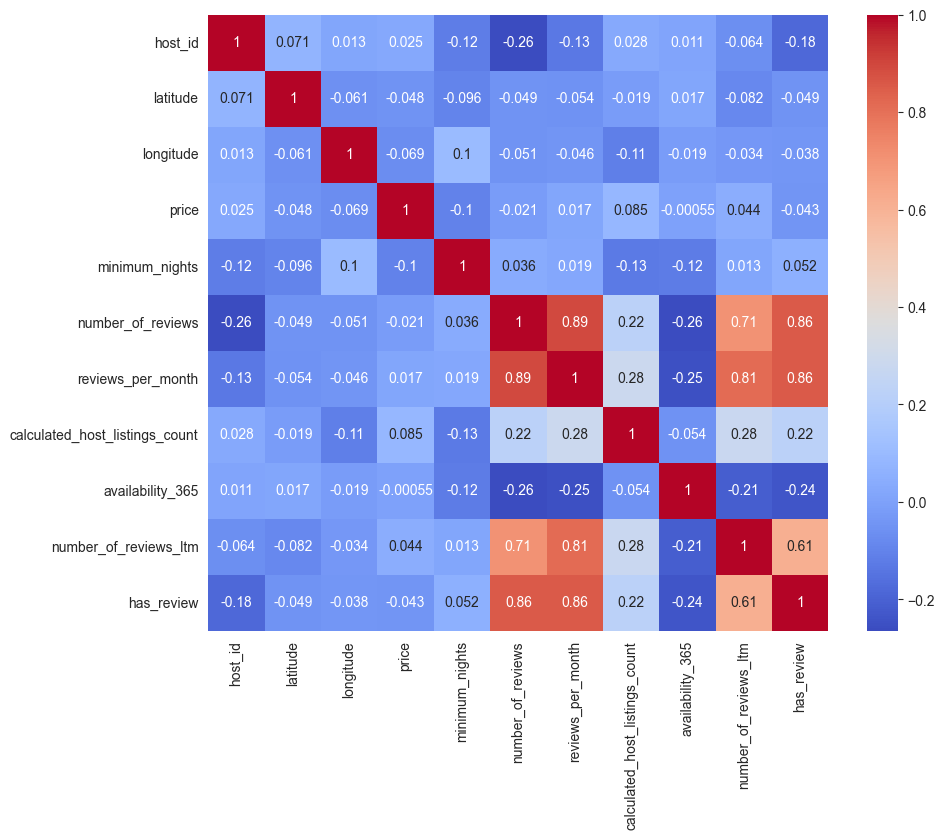

In [89]:
figure = plt.figure(figsize=(10, 8))

sns.heatmap(numerik.corr(method='spearman'), annot=True, cmap='coolwarm')

In [90]:
df_cleaned.to_csv('Airbnb Listings Bangkok Cleaned.csv', index=False)

df_cleaned.to_excel('Airbnb Listings Bangkok Cleaned.xlsx', index=False)


# Permasalahan Estimated Revenue 0

In [91]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]

id    host_id  neighbourhood   latitude   longitude  \
2                   28745     123784      Bang Kapi  13.752320  100.624020   
4                  941865     610315      Bang Kapi  13.768720  100.633380   
5                 1704776    2129668  Bang Kho laen  13.697570  100.528800   
6                   48736     222005     Rat Burana  13.685560  100.495350   
7                 1738669    7045870     Chatu Chak  13.829250  100.567370   
...                   ...        ...            ...        ...         ...   
15847  790460406360583597  340188343        Vadhana  13.740188  100.556291   
15850  790474503157243541  491526222    Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222    Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222    Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222    Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2         Private room    800              60                  0         NaT   
4         Private room   1905               1                  0         NaT   
5      Entire home/apt   1000             250                 19  2017-08-03   
6         Private room   1558               3                  1  2014-02-03   
7      Entire home/apt   1461               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15847     Private room   2700               1                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       ...  calculated_host_listings_count  availability_365  \
2      ...                               1               365   
4      ...                               3               365   
5      ...                              41               365   
6      ...                               1               365   
7      ...                               1               365   
...    ...                             ...               ...   
15847  ...                              14               365   
15850  ...                              14               365   
15851  ...                              14               365   
15852  ...                              14               365   
15853  ...                              14               365   

       number_of_reviews_ltm  has_review  estimated_revenue  \
2                          0           0                  0   
4                          0           0                  0   
5                          0           1                  0   
6                          0           1                  0   
7                          0           0                  0   
...                      ...         ...                ...   
15847                      0           0                  0   
15850                      0           0                  0   
15851                      0           0                  0   
15852                      0           0                  0   
15853                      0           0                  0   

       minimum_nights_category price_category availability_category month  \
2           Panjang (>30 hari)         Rendah    Tinggi (>300 hari)   NaN   
4            Pendek (1-7 hari)         Tinggi    Tinggi (>300 hari)   NaN   
5           Panjang (>30 hari)         Rendah    Tinggi (>300 hari)   8.0   
6            Pendek (1-7 hari)         Sedang    Tinggi (>300 hari)   2.0   
7            Pendek (1-7 hari)         Sedang    Tinggi (>300 hari)   NaN   
...                        ...            ...                   ...   ...   
15847        Pendek (1-7 hari)         Tinggi    Tinggi (>30

Analisis Umum
- Konteks Geografis: Lingkungan seperti Bang Kapi, Ratchathewi, dan Vadhana adalah area di Bangkok, Thailand. Dataset ini kemungkinan besar mencerminkan pasar sewa jangka pendek di kota ini.
- Karakteristik Listing:
  - Sebagian besar listing memiliki availability_365 = 365, menunjukkan ketersediaan tinggi. Ini bisa berarti pasar yang kompetitif atau banyak listing baru yang belum dipesan.
  - Banyak properti memiliki number_of_reviews = 0 dan has_review = 0, menunjukkan bahwa banyak listing belum menerima pemesanan atau ulasan.
  - Harga bervariasi dari 800 baht (murah, untuk kamar pribadi) hingga 2700 baht (lebih mahal, mungkin di area premium seperti Vadhana).
  - minimum_nights sangat bervariasi (1 hingga 250), mencerminkan strategi berbeda: beberapa menargetkan wisatawan jangka pendek, lainnya penyewa jangka panjang.
- Estimated Revenue: Nilai 0 pada semua baris yang ditampilkan menimbulkan pertanyaan. Dalam dataset sebelumnya, ada nilai non-nol, jadi mungkin data ini adalah subset listing yang belum menghasilkan pendapatan, atau ada masalah perhitungan.
- Host Behavior: Host dengan banyak listing (misalnya, 41 atau 14) mungkin adalah pengelola profesional, sedangkan host dengan satu listing mungkin individu biasa.

Potensi Masalah
- Estimated Revenue Bernilai 0:
  - Banyak listing memiliki pendapatan 0, yang tidak konsisten dengan ketersediaan tinggi (365 hari). Ini bisa karena:
     - Listing baru yang belum dipesan.
     - Tidak ada data pemesanan yang diintegrasikan ke dalam perhitungan.
     - Kesalahan dalam dataset.
- Harga Tinggi:
  - Harga seperti 2700 atau 1905 baht per malam untuk kamar pribadi tampak tinggi untuk pasar Bangkok (di mana harga rata-rata Airbnb untuk kamar pribadi biasanya lebih rendah). Perlu verifikasi apakah ini wajar untuk area seperti Vadhana atau ada anomali.
- Ulasan Nol:
  - Banyak listing tanpa ulasan (number_of_reviews = 0, reviews_per_month = 0.00) menunjukkan bahwa properti ini mungkin tidak aktif atau baru. Ini perlu analisis lebih lanjut untuk memahami apakah pasar lesu atau dataset mencakup banyak listing non-aktif.
- Last Review Lama:
  - Beberapa tanggal ulasan terakhir sangat lama (misalnya, 2014-02-03), menunjukkan bahwa properti mungkin sudah tidak aktif meskipun masih terdaftar dengan availability_365 = 365.

In [92]:
# Memfilter listing dengan syarat minimum_nights > 0 tapi estimated_revenue = 0
df_nol_revenue = df_cleaned[
    (df_cleaned['minimum_nights'] > 0) & 
    (df_cleaned['estimated_revenue'] == 0)
]

# Melihat ringkasan statistik
statistik = df_nol_revenue[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month']].describe()

# Cek proporsi listing yang tidak pernah mendapat review
tanpa_review = (df_nol_revenue['number_of_reviews'] == 0).mean()

# Cek distribusi room_type
room_type_count = df_nol_revenue['room_type'].value_counts()

# Cek distribusi distrik
distrik_terbanyak = df_nol_revenue['neighbourhood'].value_counts().head(10)

(statistik, tanpa_review, room_type_count, distrik_terbanyak)


(              price  minimum_nights  availability_365  number_of_reviews  \
 count   2214.000000     2214.000000       2214.000000        2214.000000   
 mean    1982.020777       24.714544        364.835140           3.060524   
 std     1849.149089       71.389260          7.757183          14.080812   
 min        0.000000        1.000000          0.000000           0.000000   
 25%      850.000000        1.000000        365.000000           0.000000   
 50%     1382.500000        1.000000        365.000000           0.000000   
 75%     2417.000000        3.000000        365.000000           1.000000   
 max    10000.000000      365.000000        365.000000         228.000000   
 
        reviews_per_month  
 count        2214.000000  
 mean            0.081671  
 std             0.328709  
 min             0.000000  
 25%             0.000000  
 50%             0.000000  
 75%             0.020000  
 max             8.140000  ,
 np.float64(0.7095754290876242),
 room_type
 Private

Ringkasan Data
1. Statistik Deskriptif:
 - price:
     - Rata-rata: 1.982 baht (kemungkinan per malam).
     - Standar deviasi: 1.849 baht (variansi besar, menunjukkan harga sangat bervariasi).
     - Minimum: 0 baht (mencurigakan, mungkin kesalahan data).
     - Median: 1.382,5 baht.
     - Maksimum: 10.000 baht (hanya 0,45% listing di atas 8.000 baht, jadi ini outlier).
 - minimum_nights:
     - Rata-rata: 24,71 malam (cukup tinggi untuk pasar sewa jangka pendek).
     - Standar deviasi: 71,39 (variansi sangat besar, ada listing dengan nilai ekstrem).
     - Median: 1 malam (sebagian besar listing fleksibel, tapi ada outlier besar).
     - Maksimum: 365 malam (sangat membatasi, mungkin untuk sewa tahunan).
 - availability_365:
     - Rata-rata: 364,84 hari (hampir semua listing tersedia sepanjang tahun).
     - Median: 365 hari (konfirmasi bahwa sebagian besar listing "terbuka").
     - Minimum: 0 hari (beberapa listing tidak tersedia sama sekali).
 - number_of_reviews:
     - Rata-rata: 3,06 ulasan.
     - Median: 0 ulasan (sebagian besar listing tidak memiliki ulasan).
     - Maksimum: 228 ulasan (beberapa listing sangat populer).
 - reviews_per_month:
     - Rata-rata: 0,08 ulasan per bulan (sangat rendah).
     - Median: 0 (konfirmasi bahwa banyak listing tidak aktif).

2. Korelasi:
 - Korelasi antara price dan minimum_nights: 0,71.
 - Ini menunjukkan hubungan positif yang cukup kuat: listing dengan harga lebih tinggi cenderung memiliki minimum_nights lebih tinggi. Misalnya, properti mahal mungkin menargetkan penyewa jangka panjang.

3. Distribusi room_type:
 - Private room: 1.303 (58,9%).
 - Entire home/apt: 660 (29,8%).
 - Shared room: 148 (6,7%).
 - Hotel room: 103 (4,7%).
 - Sebagian besar adalah kamar pribadi, yang biasanya lebih murah dan fleksibel, tetapi bisa jadi kurang menarik jika minimum_nights tinggi.

4. Distribusi neighbourhood (10 teratas):
 - Vadhana: 242 listing.
 - Khlong Toei: 164.
 - Ratchathewi: 137.
 - Huai Khwang: 128.
 - Chatu Chak: 99, dst.
 - Area seperti Vadhana dan Ratchathewi adalah pusat kota Bangkok yang populer, sementara beberapa lingkungan lain mungkin kurang menarik bagi wisatawan.

In [94]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['neighbourhood'].value_counts()

neighbourhood
Vadhana                 242
Khlong Toei             164
Ratchathewi             137
Huai Khwang             128
Chatu Chak               99
Phra Nakhon              93
Suanluang                91
Bang Rak                 87
Din Daeng                79
Phra Khanong             77
Sathon                   69
Khlong San               67
Bang Kapi                65
Phaya Thai               56
Bang Na                  56
Pra Wet                  46
Parthum Wan              45
Phasi Charoen            42
Yan na wa                39
Lak Si                   38
Bangkok Noi              37
Lat Krabang              36
Bang Khen                35
Bang Phlat               31
Bang Kho laen            30
Thon buri                29
Bang Sue                 23
Chom Thong               23
Bang Khae                22
Min Buri                 21
Wang Thong Lang          19
Lat Phrao                19
Bangkok Yai              19
Samphanthawong           18
Dusit                    18
Taling

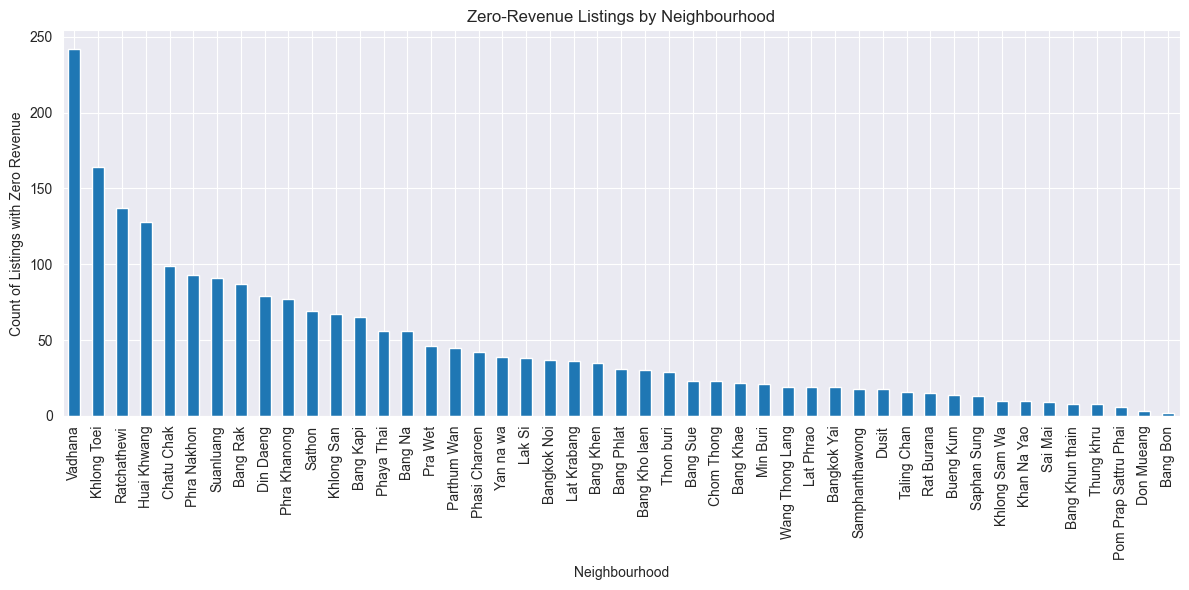

In [95]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['neighbourhood'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Listings with Zero Revenue')
plt.title('Zero-Revenue Listings by Neighbourhood')
plt.tight_layout()
plt.show()

Analisis Histogram

Distribusi:
 - Vadhana memiliki jumlah listing zero-revenue tertinggi, mendekati 250 listing.
 - Lingkungan berikutnya (seperti "Khlong Toei", "Huai Khwang", dan "Ratchathewi") memiliki jumlah yang lebih rendah, sekitar 150–200 listing.
 - Distribusi tetap miring ke kanan, dengan sebagian besar lingkungan memiliki kurang dari 50 listing zero-revenue.

Pola:
 - "Vadhana" menonjol sebagai lingkungan dengan jumlah listing tanpa pendapatan terbanyak, menunjukkan bahwa banyak properti di area ini tidak menghasilkan pendapatan.
 - Lingkungan seperti "Bang Bon" atau "Don Mueang" (di sisi kanan histogram) memiliki jumlah listing zero-revenue yang sangat rendah, mendekati 0.

Implikasi

Bisnis:
 - Vadhana memiliki banyak listing tanpa pendapatan (mendekati 250), yang mungkin menunjukkan masalah seperti:
 - Persaingan tinggi di area ini, karena Vadhana adalah salah satu distrik populer di Bangkok (termasuk kawasan seperti Sukhumvit yang banyak wisatawan).
 - Harga properti mungkin terlalu tinggi, atau properti kurang kompetitif (misalnya, fasilitas buruk, pemasaran kurang efektif).
 - Pemilik properti di Vadhana perlu mengevaluasi strategi mereka, seperti menurunkan harga atau meningkatkan kualitas listing.
 - Lingkungan seperti "Khlong Toei" dan "Huai Khwang" juga memiliki cukup banyak listing zero-revenue (sekitar 150–200), tetapi tidak setinggi Vadhana.
 - Lingkungan dengan performa baik (seperti "Bang Bon") tetap memiliki sedikit listing tanpa pendapatan, menunjukkan permintaan yang lebih stabil atau persaingan yang lebih rendah.

Analisis Lokasi:
 - Vadhana, sebagai distrik yang sibuk dan populer di Bangkok, mungkin memiliki banyak listing secara keseluruhan, tetapi juga banyak yang tidak menghasilkan pendapatan. Ini bisa disebabkan oleh oversupply properti atau ketidaksesuaian antara penawaran dan permintaan.
 - Lingkungan yang lebih kecil atau pinggiran (seperti "Bang Bon") memiliki lebih sedikit listing tanpa pendapatan, mungkin karena jumlah listingnya juga lebih sedikit atau pasarnya lebih spesifik.

Pembersihan Data:
 - Listing dengan pendapatan nol di Vadhana dan lingkungan lain mungkin mencakup properti yang baru terdaftar, tidak aktif, atau tidak kompetitif.
 - Banyaknya listing tanpa pendapatan di Vadhana menunjukkan potensi masalah seperti persaingan tinggi atau properti yang kurang menarik di area tersebut, yang perlu diteliti lebih lanjut.

In [96]:
df_cleaned[df_cleaned['minimum_nights'] > 0]

id    host_id neighbourhood   latitude   longitude  \
0                   27934     120437   Ratchathewi  13.759830  100.541340   
1                   27979     120541       Bang Na  13.668180  100.616740   
2                   28745     123784     Bang Kapi  13.752320  100.624020   
3                   35780     153730     Din Daeng  13.788230  100.572560   
4                  941865     610315     Bang Kapi  13.768720  100.633380   
...                   ...        ...           ...        ...         ...   
15849  790465040741092826   94899359       Pra Wet  13.715132  100.653458   
15850  790474503157243541  491526222   Ratchathewi  13.753052  100.538738   
15851  790475335086864240  491526222   Ratchathewi  13.753169  100.538700   
15852  790475546213717328  491526222   Ratchathewi  13.754789  100.538757   
15853  790476492384199044  491526222   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       ...  calculated_host_listings_count  availability_365  \
0      ...                               2               353   
1      ...                               2               358   
2      ...                               1               365   
3      ...                               1               323   
4      ...                               3               365   
...    ...                             ...               ...   
15849  ...                               1               362   
15850  ...                              14               365   
15851  ...                              14               365   
15852  ...                              14               365   
15853  ...                              14               365   

       number_of_reviews_ltm  has_review  estimated_revenue  \
0                          0           1              22860   
1                          0           0               9212   
2                          0           0                  0   
3                          1           1              54012   
4                          0           0                  0   
...                      ...         ...                ...   
15849                      0           0               6894   
15850                      0           0                  0   
15851                      0           0                  0   
15852                      0           0                  0   
15853                      0           0                  0   

       minimum_nights_category price_category availability_category month  \
0            Pendek (1-7 hari)         Tinggi    Tinggi (>300 hari)   1.0   
1            Pendek (1-7 hari)         Sedang    Tinggi (>300 hari)   NaN   
2           Panjang (>30 hari)         Rendah    Tinggi (>300 hari)   NaN   
3            Pendek (1-7 hari)         Sedang    Tinggi (>300 hari)   4.0   
4            Pendek (1-7 hari)         Tinggi    Tinggi (>300 hari)   NaN   
...                        ...            ...                   ...   ...   
15849       Sedang (8-30 hari)         Tinggi    Tinggi (>300 hari)   Na

In [98]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['minimum_nights'].value_counts()

minimum_nights
1      1477
30      151
2       117
3        84
180      63
365      58
7        39
90       36
28       27
60       21
5        20
10       19
15       16
100      11
360       9
14        9
120       6
4         6
31        5
6         4
50        4
29        4
200       3
40        3
20        3
300       2
250       1
358       1
21        1
170       1
355       1
183       1
58        1
22        1
160       1
85        1
62        1
270       1
59        1
84        1
45        1
25        1
364       1
Name: count, dtype: int64

Implikasi
1. Bisnis:
- Malam Minimum Rendah (1 malam):
     - Sebanyak 1.477 listing dengan pendapatan nol memiliki minimum_nights 1 malam. Ini menunjukkan bahwa banyak properti yang menargetkan sewa jangka pendek (1 malam) gagal menghasilkan pendapatan.
     - Kemungkinan penyebabnya:
         - Persaingan tinggi untuk sewa jangka pendek, terutama di lingkungan seperti Vadhana (seperti yang terlihat di histogram sebelumnya).
         - Harga properti mungkin terlalu tinggi untuk pasar sewa jangka pendek.
         - Properti kurang menarik (misalnya, fasilitas buruk, lokasi kurang strategis, atau pemasaran kurang efektif).
     - Pemilik properti dengan minimum_nights 1 malam perlu mengevaluasi strategi mereka, seperti menurunkan harga atau meningkatkan kualitas listing.
- Malam Minimum Tinggi (30–365 malam):
     - Listing dengan minimum_nights tinggi (misalnya, 30, 180, 365 malam) mungkin menargetkan sewa jangka panjang, tetapi juga gagal menghasilkan pendapatan.
     - Contoh: 151 listing dengan 30 malam, 63 listing dengan 180 malam, dan 58 listing dengan 365 malam.
     - Kemungkinan penyebabnya:
         - Pasar untuk sewa jangka panjang mungkin lebih kecil, terutama jika lokasi atau harga tidak sesuai.
         - Properti mungkin tidak aktif atau baru terdaftar, sehingga belum mendapatkan penyewa.
     - Pemilik properti ini mungkin perlu mempertimbangkan untuk menurunkan minimum_nights agar lebih fleksibel untuk penyewa jangka pendek, atau fokus pada pemasaran untuk sewa jangka panjang (misalnya, targeting ekspatriat atau pelajar).

2. Pembersihan Data:
 - Listing dengan pendapatan nol (2.189 listing) mencakup 14,64% dari total dataset (14.947 baris setelah pembersihan sebelumnya). Ini jumlah yang cukup signifikan.
 - Listing ini mungkin mencakup:
     - Properti yang baru terdaftar dan belum mendapatkan penyewa.
     - Properti yang tidak aktif (misalnya, host tidak lagi mengelola properti tersebut).
     - Properti yang tidak kompetitif (misalnya, harga terlalu tinggi, lokasi kurang menarik, atau tidak ada ulasan).

3. Hubungan dengan minimum_nights:
 - Listing dengan minimum_nights rendah (1 malam) mendominasi listing tanpa pendapatan, yang mungkin menunjukkan bahwa pasar sewa jangka pendek sangat kompetitif, terutama di lingkungan seperti Vadhana (seperti yang terlihat di histogram sebelumnya).
 - Listing dengan minimum_nights tinggi (30–365 malam) juga cukup banyak, menunjukkan bahwa properti untuk sewa jangka panjang juga menghadapi tantangan dalam menghasilkan pendapatan. Ini bisa disebabkan oleh permintaan yang lebih rendah untuk sewa jangka panjang atau ketidaksesuaian antara penawaran dan kebutuhan pasar.

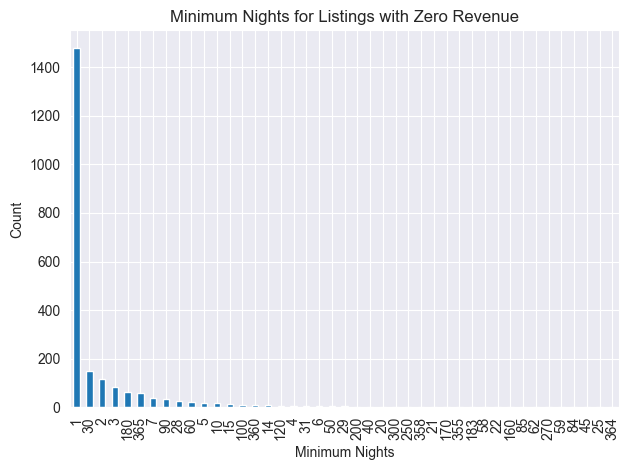

In [99]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['minimum_nights'].value_counts().plot(kind='bar')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.title('Minimum Nights for Listings with Zero Revenue')
plt.tight_layout()
plt.show()

Analisis

Distribusi:
 - Distribusi sangat miring ke kanan (right-skewed), dengan sebagian besar listing memiliki nilai minimum_nights yang sangat rendah, tetapi ada ekor panjang dengan nilai tinggi hingga 365 malam.

Nilai Paling Umum:
 - 1 malam: Memiliki jumlah listing tertinggi, mendekati 1.400 listing, sesuai dengan data sebelumnya (1.477 listing). Ini menunjukkan bahwa mayoritas listing dengan pendapatan nol memiliki persyaratan malam minimum 1 malam.

Kelompok Lain:
 - Ada puncak kecil di sekitar 30 malam (151 listing), 2 malam (117 listing), 3 malam (84 listing), 180 malam (63 listing), dan 365 malam (58 listing), yang terlihat sebagai lonjakan kecil di histogram.
 - Nilai lainnya (misalnya, 7, 90, 28 malam, dll.) memiliki frekuensi yang jauh lebih rendah, terlihat sebagai batang kecil di sepanjang sumbu X.

Pola:
 - Mayoritas listing (sekitar 67,47% atau 1.477 listing) memiliki minimum_nights 1 malam, menunjukkan bahwa listing dengan persyaratan malam minimum rendah mendominasi listing tanpa pendapatan.
 - Ada kelompok listing dengan minimum_nights tinggi (misalnya, 30, 180, 365 malam), tetapi jumlahnya jauh lebih kecil dibandingkan dengan minimum_nights 1 malam.
 - Nilai minimum_nights yang sangat tinggi (misalnya, 364, 358 malam) hanya muncul beberapa kali, terlihat sebagai batang kecil di sisi kanan histogram.

Implikasi

Bisnis:
- Malam Minimum Rendah (1 malam):
     - Sebagian besar listing dengan pendapatan nol (1.477 listing) memiliki minimum_nights 1 malam. Ini menunjukkan bahwa banyak properti sewa jangka pendek gagal menghasilkan pendapatan.

- Kemungkinan penyebab:
     - Persaingan tinggi di pasar sewa jangka pendek, terutama di lingkungan seperti Vadhana (yang memiliki banyak listing zero-revenue, seperti terlihat di histogram sebelumnya).
     - Harga mungkin terlalu tinggi untuk pasar sewa jangka pendek.
     - Properti kurang menarik (misalnya, fasilitas buruk, lokasi kurang strategis, atau tidak ada ulasan).
     - Pemilik properti dengan minimum_nights 1 malam perlu mengevaluasi strategi mereka, seperti menurunkan harga, meningkatkan kualitas listing, atau memasarkan lebih baik.

- Malam Minimum Tinggi (30–365 malam):
     - Listing dengan minimum_nights tinggi (misalnya, 30 malam: 151 listing, 180 malam: 63 listing, 365 malam: 58 listing) juga cukup banyak, menunjukkan bahwa properti sewa jangka panjang juga menghadapi tantangan.

- Kemungkinan penyebab:
     - Permintaan untuk sewa jangka panjang mungkin lebih rendah di beberapa lingkungan.
     - Harga atau lokasi mungkin tidak sesuai dengan kebutuhan penyewa jangka panjang (misalnya, ekspatriat atau pelajar).
     - Properti mungkin tidak aktif atau baru terdaftar, sehingga belum mendapatkan penyewa.
     - Pemilik properti ini bisa mempertimbangkan untuk menurunkan minimum_nights agar lebih fleksibel, atau fokus pada pemasaran untuk sewa jangka panjang.

Pembersihan Data:
- Total 2.189 listing dengan pendapatan nol merupakan 14,64% dari dataset (14.947 baris setelah pembersihan sebelumnya). Ini jumlah yang signifikan.
- Listing ini mungkin mencakup:
     - Properti yang baru terdaftar dan belum mendapatkan penyewa.
     - Properti yang tidak aktif (misalnya, host tidak lagi mengelola properti).
     - Properti yang tidak kompetitif (misalnya, harga terlalu tinggi, lokasi kurang menarik, atau tidak ada ulasan).

Hubungan dengan minimum_nights:
- Histogram ini mengonfirmasi temuan sebelumnya bahwa listing dengan minimum_nights rendah (1 malam) mendominasi listing tanpa pendapatan, yang mungkin menunjukkan pasar sewa jangka pendek yang sangat kompetitif.
- Listing dengan minimum_nights tinggi (30–365 malam) juga cukup banyak, menunjukkan tantangan dalam pasar sewa jangka panjang, seperti permintaan rendah atau ketidaksesuaian penawaran.

In [100]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['minimum_nights_category'].value_counts()

minimum_nights_category
Pendek (1-7 hari)     1747
Panjang (>30 hari)     235
Sedang (8-30 hari)     232
Name: count, dtype: int64

Analisis Distribusi
1. Distribusi Kategori:
- Pendek (1-7 hari): 1.747 listing (79,85% dari total 2.189 listing). Ini menunjukkan bahwa mayoritas listing dengan pendapatan nol menargetkan sewa jangka pendek.
- Panjang (>30 hari): 235 listing (10,74%).
- Sedang (8-30 hari): 232 listing (10,60%).

2. Pola:
- Sebagian besar listing dengan pendapatan nol (79,85%) memiliki minimum_nights dalam kategori Pendek (1-7 hari), yang konsisten dengan data sebelumnya di mana minimum_nights 1 malam mendominasi (1.477 listing).
- Kategori Sedang dan Panjang memiliki jumlah yang hampir sama, masing-masing sekitar 10% dari total listing tanpa pendapatan, menunjukkan bahwa listing dengan malam minimum sedang dan panjang juga menghadapi tantangan dalam menghasilkan pendapatan, meskipun jumlahnya jauh lebih kecil dibandingkan kategori Pendek.

Implikasi
1. Bisnis:
- Pendek (1-7 hari):
     - Sebanyak 1.747 listing (79,85%) dengan pendapatan nol berada dalam kategori ini, yang menunjukkan bahwa pasar sewa jangka pendek sangat kompetitif atau banyak properti yang tidak menarik bagi penyewa.
     - Kemungkinan penyebab:
         - Persaingan tinggi, terutama di lingkungan seperti Vadhana (seperti yang terlihat di histogram sebelumnya).
         - Harga properti mungkin terlalu tinggi untuk pasar jangka pendek.
         - Properti kurang kompetitif (misalnya, fasilitas buruk, lokasi kurang strategis, atau tidak ada ulasan).
     - Pemilik properti dalam kategori ini perlu mengevaluasi strategi mereka, seperti menurunkan harga, meningkatkan kualitas listing, atau memasarkan lebih efektif.
- Sedang (8-30 hari):
     - Ada 232 listing (10,60%) dalam kategori ini. Ini menunjukkan bahwa properti dengan malam minimum sedang juga menghadapi tantangan, meskipun tidak sebanyak kategori Pendek.
     - Kemungkinan penyebab:
         - Pasar untuk sewa jangka sedang mungkin lebih kecil, atau properti ini tidak cukup menarik untuk penyewa yang mencari sewa jangka menengah.
         - Harga atau lokasi mungkin tidak sesuai dengan kebutuhan penyewa jangka menengah.
     - Pemilik properti bisa mempertimbangkan untuk menyesuaikan minimum_nights (misalnya, ke jangka pendek) atau fokus pada penyewa spesifik (misalnya, pelancong bisnis).
- Panjang (>30 hari):
     - Ada 235 listing (10,74%) dalam kategori ini, menunjukkan bahwa properti untuk sewa jangka panjang juga kesulitan menghasilkan pendapatan.
     - Kemungkinan penyebab:
         - Permintaan untuk sewa jangka panjang mungkin lebih rendah di beberapa lingkungan.
         - Properti mungkin tidak aktif atau baru terdaftar, sehingga belum mendapatkan penyewa.
         - Harga atau lokasi tidak sesuai dengan kebutuhan penyewa jangka panjang (misalnya, ekspatriat atau pelajar).
     - Pemilik properti bisa mempertimbangkan untuk menurunkan minimum_nights agar lebih fleksibel, atau fokus pada pemasaran untuk sewa jangka panjang.

2. Hubungan dengan minimum_nights:
- Kategori Pendek (1-7 hari) mendominasi listing tanpa pendapatan, yang konsisten dengan histogram sebelumnya (1.477 listing dengan minimum_nights 1 malam). Ini menegaskan bahwa listing jangka pendek menghadapi tantangan terbesar dalam menghasilkan pendapatan.
- Kategori Sedang dan Panjang memiliki jumlah yang hampir sama, menunjukkan bahwa tantangan pendapatan nol tidak hanya terbatas pada sewa jangka pendek, tetapi juga memengaruhi sewa jangka menengah dan panjang.

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\3626476954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned[df_cleaned['estimated_revenue'] == 0].groupby(['neighbourhood', 'minimum_nights_category']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))


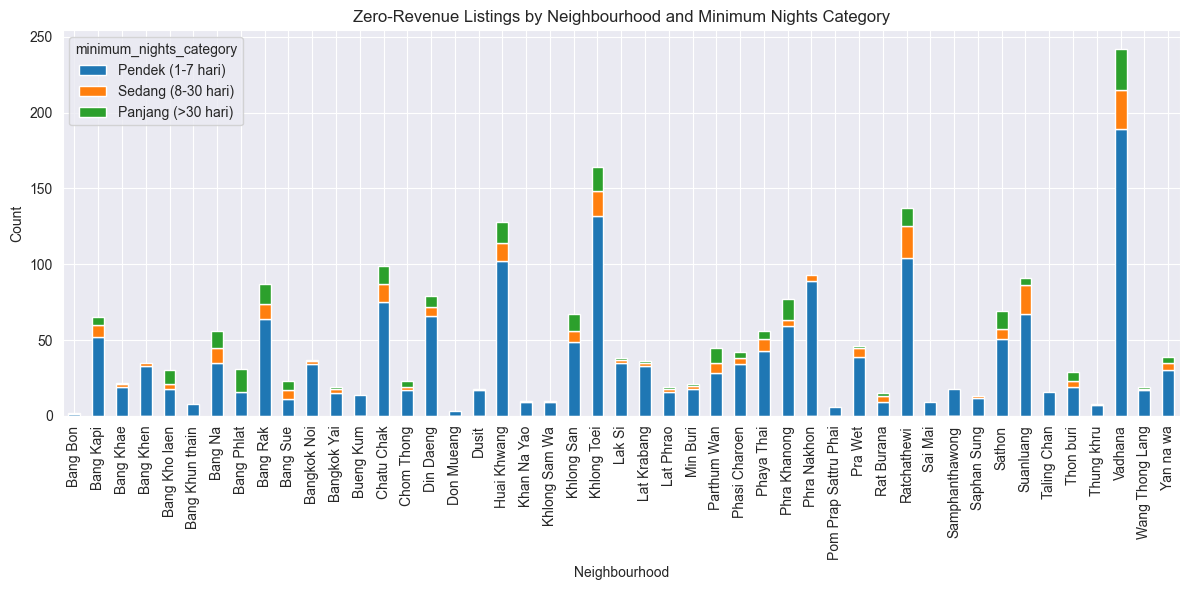

In [101]:
df_cleaned[df_cleaned['estimated_revenue'] == 0].groupby(['neighbourhood', 'minimum_nights_category']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Zero-Revenue Listings by Neighbourhood and Minimum Nights Category')
plt.tight_layout()
plt.show()

Analisis Grafik

1. Distribusi Total Listing dengan Pendapatan Nol:
- Grafik ini konsisten dengan data sebelumnya: total 2.189 listing dengan pendapatan nol, yang telah dikelompokkan ke dalam kategori minimum_nights (Pendek: 1.747, Sedang: 232, Panjang: 235).
- Lingkungan dengan jumlah listing zero-revenue tertinggi adalah Vadhana (mendekati 250 listing), diikuti oleh Khlong Toei, Huai Khwang, dan Ratchathewi (sekitar 150–200 listing), seperti yang terlihat pada histogram sebelumnya.
- Lingkungan seperti Yan Nawa, Wang Thong Lang, dan lainnya memiliki jumlah yang jauh lebih rendah (di bawah 50 listing).

2. Proporsi Kategori minimum_nights:
- Pendek (1-7 hari) (Biru):
     - Mendominasi di hampir semua lingkungan, terutama di Vadhana, Khlong Toei, Huai Khwang, dan Ratchathewi. Ini konsisten dengan data sebelumnya (1.747 listing atau 79,85% dari total listing zero-revenue berada dalam kategori Pendek).
     - Di Vadhana, sebagian besar batang (mendekati 250 listing) berwarna biru, menunjukkan bahwa mayoritas listing tanpa pendapatan di sini memiliki minimum_nights 1-7 hari.
- Sedang (8-30 hari) (Oranye):
     - Proporsi ini lebih kecil, tetapi terlihat di beberapa lingkungan seperti Vadhana, Khlong Toei, dan Ratchathewi. Ini sesuai dengan data sebelumnya (232 listing atau 10,60%).
     - Biasanya hanya menyumbang sebagian kecil dari total batang di setiap lingkungan.
- Panjang (>30 hari) (Hijau):
     - Juga memiliki proporsi kecil, tetapi terlihat di lingkungan seperti Vadhana, Khlong Toei, dan Huai Khwang. Ini sesuai dengan data sebelumnya (235 listing atau 10,74%).
     - Di beberapa lingkungan, seperti Vadhana, ada sedikit warna hijau di bagian atas batang, menunjukkan adanya listing dengan minimum_nights lebih dari 30 hari.

3. Pola:
- Kategori Pendek (1-7 hari) mendominasi di semua lingkungan, terutama di lingkungan dengan jumlah listing zero-revenue tinggi (Vadhana, Khlong Toei, dll.).
- Kategori Sedang dan Panjang lebih terlihat di lingkungan dengan jumlah listing zero-revenue yang lebih tinggi, tetapi proporsinya tetap kecil dibandingkan kategori Pendek.
- Lingkungan dengan jumlah listing zero-revenue rendah (misalnya, Yan Nawa, Wang Thong Lang) cenderung hanya memiliki kategori Pendek, dengan sedikit atau tanpa kontribusi dari kategori Sedang atau Panjang.

Implikasi
1. Bisnis:
- Dominasi Kategori Pendek (1-7 hari):
     - Di lingkungan seperti Vadhana, Khlong Toei, dan Huai Khwang, mayoritas listing tanpa pendapatan memiliki minimum_nights 1-7 hari. Ini menunjukkan bahwa pasar sewa jangka pendek di lingkungan ini sangat kompetitif atau banyak properti yang tidak menarik bagi penyewa.
     - Kemungkinan penyebab:
         - Persaingan tinggi di lingkungan populer seperti Vadhana (distrik Sukhumvit yang sibuk).
         - Harga properti mungkin terlalu tinggi untuk pasar jangka pendek.
         - Properti kurang kompetitif (misalnya, fasilitas buruk, lokasi kurang strategis, atau tidak ada ulasan).
     - Pemilik properti di lingkungan ini perlu mengevaluasi strategi mereka, seperti menurunkan harga, meningkatkan kualitas listing, atau memasarkan lebih efektif.
- Kategori Sedang (8-30 hari) dan Panjang (>30 hari):
     - Meskipun proporsinya kecil, ada listing dengan minimum_nights sedang dan panjang yang juga tidak menghasilkan pendapatan, terutama di lingkungan populer seperti Vadhana dan Khlong Toei.
     - Kemungkinan penyebab:
         - Pasar untuk sewa jangka menengah dan panjang mungkin lebih kecil di lingkungan ini.
         - Harga atau lokasi mungkin tidak sesuai dengan kebutuhan penyewa jangka menengah atau panjang (misalnya, ekspatriat atau pelajar).
     - Pemilik properti dalam kategori ini bisa mempertimbangkan untuk menyesuaikan minimum_nights (misalnya, ke jangka pendek) atau fokus pada pemasaran untuk penyewa spesifik.

2. Analisis Lokasi:
 - Lingkungan dengan banyak listing zero-revenue (Vadhana, Khlong Toei, Huai Khwang) cenderung memiliki campuran dari ketiga kategori minimum_nights, tetapi didominasi oleh kategori Pendek. Ini menunjukkan bahwa masalah pendapatan nol terutama terkonsentrasi pada listing jangka pendek di lingkungan populer.
 - Lingkungan dengan sedikit listing zero-revenue (misalnya, Yan Nawa, Wang Thong Lang) hampir sepenuhnya terdiri dari kategori Pendek, menunjukkan bahwa listing jangka menengah dan panjang di lingkungan ini lebih sedikit atau lebih berhasil menghasilkan pendapatan.

In [102]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['season'].value_counts()

season
Unknown        1571
High Season     317
Low Season      222
Mid Season      104
Name: count, dtype: int64

In [103]:
df_cleaned[df_cleaned['estimated_revenue'] == 0].groupby(['season', 'neighbourhood']).size()

season       neighbourhood  
High Season  Bang Kapi            6
             Bang Khae            1
             Bang Khen            3
             Bang Kho laen        4
             Bang Khun thain      2
                               ... 
Unknown      Thon buri           22
             Thung khru           7
             Vadhana            173
             Wang Thong Lang     16
             Yan na wa           29
Length: 152, dtype: int64

In [104]:
df_cleaned[df_cleaned['estimated_revenue'] == 0].groupby(['season', 'minimum_nights_category']).size()

C:\Users\Hype G12\AppData\Local\Temp\ipykernel_20948\2210649935.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned[df_cleaned['estimated_revenue'] == 0].groupby(['season', 'minimum_nights_category']).size()


season       minimum_nights_category
High Season  Pendek (1-7 hari)           259
             Sedang (8-30 hari)           26
             Panjang (>30 hari)           32
Low Season   Pendek (1-7 hari)           175
             Sedang (8-30 hari)           26
             Panjang (>30 hari)           21
Mid Season   Pendek (1-7 hari)            73
             Sedang (8-30 hari)           15
             Panjang (>30 hari)           16
Unknown      Pendek (1-7 hari)          1240
             Sedang (8-30 hari)          165
             Panjang (>30 hari)          166
dtype: int64

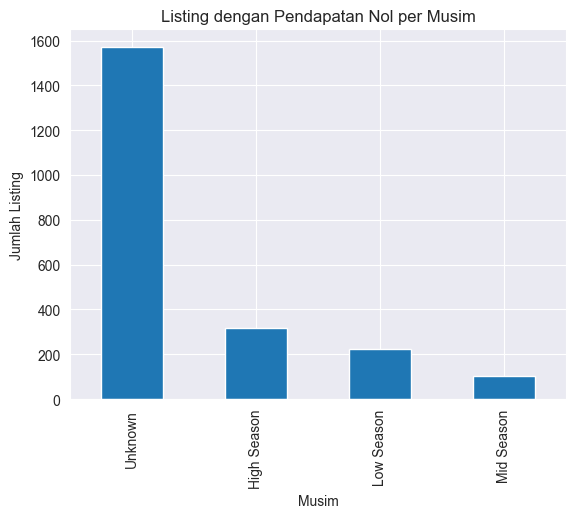

In [105]:
df_cleaned[df_cleaned['estimated_revenue'] == 0]['season'].value_counts().plot(kind='bar')
plt.xlabel('Musim')
plt.ylabel('Jumlah Listing')
plt.title('Listing dengan Pendapatan Nol per Musim')
plt.show()

## Dampak dan Strategi Mengatasi Estimated_Revenue 0

In [113]:
# Hitung statistik price per kategori minimum_nights
price_by_category = df_zero_revenue.groupby('minimum_nights_category')['price'].agg(['mean', 'median', 'min', 'max', 'count'])

# Tampilkan hasil
print("\nStatistik price per kategori minimum_nights untuk listing dengan pendapatan nol:")
print(price_by_category)


Statistik price per kategori minimum_nights untuk listing dengan pendapatan nol:
                                mean  median  min    max  count
minimum_nights_category                                        
Panjang (>30 hari)       1551.017021  1000.0  305  10000    235
Pendek (1-7 hari)        2038.759588  1400.0    0  10000   1747
Sedang (8-30 hari)       1991.344828  1497.0  350  10000    232


In [114]:
# Hitung statistik minimum_nights per kategori minimum_nights
minimum_nights_by_category = df_zero_revenue.groupby('minimum_nights_category')['minimum_nights'].agg(['mean', 'median', 'min', 'max', 'count'])

# Tampilkan hasil
print("\nStatistik minimum_nights per kategori minimum_nights untuk listing dengan pendapatan nol:")
print(minimum_nights_by_category)


Statistik minimum_nights per kategori minimum_nights untuk listing dengan pendapatan nol:
                               mean  median  min  max  count
minimum_nights_category                                     
Panjang (>30 hari)       196.800000   180.0   31  365    235
Pendek (1-7 hari)          1.364625     1.0    1    7   1747
Sedang (8-30 hari)        26.232759    30.0   10   30    232


In [115]:
# Hitung rata-rata price per neighbourhood dan kategori minimum_nights
price_by_neighbourhood_category = df_zero_revenue.groupby(['neighbourhood', 'minimum_nights_category'])['price'].mean().unstack()

# Tampilkan hasil
print("\nRata-rata price per neighbourhood dan kategori minimum_nights untuk listing dengan pendapatan nol:")
print(price_by_neighbourhood_category)


Rata-rata price per neighbourhood dan kategori minimum_nights untuk listing dengan pendapatan nol:
minimum_nights_category  Panjang (>30 hari)  Pendek (1-7 hari)  \
neighbourhood                                                    
Bang Bon                                NaN        2632.000000   
Bang Kapi                        966.000000        1856.769231   
Bang Khae                       8652.000000        2569.736842   
Bang Khen                               NaN        1082.696970   
Bang Kho laen                    974.333333        2807.166667   
Bang Khun thain                         NaN        2290.625000   
Bang Na                         1500.454545        1761.771429   
Bang Phlat                      1270.800000         994.187500   
Bang Rak                        1677.461538        2352.390625   
Bang Sue                        1189.833333        2320.545455   
Bangkok Noi                      500.000000        2014.264706   
Bangkok Yai                      350.00000

In [119]:
# Hitung statistik minimum_nights per neighbourhood
minimum_nights_by_neighbourhood = df_zero_revenue.groupby('neighbourhood')['minimum_nights'].agg(['mean', 'median', 'min', 'max', 'count'])

# Tampilkan hasil
print("\nStatistik minimum_nights per neighbourhood untuk listing dengan pendapatan nol:")
print(minimum_nights_by_neighbourhood)


Statistik minimum_nights per neighbourhood untuk listing dengan pendapatan nol:
                           mean  median  min  max  count
neighbourhood                                           
Bang Bon               7.500000     7.5    1   14      2
Bang Kapi             19.538462     1.0    1  365     65
Bang Khae             19.727273     1.0    1  365     22
Bang Khen              2.857143     1.0    1   30     35
Bang Kho laen         78.333333     1.0    1  365     30
Bang Khun thain        1.750000     1.0    1    7      8
Bang Na               44.785714     3.0    1  365     56
Bang Phlat            48.000000     6.0    1  360     31
Bang Rak              27.287356     1.0    1  365     87
Bang Sue              72.565217    14.0    1  365     23
Bangkok Noi            7.162162     1.0    1  180     37
Bangkok Yai           14.368421     1.0    1  180     19
Bueng Kum              2.071429     1.5    1    7     14
Chatu Chak            30.919192     1.0    1  365     99
Chom Th

Jumlah listing dengan estimated_revenue = 0 sebelum strategi: 2214
Jumlah listing tidak aktif yang akan dihapus: 1571
Jumlah listing dengan estimated_revenue = 0 setelah strategi: 643


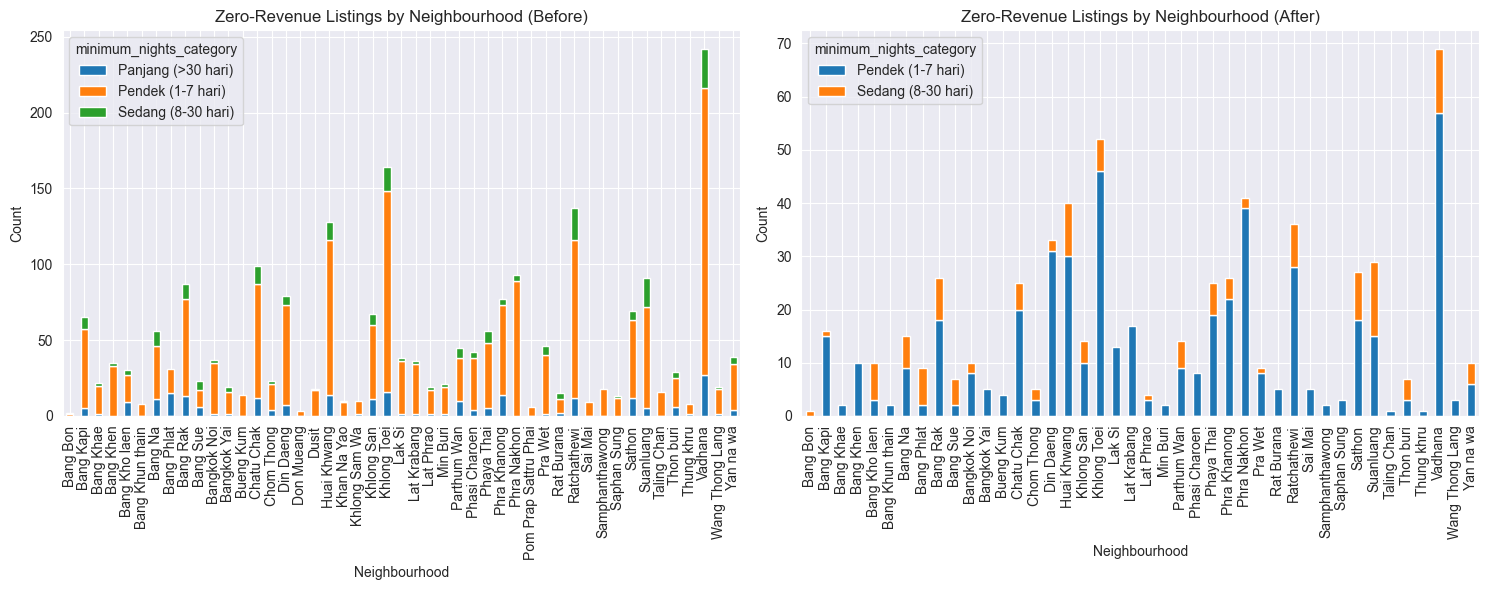

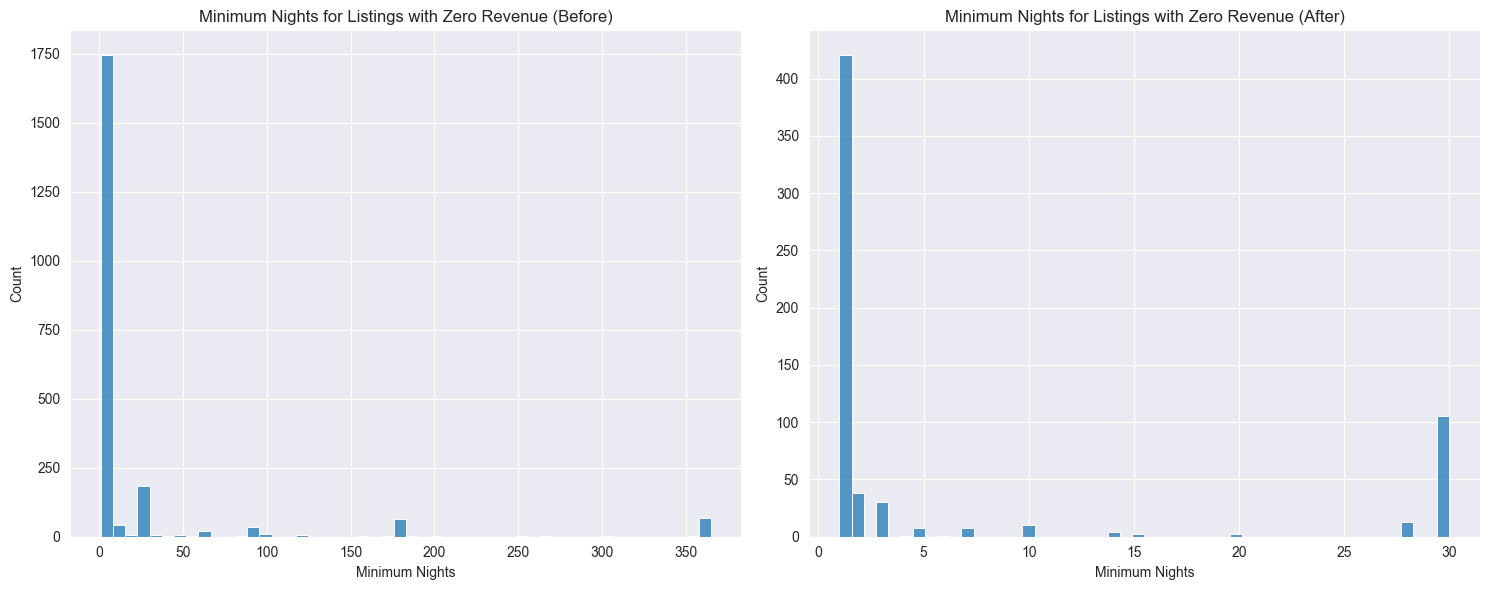

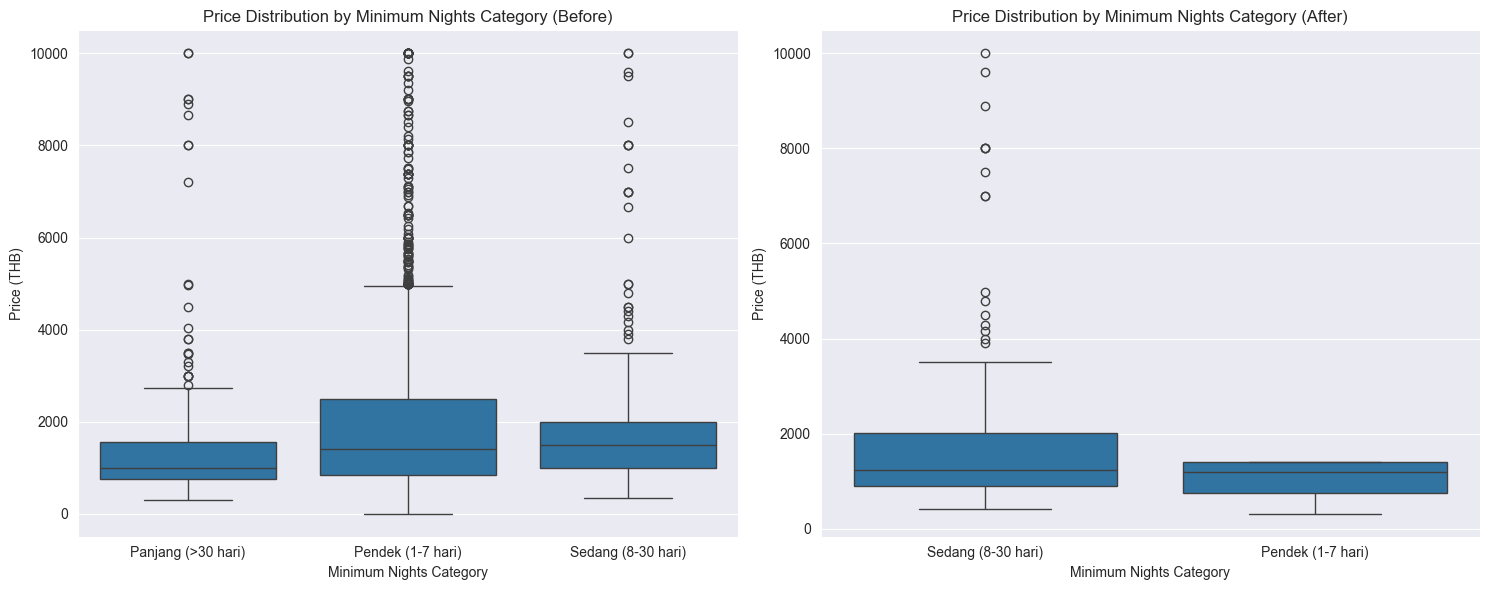


Distribusi kategori minimum_nights untuk listing dengan pendapatan nol setelah strategi:
minimum_nights_category
Pendek (1-7 hari)     507
Sedang (8-30 hari)    136
Name: count, dtype: int64

Statistik price per kategori minimum_nights untuk listing dengan pendapatan nol setelah strategi:
                                mean  median  min    max  count
minimum_nights_category                                        
Pendek (1-7 hari)        1045.773176  1190.0  313   1400    507
Sedang (8-30 hari)       1966.154412  1231.0  420  10000    136

Jumlah listing dengan estimated_revenue = 0 per neighbourhood setelah strategi:
neighbourhood
Vadhana            69
Khlong Toei        52
Phra Nakhon        41
Huai Khwang        40
Ratchathewi        36
Din Daeng          33
Suanluang          29
Sathon             27
Phra Khanong       26
Bang Rak           26
Chatu Chak         25
Phaya Thai         25
Lat Krabang        17
Bang Kapi          16
Bang Na            15
Parthum Wan        14
Khlong

In [117]:
# Langkah 1: Tambahkan kolom minimum_nights_category
def minimum_nights_category(nights):
    if nights <= 7:
        return 'Pendek (1-7 hari)'
    elif nights <= 30:
        return 'Sedang (8-30 hari)'
    else:
        return 'Panjang (>30 hari)'

df_cleaned['minimum_nights_category'] = df_cleaned['minimum_nights'].apply(categorize_minimum_nights)

# Simpan DataFrame asli untuk perbandingan sebelum dan sesudah
df_before = df_cleaned.copy()

# Cek jumlah listing dengan estimated_revenue = 0 sebelum strategi
df_zero_revenue_before = df_before[df_before['estimated_revenue'] == 0]
print("Jumlah listing dengan estimated_revenue = 0 sebelum strategi:", len(df_zero_revenue_before))

# Langkah 2: Strategi 1 - Menurunkan harga untuk listing dengan minimum_nights Pendek (1-7 hari)
# Median price dari statistik sebelumnya adalah 1.400 THB
median_price = 1400
condition_pendek = (df_cleaned['minimum_nights_category'] == 'Pendek (1-7 hari)') & (df_cleaned['estimated_revenue'] == 0)
df_cleaned.loc[condition_pendek & (df_cleaned['price'] > median_price), 'price'] = median_price

# Langkah 3: Strategi 2 - Menyesuaikan minimum_nights untuk listing dengan minimum_nights Panjang (>30 hari)
# Ubah minimum_nights ke 30 hari untuk listing dengan minimum_nights > 30 hari dan estimated_revenue = 0
condition_panjang = (df_cleaned['minimum_nights_category'] == 'Panjang (>30 hari)') & (df_cleaned['estimated_revenue'] == 0)
df_cleaned.loc[condition_panjang, 'minimum_nights'] = 30

# Perbarui kategori minimum_nights setelah perubahan
df_cleaned['minimum_nights_category'] = df_cleaned['minimum_nights'].apply(categorize_minimum_nights)

# Langkah 4: Strategi 3 - Menghapus listing yang tidak aktif
# Kriteria tidak aktif: number_of_reviews = 0 dan reviews_per_month = 0
condition_inactive = (df_cleaned['number_of_reviews'] == 0) & (df_cleaned['reviews_per_month'] == 0) & (df_cleaned['estimated_revenue'] == 0)
inactive_listings = len(df_cleaned[condition_inactive])
print("Jumlah listing tidak aktif yang akan dihapus:", inactive_listings)

# Hapus listing yang tidak aktif
df_cleaned = df_cleaned[~condition_inactive].copy()

# Cek jumlah listing dengan estimated_revenue = 0 setelah strategi
df_zero_revenue_after = df_cleaned[df_cleaned['estimated_revenue'] == 0]
print("Jumlah listing dengan estimated_revenue = 0 setelah strategi:", len(df_zero_revenue_after))

# Langkah 5: Persiapan data untuk stacked bar chart
# Hitung jumlah listing per neighbourhood dan minimum_nights_category sebelum strategi
before_counts = df_zero_revenue_before.groupby(['neighbourhood', 'minimum_nights_category']).size().unstack(fill_value=0)

# Hitung jumlah listing per neighbourhood dan minimum_nights_category setelah strategi
after_counts = df_zero_revenue_after.groupby(['neighbourhood', 'minimum_nights_category']).size().unstack(fill_value=0)

# Langkah 6: Visualisasi Stacked Bar Chart
plt.figure(figsize=(15, 6))

# Sebelum strategi
plt.subplot(1, 2, 1)
before_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Zero-Revenue Listings by Neighbourhood (Before)')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='minimum_nights_category')

# Sesudah strategi
plt.subplot(1, 2, 2)
after_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Zero-Revenue Listings by Neighbourhood (After)')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='minimum_nights_category')

plt.tight_layout()
plt.show()

# Visualisasi 2: Histogram - Distribusi minimum_nights
plt.figure(figsize=(15, 6))

# Sebelum strategi
plt.subplot(1, 2, 1)
sns.histplot(data=df_zero_revenue_before, x='minimum_nights', bins=50)
plt.title('Minimum Nights for Listings with Zero Revenue (Before)')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')

# Sesudah strategi
plt.subplot(1, 2, 2)
sns.histplot(data=df_zero_revenue_after, x='minimum_nights', bins=50)
plt.title('Minimum Nights for Listings with Zero Revenue (After)')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visualisasi 3: Boxplot - Distribusi price per kategori minimum_nights
plt.figure(figsize=(15, 6))

# Sebelum strategi
plt.subplot(1, 2, 1)
sns.boxplot(data=df_zero_revenue_before, x='minimum_nights_category', y='price')
plt.title('Price Distribution by Minimum Nights Category (Before)')
plt.xlabel('Minimum Nights Category')
plt.ylabel('Price (THB)')

# Sesudah strategi
plt.subplot(1, 2, 2)
sns.boxplot(data=df_zero_revenue_after, x='minimum_nights_category', y='price')
plt.title('Price Distribution by Minimum Nights Category (After)')
plt.xlabel('Minimum Nights Category')
plt.ylabel('Price (THB)')

plt.tight_layout()
plt.show()

# Langkah 6: Analisis tambahan untuk verifikasi
# Distribusi kategori minimum_nights setelah strategi
print("\nDistribusi kategori minimum_nights untuk listing dengan pendapatan nol setelah strategi:")
print(df_zero_revenue_after['minimum_nights_category'].value_counts())

# Statistik price per kategori minimum_nights setelah strategi
price_by_category_after = df_zero_revenue_after.groupby('minimum_nights_category')['price'].agg(['mean', 'median', 'min', 'max', 'count'])
print("\nStatistik price per kategori minimum_nights untuk listing dengan pendapatan nol setelah strategi:")
print(price_by_category_after)

# Jumlah listing dengan pendapatan nol per neighbourhood setelah strategi
neighbourhood_zero_revenue_after = df_zero_revenue_after['neighbourhood'].value_counts()
print("\nJumlah listing dengan estimated_revenue = 0 per neighbourhood setelah strategi:")
print(neighbourhood_zero_revenue_after)